In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA

In [2]:
dflog2 = pd.read_table('C:/Users/Jesus Eduardo/Documents/Servicio solcial 2/matriz_log2tpm_231_muestras.tsv')

In [3]:
dflog2

Rownames     CA871     CA894    CA1396     CA920    CA1989    CA1529   
0       MTCP1  0.731411  1.818770  0.865372  2.065230  0.938796  1.822028  \
1        FLNA  5.420694  7.189696  4.768020  6.738658  5.590270  6.480567   
2       FGF13  0.000000  1.312171  2.856591  3.503269  0.000000  2.106591   
3        ELF4  4.295459  5.620781  4.904675  4.134901  4.775942  5.392031   
4      ATP1B4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...       ...       ...       ...       ...       ...       ...       ...   
1407    SARNP  6.844211  6.649600  7.955267  7.310390  7.779074  7.410020   
1408     SKP2  4.621526  4.985235  4.433829  4.931946  4.147345  5.378929   
1409     NACA  9.403932  8.419521  9.894013  9.869589  9.571874  9.633816   
1410     CDK9  7.367147  7.764750  7.557828  7.459120  6.782633  7.268760   
1411  FAM19A2  0.490426  0.719044  0.731555  0.371052  0.000000  0.181414   

        CA1675    CA2254     CA925  ...     CA934    CA1018    CA1665   
0     1.931050  1.449556  0.778751  ...  1.609886  2.909951  1.158609  \
1     7.146670  5.221296  6.412202  ...  7.702095  6.126961  8.106771   
2     0.000000  0.000000  1.893689  ...  1.178621  3.965099  1.143997   
3     5.756403  4.844250  4.730330  ...  5.020143  5.079489  4.954834   
4     0.000000  0.000000  0.000000  ...  0.000000  2.798500  0.696382   
...        ...       ...       ...  ...       ...       ...       ...   
1407  7.085592  7.439553  7.279229  ...  6.653685  6.707420  8.243614   
1408  4.910977  2.784894  5.534748  ...  5.540200  4.305000  3.968390   
1409  9.371157  8.855278  9.150287  ...  8.725389  8.386086  9.229427   
1410  7.072608  7.481409  6.621870  ...  6.447212  7.475895  6.504668   
1411  0.000000  1.700028  0.312935  ...  1.033750  2.640421  0.000000   

         CA893     CA916    CA1371     CA898     CA838    CA2213    CA2215  
0     1.090644  1.988476  1.114046  0.856048  0.000000  2.020086  2.317958  
1     6.469396  7.530029  6.218951  7.251806  5.582070  7.804345  6.354269  
2     0.522087  4.611855  0.000000  0.000000  0.000000  0.000000  0.000000  
3     4.626237  5.531431  4.369098  5.626405  4.665682  4.989888  4.718517  
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.870335  
...        ...       ...       ...       ...       ...       ...       ...  
1407  6.546725  7.340096  6.379300  6.296667  7.190751  7.011448  7.543008  
1408  4.982442  5.194666  5.493037  4.937197  3.599420  5.463387  3.570904  
1409  8.241777  9.340904  9.635307  9.088400  9.231906  9.551253  9.587982  
1410  7.333402  7.471562  6.055014  7.042845  7.461836  5.901354  6.029704  
1411  0.507384  0.000000  0.000000  0.000000  1.088010  0.510430  0.000000  

[1412 rows x 232 columns]

In [4]:
dftpm = pd.read_table('C:/Users/Jesus Eduardo/Documents/Servicio solcial 2/matriz_tpm_231_muestras.tsv')

In [5]:
dftpm

Rownames     CA1018       CA1019        CA1020     CA1021      CA1022   
0       MTCP1    17.3559      6.37625     13.016600     0.0000    16.97200  \
1        FLNA   457.0420    568.85900   2412.030000   159.8670   620.03700   
2       FGF13    51.7255     12.20180      0.000000     0.0000    18.57140   
3        ELF4   159.6920    102.87200    169.991000   100.5310   106.55200   
4      ATP1B4    15.4200      3.87125      0.000000    70.9357     5.71506   
...       ...        ...          ...           ...        ...         ...   
1407    SARNP   817.4560    599.63600   1175.040000  4448.0100   663.39100   
1408     SKP2    73.0692    184.92500     90.507600   201.8080   168.32500   
1409     NACA  4384.6200  10054.30000  15105.900000  7905.0600  8320.13000   
1410     CDK9  1763.9800    972.42500    430.515000   408.5540   900.20700   
1411  FAM19A2    13.0191      0.87024      0.809574     0.0000     3.12738   

           CA1048       CA1049       CA1050       CA1051  ...       CA932   
0        31.11730      5.95553      5.86503    10.768100  ...     7.77560  \
1      1430.84000   1217.75000   1530.41000  2636.870000  ...   586.02400   
2        36.90510      3.37954      1.58563     1.672270  ...     0.00000   
3       225.33800     87.74420    164.85900   200.996000  ...    93.85590   
4         3.43513      0.00000      5.16888     0.000000  ...     0.00000   
...           ...          ...          ...          ...  ...         ...   
1407   1070.06000   1340.92000   1198.07000   781.316000  ...   991.71800   
1408     86.60450    230.21800    205.11700   156.658000  ...   105.79500   
1409  10495.70000  20599.00000  14170.80000  8317.480000  ...  9816.48000   
1410    996.73500    244.85200   1234.67000  1232.750000  ...  2958.02000   
1411      3.82951      2.60541      5.03077     0.481736  ...     0.52164   

             CA933       CA934         CA935         CA936         CA937   
0         4.982470     4.00224      8.150290     10.586700      5.978510  \
1       849.437000  2211.98000   4755.050000   3529.970000   4347.170000   
2         0.537542     2.24989     11.005000      0.000000      0.626033   
3       147.409000   150.43300    443.810000    213.735000    266.532000   
4         0.000000     0.00000      0.000000      0.000000      0.000000   
...            ...         ...           ...           ...           ...   
1407   1190.810000   774.63700    893.690000    802.691000    822.870000   
1408    254.881000   253.72900    172.350000    129.422000    200.235000   
1409  14747.800000  6156.27000  10443.700000  12480.600000  11835.700000   
1410   1796.530000   629.94100   1739.690000   1380.520000    510.515000   
1411      0.239994     1.81159      0.893671      0.872571      3.284550   

            CA939       CA949       CA950       CA952  
0        3.164350    10.29340    17.47970    20.25460  
1      722.012000  1017.25000  4290.98000   849.94500  
2       55.052600    11.45140    63.99670     8.47798  
3      109.284000   229.87600   244.19600   102.86700  
4        0.000000     1.60776     4.43508     6.15308  
...           ...         ...         ...         ...  
1407   707.970000   517.57000   611.10400   469.61100  
1408   218.818000   147.23400   158.87700   159.32800  
1409  4123.840000  9326.58000  8011.93000  7094.37000  
1410   571.851000  2568.70000   680.43800  1561.66000  
1411     0.542693     9.74641     7.79255     3.22997  

[1412 rows x 280 columns]

In [6]:
df = pd.read_table('C:/Users/Jesus Eduardo/Documents/Servicio solcial 2/20230901_all_final_fusion_table_with_crlf2.csv')

In [7]:
df

Sample Diagnostico Corrida DESCARTADO.POR Fusions Subtipo   
0    CA1048       LLA-B   MT333            NaN     NEG     NaN  \
1    CA1052       LLA-B   MT333            NaN     NEG     NaN   
2    CA1156       LLA-B   MT341            NaN     NEG     NaN   
3    CA1211       LLA-B   MT354            NaN     NEG     NaN   
4    CA1229       LLA-B   MT364            NaN     NEG     NaN   
..      ...         ...     ...            ...     ...     ...   
269   CA883           -   MT323          LLA-T     NaN     NaN   
270   CA899       LLA-B       -        SIN RNA     NaN     NaN   
271   CA905       LLA-B       -        SIN RNA     NaN     NaN   
272   CA906       LLA-B       -        SIN RNA     NaN     NaN   
273   CA919       LLA-B     NaN        SIN RNA     NaN     NaN   

    CRLF2_cluster_old CRLF2_dup CRLF2_mut mut_call fusion  dup  mut   
0                  c1       NaN       NaN      NaN    NEG  NaN  NaN  \
1                  c1       NaN       NaN      NaN    NEG  NaN  NaN   
2                  c1       NaN       NaN      NaN    NEG  NaN  NaN   
3                  c1       NaN       NaN      NaN    NEG  NaN  NaN   
4                  c1       NaN       NaN      NaN    NEG  NaN  NaN   
..                ...       ...       ...      ...    ...  ...  ...   
269               NaN       NaN       NaN      NaN    NaN  NaN  NaN   
270               NaN       NaN       NaN      NaN    NaN  NaN  NaN   
271               NaN       NaN       NaN      NaN    NaN  NaN  NaN   
272               NaN       NaN       NaN      NaN    NaN  NaN  NaN   
273               NaN       NaN       NaN      NaN    NaN  NaN  NaN   

          tipo     CRLF2 cluster  
0    no events  1.173973      c1  
1    no events  0.811357      c1  
2    no events  1.542441      c1  
3    no events  1.684996      c1  
4    no events  0.559465      c1  
..         ...       ...     ...  
269        NaN       NaN     NaN  
270        NaN       NaN     NaN  
271        NaN       NaN     NaN  
272        NaN       NaN     NaN  
273        NaN       NaN     NaN  

[274 rows x 16 columns]

In [8]:
df_c = df.copy()
df_c

Sample Diagnostico Corrida DESCARTADO.POR Fusions Subtipo   
0    CA1048       LLA-B   MT333            NaN     NEG     NaN  \
1    CA1052       LLA-B   MT333            NaN     NEG     NaN   
2    CA1156       LLA-B   MT341            NaN     NEG     NaN   
3    CA1211       LLA-B   MT354            NaN     NEG     NaN   
4    CA1229       LLA-B   MT364            NaN     NEG     NaN   
..      ...         ...     ...            ...     ...     ...   
269   CA883           -   MT323          LLA-T     NaN     NaN   
270   CA899       LLA-B       -        SIN RNA     NaN     NaN   
271   CA905       LLA-B       -        SIN RNA     NaN     NaN   
272   CA906       LLA-B       -        SIN RNA     NaN     NaN   
273   CA919       LLA-B     NaN        SIN RNA     NaN     NaN   

    CRLF2_cluster_old CRLF2_dup CRLF2_mut mut_call fusion  dup  mut   
0                  c1       NaN       NaN      NaN    NEG  NaN  NaN  \
1                  c1       NaN       NaN      NaN    NEG  NaN  NaN   
2                  c1       NaN       NaN      NaN    NEG  NaN  NaN   
3                  c1       NaN       NaN      NaN    NEG  NaN  NaN   
4                  c1       NaN       NaN      NaN    NEG  NaN  NaN   
..                ...       ...       ...      ...    ...  ...  ...   
269               NaN       NaN       NaN      NaN    NaN  NaN  NaN   
270               NaN       NaN       NaN      NaN    NaN  NaN  NaN   
271               NaN       NaN       NaN      NaN    NaN  NaN  NaN   
272               NaN       NaN       NaN      NaN    NaN  NaN  NaN   
273               NaN       NaN       NaN      NaN    NaN  NaN  NaN   

          tipo     CRLF2 cluster  
0    no events  1.173973      c1  
1    no events  0.811357      c1  
2    no events  1.542441      c1  
3    no events  1.684996      c1  
4    no events  0.559465      c1  
..         ...       ...     ...  
269        NaN       NaN     NaN  
270        NaN       NaN     NaN  
271        NaN       NaN     NaN  
272        NaN       NaN     NaN  
273        NaN       NaN     NaN  

[274 rows x 16 columns]

In [9]:
df_c[['Sample', 'cluster']]

Sample cluster
0    CA1048      c1
1    CA1052      c1
2    CA1156      c1
3    CA1211      c1
4    CA1229      c1
..      ...     ...
269   CA883     NaN
270   CA899     NaN
271   CA905     NaN
272   CA906     NaN
273   CA919     NaN

[274 rows x 2 columns]

In [10]:
dflog2_c=dflog2.copy()
dflog2_c

Rownames     CA871     CA894    CA1396     CA920    CA1989    CA1529   
0       MTCP1  0.731411  1.818770  0.865372  2.065230  0.938796  1.822028  \
1        FLNA  5.420694  7.189696  4.768020  6.738658  5.590270  6.480567   
2       FGF13  0.000000  1.312171  2.856591  3.503269  0.000000  2.106591   
3        ELF4  4.295459  5.620781  4.904675  4.134901  4.775942  5.392031   
4      ATP1B4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...       ...       ...       ...       ...       ...       ...       ...   
1407    SARNP  6.844211  6.649600  7.955267  7.310390  7.779074  7.410020   
1408     SKP2  4.621526  4.985235  4.433829  4.931946  4.147345  5.378929   
1409     NACA  9.403932  8.419521  9.894013  9.869589  9.571874  9.633816   
1410     CDK9  7.367147  7.764750  7.557828  7.459120  6.782633  7.268760   
1411  FAM19A2  0.490426  0.719044  0.731555  0.371052  0.000000  0.181414   

        CA1675    CA2254     CA925  ...     CA934    CA1018    CA1665   
0     1.931050  1.449556  0.778751  ...  1.609886  2.909951  1.158609  \
1     7.146670  5.221296  6.412202  ...  7.702095  6.126961  8.106771   
2     0.000000  0.000000  1.893689  ...  1.178621  3.965099  1.143997   
3     5.756403  4.844250  4.730330  ...  5.020143  5.079489  4.954834   
4     0.000000  0.000000  0.000000  ...  0.000000  2.798500  0.696382   
...        ...       ...       ...  ...       ...       ...       ...   
1407  7.085592  7.439553  7.279229  ...  6.653685  6.707420  8.243614   
1408  4.910977  2.784894  5.534748  ...  5.540200  4.305000  3.968390   
1409  9.371157  8.855278  9.150287  ...  8.725389  8.386086  9.229427   
1410  7.072608  7.481409  6.621870  ...  6.447212  7.475895  6.504668   
1411  0.000000  1.700028  0.312935  ...  1.033750  2.640421  0.000000   

         CA893     CA916    CA1371     CA898     CA838    CA2213    CA2215  
0     1.090644  1.988476  1.114046  0.856048  0.000000  2.020086  2.317958  
1     6.469396  7.530029  6.218951  7.251806  5.582070  7.804345  6.354269  
2     0.522087  4.611855  0.000000  0.000000  0.000000  0.000000  0.000000  
3     4.626237  5.531431  4.369098  5.626405  4.665682  4.989888  4.718517  
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.870335  
...        ...       ...       ...       ...       ...       ...       ...  
1407  6.546725  7.340096  6.379300  6.296667  7.190751  7.011448  7.543008  
1408  4.982442  5.194666  5.493037  4.937197  3.599420  5.463387  3.570904  
1409  8.241777  9.340904  9.635307  9.088400  9.231906  9.551253  9.587982  
1410  7.333402  7.471562  6.055014  7.042845  7.461836  5.901354  6.029704  
1411  0.507384  0.000000  0.000000  0.000000  1.088010  0.510430  0.000000  

[1412 rows x 232 columns]

In [11]:
dflog2_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Columns: 232 entries, Rownames to CA2215
dtypes: float64(231), object(1)
memory usage: 2.5+ MB


In [12]:
dflog2_c.isnull().sum().sum()# ver si hay vairables faltantes.

0

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [14]:
dflog2_c.columns

Index(['Rownames', 'CA871', 'CA894', 'CA1396', 'CA920', 'CA1989', 'CA1529',
       'CA1675', 'CA2254', 'CA925',
       ...
       'CA934', 'CA1018', 'CA1665', 'CA893', 'CA916', 'CA1371', 'CA898',
       'CA838', 'CA2213', 'CA2215'],
      dtype='object', length=232)

In [16]:
Caracteristicas = dflog2_ce.columns
Caracteristicas

NameError: name 'dflog2_ce' is not defined

In [17]:
dflog2_ce = dflog2_c.drop('Rownames', axis=1)
dflog2_ce 

CA871     CA894    CA1396     CA920    CA1989    CA1529    CA1675   
0     0.731411  1.818770  0.865372  2.065230  0.938796  1.822028  1.931050  \
1     5.420694  7.189696  4.768020  6.738658  5.590270  6.480567  7.146670   
2     0.000000  1.312171  2.856591  3.503269  0.000000  2.106591  0.000000   
3     4.295459  5.620781  4.904675  4.134901  4.775942  5.392031  5.756403   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1407  6.844211  6.649600  7.955267  7.310390  7.779074  7.410020  7.085592   
1408  4.621526  4.985235  4.433829  4.931946  4.147345  5.378929  4.910977   
1409  9.403932  8.419521  9.894013  9.869589  9.571874  9.633816  9.371157   
1410  7.367147  7.764750  7.557828  7.459120  6.782633  7.268760  7.072608   
1411  0.490426  0.719044  0.731555  0.371052  0.000000  0.181414  0.000000   

        CA2254     CA925    CA1614  ...     CA934    CA1018    CA1665   
0     1.449556  0.778751  2.388169  ...  1.609886  2.909951  1.158609  \
1     5.221296  6.412202  7.402049  ...  7.702095  6.126961  8.106771   
2     0.000000  1.893689  1.299330  ...  1.178621  3.965099  1.143997   
3     4.844250  4.730330  5.082838  ...  5.020143  5.079489  4.954834   
4     0.000000  0.000000  0.000000  ...  0.000000  2.798500  0.696382   
...        ...       ...       ...  ...       ...       ...       ...   
1407  7.439553  7.279229  7.037300  ...  6.653685  6.707420  8.243614   
1408  2.784894  5.534748  5.382098  ...  5.540200  4.305000  3.968390   
1409  8.855278  9.150287  9.040676  ...  8.725389  8.386086  9.229427   
1410  7.481409  6.621870  7.973310  ...  6.447212  7.475895  6.504668   
1411  1.700028  0.312935  0.670505  ...  1.033750  2.640421  0.000000   

         CA893     CA916    CA1371     CA898     CA838    CA2213    CA2215  
0     1.090644  1.988476  1.114046  0.856048  0.000000  2.020086  2.317958  
1     6.469396  7.530029  6.218951  7.251806  5.582070  7.804345  6.354269  
2     0.522087  4.611855  0.000000  0.000000  0.000000  0.000000  0.000000  
3     4.626237  5.531431  4.369098  5.626405  4.665682  4.989888  4.718517  
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.870335  
...        ...       ...       ...       ...       ...       ...       ...  
1407  6.546725  7.340096  6.379300  6.296667  7.190751  7.011448  7.543008  
1408  4.982442  5.194666  5.493037  4.937197  3.599420  5.463387  3.570904  
1409  8.241777  9.340904  9.635307  9.088400  9.231906  9.551253  9.587982  
1410  7.333402  7.471562  6.055014  7.042845  7.461836  5.901354  6.029704  
1411  0.507384  0.000000  0.000000  0.000000  1.088010  0.510430  0.000000  

[1412 rows x 231 columns]

FileNotFoundError: [Errno 2] No such file or directory: 'dflog2_ce'

In [15]:
dflog2_ce = dflog2_c
dflog2_ce

Rownames     CA871     CA894    CA1396     CA920    CA1989    CA1529   
0       MTCP1  0.731411  1.818770  0.865372  2.065230  0.938796  1.822028  \
1        FLNA  5.420694  7.189696  4.768020  6.738658  5.590270  6.480567   
2       FGF13  0.000000  1.312171  2.856591  3.503269  0.000000  2.106591   
3        ELF4  4.295459  5.620781  4.904675  4.134901  4.775942  5.392031   
4      ATP1B4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...       ...       ...       ...       ...       ...       ...       ...   
1407    SARNP  6.844211  6.649600  7.955267  7.310390  7.779074  7.410020   
1408     SKP2  4.621526  4.985235  4.433829  4.931946  4.147345  5.378929   
1409     NACA  9.403932  8.419521  9.894013  9.869589  9.571874  9.633816   
1410     CDK9  7.367147  7.764750  7.557828  7.459120  6.782633  7.268760   
1411  FAM19A2  0.490426  0.719044  0.731555  0.371052  0.000000  0.181414   

        CA1675    CA2254     CA925  ...     CA934    CA1018    CA1665   
0     1.931050  1.449556  0.778751  ...  1.609886  2.909951  1.158609  \
1     7.146670  5.221296  6.412202  ...  7.702095  6.126961  8.106771   
2     0.000000  0.000000  1.893689  ...  1.178621  3.965099  1.143997   
3     5.756403  4.844250  4.730330  ...  5.020143  5.079489  4.954834   
4     0.000000  0.000000  0.000000  ...  0.000000  2.798500  0.696382   
...        ...       ...       ...  ...       ...       ...       ...   
1407  7.085592  7.439553  7.279229  ...  6.653685  6.707420  8.243614   
1408  4.910977  2.784894  5.534748  ...  5.540200  4.305000  3.968390   
1409  9.371157  8.855278  9.150287  ...  8.725389  8.386086  9.229427   
1410  7.072608  7.481409  6.621870  ...  6.447212  7.475895  6.504668   
1411  0.000000  1.700028  0.312935  ...  1.033750  2.640421  0.000000   

         CA893     CA916    CA1371     CA898     CA838    CA2213    CA2215  
0     1.090644  1.988476  1.114046  0.856048  0.000000  2.020086  2.317958  
1     6.469396  7.530029  6.218951  7.251806  5.582070  7.804345  6.354269  
2     0.522087  4.611855  0.000000  0.000000  0.000000  0.000000  0.000000  
3     4.626237  5.531431  4.369098  5.626405  4.665682  4.989888  4.718517  
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.870335  
...        ...       ...       ...       ...       ...       ...       ...  
1407  6.546725  7.340096  6.379300  6.296667  7.190751  7.011448  7.543008  
1408  4.982442  5.194666  5.493037  4.937197  3.599420  5.463387  3.570904  
1409  8.241777  9.340904  9.635307  9.088400  9.231906  9.551253  9.587982  
1410  7.333402  7.471562  6.055014  7.042845  7.461836  5.901354  6.029704  
1411  0.507384  0.000000  0.000000  0.000000  1.088010  0.510430  0.000000  

[1412 rows x 232 columns]

In [16]:
dflog2_ce.set_index(dflog2_ce.columns[0], inplace=True)

In [17]:
dflog2_ce

CA871     CA894    CA1396     CA920    CA1989    CA1529   
Rownames                                                               
MTCP1     0.731411  1.818770  0.865372  2.065230  0.938796  1.822028  \
FLNA      5.420694  7.189696  4.768020  6.738658  5.590270  6.480567   
FGF13     0.000000  1.312171  2.856591  3.503269  0.000000  2.106591   
ELF4      4.295459  5.620781  4.904675  4.134901  4.775942  5.392031   
ATP1B4    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...            ...       ...       ...       ...       ...       ...   
SARNP     6.844211  6.649600  7.955267  7.310390  7.779074  7.410020   
SKP2      4.621526  4.985235  4.433829  4.931946  4.147345  5.378929   
NACA      9.403932  8.419521  9.894013  9.869589  9.571874  9.633816   
CDK9      7.367147  7.764750  7.557828  7.459120  6.782633  7.268760   
FAM19A2   0.490426  0.719044  0.731555  0.371052  0.000000  0.181414   

            CA1675    CA2254     CA925    CA1614  ...     CA934    CA1018   
Rownames                                          ...                       
MTCP1     1.931050  1.449556  0.778751  2.388169  ...  1.609886  2.909951  \
FLNA      7.146670  5.221296  6.412202  7.402049  ...  7.702095  6.126961   
FGF13     0.000000  0.000000  1.893689  1.299330  ...  1.178621  3.965099   
ELF4      5.756403  4.844250  4.730330  5.082838  ...  5.020143  5.079489   
ATP1B4    0.000000  0.000000  0.000000  0.000000  ...  0.000000  2.798500   
...            ...       ...       ...       ...  ...       ...       ...   
SARNP     7.085592  7.439553  7.279229  7.037300  ...  6.653685  6.707420   
SKP2      4.910977  2.784894  5.534748  5.382098  ...  5.540200  4.305000   
NACA      9.371157  8.855278  9.150287  9.040676  ...  8.725389  8.386086   
CDK9      7.072608  7.481409  6.621870  7.973310  ...  6.447212  7.475895   
FAM19A2   0.000000  1.700028  0.312935  0.670505  ...  1.033750  2.640421   

            CA1665     CA893     CA916    CA1371     CA898     CA838   
Rownames                                                               
MTCP1     1.158609  1.090644  1.988476  1.114046  0.856048  0.000000  \
FLNA      8.106771  6.469396  7.530029  6.218951  7.251806  5.582070   
FGF13     1.143997  0.522087  4.611855  0.000000  0.000000  0.000000   
ELF4      4.954834  4.626237  5.531431  4.369098  5.626405  4.665682   
ATP1B4    0.696382  0.000000  0.000000  0.000000  0.000000  0.000000   
...            ...       ...       ...       ...       ...       ...   
SARNP     8.243614  6.546725  7.340096  6.379300  6.296667  7.190751   
SKP2      3.968390  4.982442  5.194666  5.493037  4.937197  3.599420   
NACA      9.229427  8.241777  9.340904  9.635307  9.088400  9.231906   
CDK9      6.504668  7.333402  7.471562  6.055014  7.042845  7.461836   
FAM19A2   0.000000  0.507384  0.000000  0.000000  0.000000  1.088010   

            CA2213    CA2215  
Rownames                      
MTCP1     2.020086  2.317958  
FLNA      7.804345  6.354269  
FGF13     0.000000  0.000000  
ELF4      4.989888  4.718517  
ATP1B4    0.000000  0.870335  
...            ...       ...  
SARNP     7.011448  7.543008  
SKP2      5.463387  3.570904  
NACA      9.551253  9.587982  
CDK9      5.901354  6.029704  
FAM19A2   0.510430  0.000000  

[1412 rows x 231 columns]

In [18]:
dflog2_ce_transpuesto = dflog2_ce.transpose()
dflog2_ce_transpuesto

Rownames     MTCP1      FLNA     FGF13      ELF4    ATP1B4       BTK   
CA871     0.731411  5.420694  0.000000  4.295459  0.000000  6.694859  \
CA894     1.818770  7.189696  1.312171  5.620781  0.000000  7.388649   
CA1396    0.865372  4.768020  2.856591  4.904675  0.000000  6.593281   
CA920     2.065230  6.738658  3.503269  4.134901  0.000000  7.324846   
CA1989    0.938796  5.590270  0.000000  4.775942  0.000000  5.869147   
...            ...       ...       ...       ...       ...       ...   
CA1371    1.114046  6.218951  0.000000  4.369098  0.000000  7.219540   
CA898     0.856048  7.251806  0.000000  5.626405  0.000000  7.332683   
CA838     0.000000  5.582070  0.000000  4.665682  0.000000  6.223060   
CA2213    2.020086  7.804345  0.000000  4.989888  0.000000  7.007447   
CA2215    2.317958  6.354269  0.000000  4.718517  0.870335  5.004872   

Rownames      ATRX     ZMYM3     FOXO4      HEPH  ...    ATP8A2    ACVR1B   
CA871     6.035852  4.738450  3.440158  0.111418  ...  0.000000  2.928106  \
CA894     6.334604  6.376501  4.709909  0.139367  ...  1.167429  4.451927   
CA1396    6.445244  4.359598  4.539276  0.000000  ...  0.000000  2.904406   
CA920     6.132968  5.242604  3.609980  0.000000  ...  0.000000  3.154474   
CA1989    5.941914  3.807553  4.356101  0.000000  ...  1.298752  2.553663   
...            ...       ...       ...       ...  ...       ...       ...   
CA1371    5.285804  4.759992  3.383855  0.000000  ...  2.165891  2.977472   
CA898     4.408189  5.691393  3.791443  0.092914  ...  0.585089  3.268252   
CA838     6.201922  4.362433  3.840435  0.213744  ...  0.176817  2.542342   
CA2213    6.254031  4.343652  3.472410  0.000000  ...  3.170912  2.260778   
CA2215    6.099778  3.470241  3.809343  0.000000  ...  0.000000  3.645131   

Rownames     ITGA5      FLI1   METTL7B     SARNP      SKP2      NACA   
CA871     6.127563  5.767142  0.280313  6.844211  4.621526  9.403932  \
CA894     7.125991  6.296336  2.864803  6.649600  4.985235  8.419521   
CA1396    7.058990  6.220354  1.010746  7.955267  4.433829  9.894013   
CA920     6.631667  6.845878  0.353924  7.310390  4.931946  9.869589   
CA1989    6.759521  5.394713  0.000000  7.779074  4.147345  9.571874   
...            ...       ...       ...       ...       ...       ...   
CA1371    5.689640  6.519811  2.713774  6.379300  5.493037  9.635307   
CA898     6.847130  6.268899  0.635416  6.296667  4.937197  9.088400   
CA838     6.472624  5.441768  0.000000  7.190751  3.599420  9.231906   
CA2213    6.426304  6.515887  1.353500  7.011448  5.463387  9.551253   
CA2215    6.193885  5.207616  0.545734  7.543008  3.570904  9.587982   

Rownames      CDK9   FAM19A2  
CA871     7.367147  0.490426  
CA894     7.764750  0.719044  
CA1396    7.557828  0.731555  
CA920     7.459120  0.371052  
CA1989    6.782633  0.000000  
...            ...       ...  
CA1371    6.055014  0.000000  
CA898     7.042845  0.000000  
CA838     7.461836  1.088010  
CA2213    5.901354  0.510430  
CA2215    6.029704  0.000000  

[231 rows x 1412 columns]

In [19]:
dflog2_ce_transpuesto.columns

Index(['MTCP1', 'FLNA', 'FGF13', 'ELF4', 'ATP1B4', 'BTK', 'ATRX', 'ZMYM3',
       'FOXO4', 'HEPH',
       ...
       'ATP8A2', 'ACVR1B', 'ITGA5', 'FLI1', 'METTL7B', 'SARNP', 'SKP2', 'NACA',
       'CDK9', 'FAM19A2'],
      dtype='object', name='Rownames', length=1412)

In [20]:
num_columnas =  dflog2_ce_transpuesto.shape[1] # Número de columnas en el DataFrame
num_columnas 

1412

In [21]:
# Generar nombres de columna
# Generar nombres de columna en un bucle
#nombres_columnas = []
#for i in range(num_columnas):
#    nombre_columna = f"Columna_{i+1}"
#    nombres_columnas.append(nombre_columna)

In [22]:
#dflog2_ce_transpuesto2 = dflog2_ce_transpuesto
#dflog2_ce_transpuesto2.columns = nombres_columnas

In [23]:
dflog2_ce_transpuesto2= dflog2_ce_transpuesto
dflog2_ce_transpuesto2

Rownames     MTCP1      FLNA     FGF13      ELF4    ATP1B4       BTK   
CA871     0.731411  5.420694  0.000000  4.295459  0.000000  6.694859  \
CA894     1.818770  7.189696  1.312171  5.620781  0.000000  7.388649   
CA1396    0.865372  4.768020  2.856591  4.904675  0.000000  6.593281   
CA920     2.065230  6.738658  3.503269  4.134901  0.000000  7.324846   
CA1989    0.938796  5.590270  0.000000  4.775942  0.000000  5.869147   
...            ...       ...       ...       ...       ...       ...   
CA1371    1.114046  6.218951  0.000000  4.369098  0.000000  7.219540   
CA898     0.856048  7.251806  0.000000  5.626405  0.000000  7.332683   
CA838     0.000000  5.582070  0.000000  4.665682  0.000000  6.223060   
CA2213    2.020086  7.804345  0.000000  4.989888  0.000000  7.007447   
CA2215    2.317958  6.354269  0.000000  4.718517  0.870335  5.004872   

Rownames      ATRX     ZMYM3     FOXO4      HEPH  ...    ATP8A2    ACVR1B   
CA871     6.035852  4.738450  3.440158  0.111418  ...  0.000000  2.928106  \
CA894     6.334604  6.376501  4.709909  0.139367  ...  1.167429  4.451927   
CA1396    6.445244  4.359598  4.539276  0.000000  ...  0.000000  2.904406   
CA920     6.132968  5.242604  3.609980  0.000000  ...  0.000000  3.154474   
CA1989    5.941914  3.807553  4.356101  0.000000  ...  1.298752  2.553663   
...            ...       ...       ...       ...  ...       ...       ...   
CA1371    5.285804  4.759992  3.383855  0.000000  ...  2.165891  2.977472   
CA898     4.408189  5.691393  3.791443  0.092914  ...  0.585089  3.268252   
CA838     6.201922  4.362433  3.840435  0.213744  ...  0.176817  2.542342   
CA2213    6.254031  4.343652  3.472410  0.000000  ...  3.170912  2.260778   
CA2215    6.099778  3.470241  3.809343  0.000000  ...  0.000000  3.645131   

Rownames     ITGA5      FLI1   METTL7B     SARNP      SKP2      NACA   
CA871     6.127563  5.767142  0.280313  6.844211  4.621526  9.403932  \
CA894     7.125991  6.296336  2.864803  6.649600  4.985235  8.419521   
CA1396    7.058990  6.220354  1.010746  7.955267  4.433829  9.894013   
CA920     6.631667  6.845878  0.353924  7.310390  4.931946  9.869589   
CA1989    6.759521  5.394713  0.000000  7.779074  4.147345  9.571874   
...            ...       ...       ...       ...       ...       ...   
CA1371    5.689640  6.519811  2.713774  6.379300  5.493037  9.635307   
CA898     6.847130  6.268899  0.635416  6.296667  4.937197  9.088400   
CA838     6.472624  5.441768  0.000000  7.190751  3.599420  9.231906   
CA2213    6.426304  6.515887  1.353500  7.011448  5.463387  9.551253   
CA2215    6.193885  5.207616  0.545734  7.543008  3.570904  9.587982   

Rownames      CDK9   FAM19A2  
CA871     7.367147  0.490426  
CA894     7.764750  0.719044  
CA1396    7.557828  0.731555  
CA920     7.459120  0.371052  
CA1989    6.782633  0.000000  
...            ...       ...  
CA1371    6.055014  0.000000  
CA898     7.042845  0.000000  
CA838     7.461836  1.088010  
CA2213    5.901354  0.510430  
CA2215    6.029704  0.000000  

[231 rows x 1412 columns]

In [24]:
Caracteristicas = dflog2_ce_transpuesto2.columns
Caracteristicas

Index(['MTCP1', 'FLNA', 'FGF13', 'ELF4', 'ATP1B4', 'BTK', 'ATRX', 'ZMYM3',
       'FOXO4', 'HEPH',
       ...
       'ATP8A2', 'ACVR1B', 'ITGA5', 'FLI1', 'METTL7B', 'SARNP', 'SKP2', 'NACA',
       'CDK9', 'FAM19A2'],
      dtype='object', name='Rownames', length=1412)

**Empeszamos el procedimiento para concatenar la tabla que tiene las etiquetas.**

In [25]:
df_c[['Sample', 'DESCARTADO.POR']]

Sample DESCARTADO.POR
0    CA1048            NaN
1    CA1052            NaN
2    CA1156            NaN
3    CA1211            NaN
4    CA1229            NaN
..      ...            ...
269   CA883          LLA-T
270   CA899        SIN RNA
271   CA905        SIN RNA
272   CA906        SIN RNA
273   CA919        SIN RNA

[274 rows x 2 columns]

In [26]:
df_c0 = df.fillna(0)#Convertir los valores nulos a 0
df_c0

Sample Diagnostico Corrida DESCARTADO.POR Fusions Subtipo   
0    CA1048       LLA-B   MT333              0     NEG       0  \
1    CA1052       LLA-B   MT333              0     NEG       0   
2    CA1156       LLA-B   MT341              0     NEG       0   
3    CA1211       LLA-B   MT354              0     NEG       0   
4    CA1229       LLA-B   MT364              0     NEG       0   
..      ...         ...     ...            ...     ...     ...   
269   CA883           -   MT323          LLA-T       0       0   
270   CA899       LLA-B       -        SIN RNA       0       0   
271   CA905       LLA-B       -        SIN RNA       0       0   
272   CA906       LLA-B       -        SIN RNA       0       0   
273   CA919       LLA-B       0        SIN RNA       0       0   

    CRLF2_cluster_old CRLF2_dup CRLF2_mut mut_call fusion dup mut       tipo   
0                  c1         0         0        0    NEG   0   0  no events  \
1                  c1         0         0        0    NEG   0   0  no events   
2                  c1         0         0        0    NEG   0   0  no events   
3                  c1         0         0        0    NEG   0   0  no events   
4                  c1         0         0        0    NEG   0   0  no events   
..                ...       ...       ...      ...    ...  ..  ..        ...   
269                 0         0         0        0      0   0   0          0   
270                 0         0         0        0      0   0   0          0   
271                 0         0         0        0      0   0   0          0   
272                 0         0         0        0      0   0   0          0   
273                 0         0         0        0      0   0   0          0   

        CRLF2 cluster  
0    1.173973      c1  
1    0.811357      c1  
2    1.542441      c1  
3    1.684996      c1  
4    0.559465      c1  
..        ...     ...  
269  0.000000       0  
270  0.000000       0  
271  0.000000       0  
272  0.000000       0  
273  0.000000       0  

[274 rows x 16 columns]

In [27]:
# Eliminar filas con valores no nulos en DESCARTADO.POR
df_c00 = df_c0[df_c0['DESCARTADO.POR'] == 0]


# Mostrar el DataFrame resultante
df_c00
#se observa que se limpia y solo quedan los valores iguales a 0 en la columna DESCARTADO.POR que es lo que nos interesa.

Sample Diagnostico Corrida DESCARTADO.POR          Fusions  Subtipo   
0    CA1048       LLA-B   MT333              0              NEG        0  \
1    CA1052       LLA-B   MT333              0              NEG        0   
2    CA1156       LLA-B   MT341              0              NEG        0   
3    CA1211       LLA-B   MT354              0              NEG        0   
4    CA1229       LLA-B   MT364              0              NEG        0   
..      ...         ...     ...            ...              ...      ...   
226   CA867       LLA-B   MT324              0              NEG        0   
227  CA1082       LLA-B   MT337              0  ASPSCR1--METRNL        0   
228  CA2106       LLA-B   MT522              0       DDC--IKZF1        0   
229  CA1371       LLA-B   MT392              0     USP9X--DDX3X  Ph-like   
230  CA1614       LLA-B   MT444              0     USP9X--DDX3X  Ph-like   

    CRLF2_cluster_old  CRLF2_dup CRLF2_mut mut_call           fusion   
0                  c1          0         0        0              NEG  \
1                  c1          0         0        0              NEG   
2                  c1          0         0        0              NEG   
3                  c1          0         0        0              NEG   
4                  c1          0         0        0              NEG   
..                ...        ...       ...      ...              ...   
226                c3          0         0        0              NEG   
227                c3          0         0        0  ASPSCR1--METRNL   
228                 0          0         0        0       DDC--IKZF1   
229                c4          0         0        0     USP9X--DDX3X   
230                c4  CRLF2_dup         0        0     USP9X--DDX3X   

           dup mut           tipo     CRLF2 cluster  
0            0   0      no events  1.173973      c1  
1            0   0      no events  0.811357      c1  
2            0   0      no events  1.542441      c1  
3            0   0      no events  1.684996      c1  
4            0   0      no events  0.559465      c1  
..         ...  ..            ...       ...     ...  
226          0   0      no events  5.411887      c3  
227          0   0  other fusions  5.910292      c3  
228          0   0  other fusions  6.980550      c3  
229          0   0   USP9X--DDX3X  7.975850      c3  
230  CRLF2_dup   0   USP9X--DDX3X  8.889908      c3  

[231 rows x 16 columns]

In [28]:
# Eliminar filas que no tengan el strg c3 en la columna cluster
df_c03 = df_c00[df_c0['cluster'] == 'c3']

# Mostrar el DataFrame resultante
df_c03
#vemos que solo sobra solo c3

C:\Users\JESUSE~1\AppData\Local\Temp/ipykernel_1328/3833183802.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_c03 = df_c00[df_c0['cluster'] == 'c3']


Sample Diagnostico Corrida DESCARTADO.POR                    Fusions   
197  CA1396       LLA-B   MT392              0                        NEG  \
198  CA1989       LLA-B   MT515              0                        NEG   
199   CA920       LLA-B   MT347              0                        NEG   
200   CA925       LLA-B   MT349              0               PAX5--ZCCHC7   
201   CA871       LLA-B   MT324              0                        NEG   
202   CA894       LLA-B   MT333              0                        NEG   
203   CA918       LLA-B   MT347              0                        NEG   
204  CA1366       LLA-B   MT382              0                 IGH--CRLF2   
205  CA1658       LLA-B   MT454              0               P2RY8--CRLF2   
206  CA1889       LLA-B   MT510              0               P2RY8--CRLF2   
207  CA2054       LLA-B   MT515              0               P2RY8--CRLF2   
208  CA2246       LLA-B   MT542              0  P2RY8--CRLF2,PAX5--ZCCHC7   
209  CA2255       LLA-B   MT542              0               P2RY8--CRLF2   
210   CA826       LLA-B   MT305              0               P2RY8--CRLF2   
211  CA1529       LLA-B   MT425              0               P2RY8--CRLF2   
212  CA1675       LLA-B   MT472              0               P2RY8--CRLF2   
213  CA2254       LLA-B   MT542              0               P2RY8--CRLF2   
214  CA1218       LLA-B   MT354              0               P2RY8--CRLF2   
215  CA2211       LLA-B   MT526              0               P2RY8--CRLF2   
216  CA1243       LLA-B   MT364              0                        NEG   
217  CA1362       LLA-B   MT382              0                        NEG   
218  CA1664       LLA-B   MT464              0                        NEG   
219  CA1679       LLA-B   MT472              0                        NEG   
220  CA1682       LLA-B   MT472              0                        NEG   
221  CA1851       LLA-B   MT490              0                        NEG   
222  CA2098       LLA-B   MT517              0                        NEG   
223  CA2100       LLA-B   MT517              0                        NEG   
224  CA2220       LLA-B   MT529              0                        NEG   
225  CA2256       LLA-B   MT542              0                        NEG   
226   CA867       LLA-B   MT324              0                        NEG   
227  CA1082       LLA-B   MT337              0            ASPSCR1--METRNL   
228  CA2106       LLA-B   MT522              0                 DDC--IKZF1   
229  CA1371       LLA-B   MT392              0               USP9X--DDX3X   
230  CA1614       LLA-B   MT444              0               USP9X--DDX3X   

     Subtipo CRLF2_cluster_old  CRLF2_dup    CRLF2_mut mut_call   
197        0                c4  CRLF2_dup            0        0  \
198        0                 0  CRLF2_dup            0        0   
199        0                c4  CRLF2_dup            0        0   
200     PAX5                c4  CRLF2_dup            0        0   
201        0                c4  CRLF2_dup  CRLF2_F232C     fb,r   
202        0                c4  CRLF2_dup  CRLF2_F232C     fb,r   
203        0                c4          0  CRLF2_F232C     fb,r   
204  Ph-like                c4          0  CRLF2_F232C     fb,r   
205  Ph-like                c4          0            0        0   
206  Ph-like                 0          0            0        0   
207  Ph-like                 0          0            0        0   
208  Ph-like                 0          0            0        0   
209  Ph-like                 0          0            0        0   
210  Ph-like                c3          0            0        0   
211  Ph-like                c4  CRLF2_dup            0        0   
212  Ph-like                 0  CRLF2_dup            0        0   
213  Ph-like                 0  CRLF2_dup            0        0   
214  Ph-like                c4          0  CRLF2_F232C     fb,r   
215  Ph-like                 0      

In [29]:
cont_tipos1= df_c00['tipo'].value_counts()#Contar los tipos con los pacientes descartados
cont_tipos1

tipo
no events            113
other fusions         96
CRLF2--P2RY8           7
CRLF2_dup              4
CRLF2--P2RY8/+dup      3
CRLF2_dup/+mut         2
CRLF2--P2RY8/+mut      2
USP9X--DDX3X           2
CRLF2_mut              1
CRLF2--IGH/+mut        1
Name: count, dtype: int64

In [30]:
cont_tipos2= df_c03['tipo'].value_counts()#Contar los tipos con los pacientes descartados y que solo sean c3
cont_tipos2

tipo
no events            11
CRLF2--P2RY8          6
CRLF2_dup             4
CRLF2--P2RY8/+dup     3
CRLF2_dup/+mut        2
CRLF2--P2RY8/+mut     2
other fusions         2
USP9X--DDX3X          2
CRLF2_mut             1
CRLF2--IGH/+mut       1
Name: count, dtype: int64

In [31]:
df_c3=df_c03[['Sample', 'tipo']]
df_c3#esta es la variable que tiene las etiquetas 
###esta hay que usar!!!!

Sample               tipo
197  CA1396          CRLF2_dup
198  CA1989          CRLF2_dup
199   CA920          CRLF2_dup
200   CA925          CRLF2_dup
201   CA871     CRLF2_dup/+mut
202   CA894     CRLF2_dup/+mut
203   CA918          CRLF2_mut
204  CA1366    CRLF2--IGH/+mut
205  CA1658       CRLF2--P2RY8
206  CA1889       CRLF2--P2RY8
207  CA2054       CRLF2--P2RY8
208  CA2246       CRLF2--P2RY8
209  CA2255       CRLF2--P2RY8
210   CA826       CRLF2--P2RY8
211  CA1529  CRLF2--P2RY8/+dup
212  CA1675  CRLF2--P2RY8/+dup
213  CA2254  CRLF2--P2RY8/+dup
214  CA1218  CRLF2--P2RY8/+mut
215  CA2211  CRLF2--P2RY8/+mut
216  CA1243          no events
217  CA1362          no events
218  CA1664          no events
219  CA1679          no events
220  CA1682          no events
221  CA1851          no events
222  CA2098          no events
223  CA2100          no events
224  CA2220          no events
225  CA2256          no events
226   CA867          no events
227  CA1082      other fusions
228  CA2106      other fusions
229  CA1371       USP9X--DDX3X
230  CA1614       USP9X--DDX3X

In [32]:
df_c3.shape#34 filas

(34, 2)

In [33]:
df_c2=df_c00[['Sample', 'tipo']]
df_c2#esto no nos interesa, ya que cotiene c1 y c2.

Sample           tipo
0    CA1048      no events
1    CA1052      no events
2    CA1156      no events
3    CA1211      no events
4    CA1229      no events
..      ...            ...
226   CA867      no events
227  CA1082  other fusions
228  CA2106  other fusions
229  CA1371   USP9X--DDX3X
230  CA1614   USP9X--DDX3X

[231 rows x 2 columns]

In [34]:
dflog2_ce_transpuesto2

Rownames     MTCP1      FLNA     FGF13      ELF4    ATP1B4       BTK   
CA871     0.731411  5.420694  0.000000  4.295459  0.000000  6.694859  \
CA894     1.818770  7.189696  1.312171  5.620781  0.000000  7.388649   
CA1396    0.865372  4.768020  2.856591  4.904675  0.000000  6.593281   
CA920     2.065230  6.738658  3.503269  4.134901  0.000000  7.324846   
CA1989    0.938796  5.590270  0.000000  4.775942  0.000000  5.869147   
...            ...       ...       ...       ...       ...       ...   
CA1371    1.114046  6.218951  0.000000  4.369098  0.000000  7.219540   
CA898     0.856048  7.251806  0.000000  5.626405  0.000000  7.332683   
CA838     0.000000  5.582070  0.000000  4.665682  0.000000  6.223060   
CA2213    2.020086  7.804345  0.000000  4.989888  0.000000  7.007447   
CA2215    2.317958  6.354269  0.000000  4.718517  0.870335  5.004872   

Rownames      ATRX     ZMYM3     FOXO4      HEPH  ...    ATP8A2    ACVR1B   
CA871     6.035852  4.738450  3.440158  0.111418  ...  0.000000  2.928106  \
CA894     6.334604  6.376501  4.709909  0.139367  ...  1.167429  4.451927   
CA1396    6.445244  4.359598  4.539276  0.000000  ...  0.000000  2.904406   
CA920     6.132968  5.242604  3.609980  0.000000  ...  0.000000  3.154474   
CA1989    5.941914  3.807553  4.356101  0.000000  ...  1.298752  2.553663   
...            ...       ...       ...       ...  ...       ...       ...   
CA1371    5.285804  4.759992  3.383855  0.000000  ...  2.165891  2.977472   
CA898     4.408189  5.691393  3.791443  0.092914  ...  0.585089  3.268252   
CA838     6.201922  4.362433  3.840435  0.213744  ...  0.176817  2.542342   
CA2213    6.254031  4.343652  3.472410  0.000000  ...  3.170912  2.260778   
CA2215    6.099778  3.470241  3.809343  0.000000  ...  0.000000  3.645131   

Rownames     ITGA5      FLI1   METTL7B     SARNP      SKP2      NACA   
CA871     6.127563  5.767142  0.280313  6.844211  4.621526  9.403932  \
CA894     7.125991  6.296336  2.864803  6.649600  4.985235  8.419521   
CA1396    7.058990  6.220354  1.010746  7.955267  4.433829  9.894013   
CA920     6.631667  6.845878  0.353924  7.310390  4.931946  9.869589   
CA1989    6.759521  5.394713  0.000000  7.779074  4.147345  9.571874   
...            ...       ...       ...       ...       ...       ...   
CA1371    5.689640  6.519811  2.713774  6.379300  5.493037  9.635307   
CA898     6.847130  6.268899  0.635416  6.296667  4.937197  9.088400   
CA838     6.472624  5.441768  0.000000  7.190751  3.599420  9.231906   
CA2213    6.426304  6.515887  1.353500  7.011448  5.463387  9.551253   
CA2215    6.193885  5.207616  0.545734  7.543008  3.570904  9.587982   

Rownames      CDK9   FAM19A2  
CA871     7.367147  0.490426  
CA894     7.764750  0.719044  
CA1396    7.557828  0.731555  
CA920     7.459120  0.371052  
CA1989    6.782633  0.000000  
...            ...       ...  
CA1371    6.055014  0.000000  
CA898     7.042845  0.000000  
CA838     7.461836  1.088010  
CA2213    5.901354  0.510430  
CA2215    6.029704  0.000000  

[231 rows x 1412 columns]

In [35]:
dflog2_ce_transpuesto2.shape

(231, 1412)

Empezando el merge! para la combinacion tomando como llave la tabla "df_c3"

In [36]:
merged_dflog2_ce_transpuesto2 = df_c3.merge(dflog2_ce_transpuesto2, left_on='Sample', right_index=True)

In [37]:
merged_dflog2_ce_transpuesto2

Sample               tipo     MTCP1      FLNA     FGF13      ELF4   
197  CA1396          CRLF2_dup  0.865372  4.768020  2.856591  4.904675  \
198  CA1989          CRLF2_dup  0.938796  5.590270  0.000000  4.775942   
199   CA920          CRLF2_dup  2.065230  6.738658  3.503269  4.134901   
200   CA925          CRLF2_dup  0.778751  6.412202  1.893689  4.730330   
201   CA871     CRLF2_dup/+mut  0.731411  5.420694  0.000000  4.295459   
202   CA894     CRLF2_dup/+mut  1.818770  7.189696  1.312171  5.620781   
203   CA918          CRLF2_mut  1.492493  5.788084  3.684068  4.665352   
204  CA1366    CRLF2--IGH/+mut  1.103066  7.077751  1.524017  5.253043   
205  CA1658       CRLF2--P2RY8  2.113983  7.627496  1.727765  5.499988   
206  CA1889       CRLF2--P2RY8  2.168253  5.826955  4.121618  5.190047   
207  CA2054       CRLF2--P2RY8  1.124501  7.733219  3.589868  5.276895   
208  CA2246       CRLF2--P2RY8  2.627816  6.742049  0.811508  5.568177   
209  CA2255       CRLF2--P2RY8  1.808584  6.050434  1.722884  5.093885   
210   CA826       CRLF2--P2RY8  2.030859  6.934154  1.918543  4.503916   
211  CA1529  CRLF2--P2RY8/+dup  1.822028  6.480567  2.106591  5.392031   
212  CA1675  CRLF2--P2RY8/+dup  1.931050  7.146670  0.000000  5.756403   
213  CA2254  CRLF2--P2RY8/+dup  1.449556  5.221296  0.000000  4.844250   
214  CA1218  CRLF2--P2RY8/+mut  1.953154  6.694402  1.300845  5.050766   
215  CA2211  CRLF2--P2RY8/+mut  2.160328  7.033233  0.417716  5.783256   
216  CA1243          no events  2.240548  7.627335  1.114594  4.841680   
217  CA1362          no events  1.848907  5.803178  0.991966  4.887322   
218  CA1664          no events  1.405800  6.743449  0.730929  5.028992   
219  CA1679          no events  1.447629  6.962878  0.000000  4.573451   
220  CA1682          no events  1.086040  6.453420  0.000000  5.369596   
221  CA1851          no events  1.667599  5.698066  0.000000  5.741300   
222  CA2098          no events  0.590675  6.225425  1.812418  4.979220   
223  CA2100          no events  0.000000  6.546870  4.511998  3.954082   
224  CA2220          no events  2.247520  7.471642  3.446897  5.247692   
225  CA2256          no events  2.041327  6.264795  2.460110  5.059965   
226   CA867          no events  2.081663  8.487229  1.698529  4.663486   
227  CA1082      other fusions  2.384942  7.284855  0.592501  5.584924   
228  CA2106      other fusions  1.389444  6.157326  1.656726  4.641994   
229  CA1371       USP9X--DDX3X  1.114046  6.218951  0.000000  4.369098   
230  CA1614       USP9X--DDX3X  2.388169  7.402049  1.299330  5.082838   

       ATP1B4       BTK      ATRX     ZMYM3  ...    ATP8A2    ACVR1B   
197  0.000000  6.593281  6.445244  4.359598  ...  0.000000  2.904406  \
198  0.000000  5.869147  5.941914  3.807553  ...  1.298752  2.553663   
199  0.000000  7.324846  6.132968  5.242604  ...  0.000000  3.154474   
200  0.000000  6.885692  6.307100  5.262084  ...  2.039156  3.321306   
201  0.000000  6.694859  6.035852  4.738450  ...  0.000000  2.928106   
202  0.000000  7.388649  6.334604  6.376501  ...  1.167429  4.451927   
203  0.000000  7.104465  6.618715  5.585067  ...  0.117883  3.732449   
204  0.000000  7.090310  5.583681  5.257131  ...  1.574215  3.178458   
205  0.000000  7.208719  6.477872  5.377383  ...  0.122293  3.703243   
206  0.000000  7.042478  5.637700  5.419623  ...  0.110791  3.734378   
207  0.000000  7.189175  6.147207  5.046678  ...  0.497295  3.614980   
208  0.000000  7.525812  6.519955  5.143440  ...  0.130712  3.712012   
209  0.521382  5.569420  6.888409  4.750344  ...  0.654032  2.978601   
210  0.000000  7.050911  6.063581  5.137879  ...  0.356622  3.027870   
211  0.000000  6.470573  5.951309  4.524913  ...  0.000000  3.580470   
212  0.000000  7.553853  6.628208  4.969042  ...  1.167025  3.122973   
213  0.000000  5.696976  6.598382  4.341591  ...  0.149461  2.686057   
214  0.000000  7.183431  6.590062  5.948737  ...  0.334359  4.107415   
215  0.463520  6.567048  6.417725  4.165013  .

In [38]:
dflog2_Final=merged_dflog2_ce_transpuesto2.copy()# haciendo una copia de el merge final que es el que contiene el
#filtrado de c3 y descartado.por. 
dflog2_Final

Sample               tipo     MTCP1      FLNA     FGF13      ELF4   
197  CA1396          CRLF2_dup  0.865372  4.768020  2.856591  4.904675  \
198  CA1989          CRLF2_dup  0.938796  5.590270  0.000000  4.775942   
199   CA920          CRLF2_dup  2.065230  6.738658  3.503269  4.134901   
200   CA925          CRLF2_dup  0.778751  6.412202  1.893689  4.730330   
201   CA871     CRLF2_dup/+mut  0.731411  5.420694  0.000000  4.295459   
202   CA894     CRLF2_dup/+mut  1.818770  7.189696  1.312171  5.620781   
203   CA918          CRLF2_mut  1.492493  5.788084  3.684068  4.665352   
204  CA1366    CRLF2--IGH/+mut  1.103066  7.077751  1.524017  5.253043   
205  CA1658       CRLF2--P2RY8  2.113983  7.627496  1.727765  5.499988   
206  CA1889       CRLF2--P2RY8  2.168253  5.826955  4.121618  5.190047   
207  CA2054       CRLF2--P2RY8  1.124501  7.733219  3.589868  5.276895   
208  CA2246       CRLF2--P2RY8  2.627816  6.742049  0.811508  5.568177   
209  CA2255       CRLF2--P2RY8  1.808584  6.050434  1.722884  5.093885   
210   CA826       CRLF2--P2RY8  2.030859  6.934154  1.918543  4.503916   
211  CA1529  CRLF2--P2RY8/+dup  1.822028  6.480567  2.106591  5.392031   
212  CA1675  CRLF2--P2RY8/+dup  1.931050  7.146670  0.000000  5.756403   
213  CA2254  CRLF2--P2RY8/+dup  1.449556  5.221296  0.000000  4.844250   
214  CA1218  CRLF2--P2RY8/+mut  1.953154  6.694402  1.300845  5.050766   
215  CA2211  CRLF2--P2RY8/+mut  2.160328  7.033233  0.417716  5.783256   
216  CA1243          no events  2.240548  7.627335  1.114594  4.841680   
217  CA1362          no events  1.848907  5.803178  0.991966  4.887322   
218  CA1664          no events  1.405800  6.743449  0.730929  5.028992   
219  CA1679          no events  1.447629  6.962878  0.000000  4.573451   
220  CA1682          no events  1.086040  6.453420  0.000000  5.369596   
221  CA1851          no events  1.667599  5.698066  0.000000  5.741300   
222  CA2098          no events  0.590675  6.225425  1.812418  4.979220   
223  CA2100          no events  0.000000  6.546870  4.511998  3.954082   
224  CA2220          no events  2.247520  7.471642  3.446897  5.247692   
225  CA2256          no events  2.041327  6.264795  2.460110  5.059965   
226   CA867          no events  2.081663  8.487229  1.698529  4.663486   
227  CA1082      other fusions  2.384942  7.284855  0.592501  5.584924   
228  CA2106      other fusions  1.389444  6.157326  1.656726  4.641994   
229  CA1371       USP9X--DDX3X  1.114046  6.218951  0.000000  4.369098   
230  CA1614       USP9X--DDX3X  2.388169  7.402049  1.299330  5.082838   

       ATP1B4       BTK      ATRX     ZMYM3  ...    ATP8A2    ACVR1B   
197  0.000000  6.593281  6.445244  4.359598  ...  0.000000  2.904406  \
198  0.000000  5.869147  5.941914  3.807553  ...  1.298752  2.553663   
199  0.000000  7.324846  6.132968  5.242604  ...  0.000000  3.154474   
200  0.000000  6.885692  6.307100  5.262084  ...  2.039156  3.321306   
201  0.000000  6.694859  6.035852  4.738450  ...  0.000000  2.928106   
202  0.000000  7.388649  6.334604  6.376501  ...  1.167429  4.451927   
203  0.000000  7.104465  6.618715  5.585067  ...  0.117883  3.732449   
204  0.000000  7.090310  5.583681  5.257131  ...  1.574215  3.178458   
205  0.000000  7.208719  6.477872  5.377383  ...  0.122293  3.703243   
206  0.000000  7.042478  5.637700  5.419623  ...  0.110791  3.734378   
207  0.000000  7.189175  6.147207  5.046678  ...  0.497295  3.614980   
208  0.000000  7.525812  6.519955  5.143440  ...  0.130712  3.712012   
209  0.521382  5.569420  6.888409  4.750344  ...  0.654032  2.978601   
210  0.000000  7.050911  6.063581  5.137879  ...  0.356622  3.027870   
211  0.000000  6.470573  5.951309  4.524913  ...  0.000000  3.580470   
212  0.000000  7.553853  6.628208  4.969042  ...  1.167025  3.122973   
213  0.000000  5.696976  6.598382  4.341591  ...  0.149461  2.686057   
214  0.000000  7.183431  6.590062  5.948737  ...  0.334359  4.107415   
215  0.463520  6.567048  6.417725  4.165013  .

In [39]:
dflog2_Final.reset_index(drop=True, inplace=True)# reseteando los indices de 0 a n-1 ya que surgio un error a la hora de plotear. 

In [40]:
dflog2_Final

Sample               tipo     MTCP1      FLNA     FGF13      ELF4   
0   CA1396          CRLF2_dup  0.865372  4.768020  2.856591  4.904675  \
1   CA1989          CRLF2_dup  0.938796  5.590270  0.000000  4.775942   
2    CA920          CRLF2_dup  2.065230  6.738658  3.503269  4.134901   
3    CA925          CRLF2_dup  0.778751  6.412202  1.893689  4.730330   
4    CA871     CRLF2_dup/+mut  0.731411  5.420694  0.000000  4.295459   
5    CA894     CRLF2_dup/+mut  1.818770  7.189696  1.312171  5.620781   
6    CA918          CRLF2_mut  1.492493  5.788084  3.684068  4.665352   
7   CA1366    CRLF2--IGH/+mut  1.103066  7.077751  1.524017  5.253043   
8   CA1658       CRLF2--P2RY8  2.113983  7.627496  1.727765  5.499988   
9   CA1889       CRLF2--P2RY8  2.168253  5.826955  4.121618  5.190047   
10  CA2054       CRLF2--P2RY8  1.124501  7.733219  3.589868  5.276895   
11  CA2246       CRLF2--P2RY8  2.627816  6.742049  0.811508  5.568177   
12  CA2255       CRLF2--P2RY8  1.808584  6.050434  1.722884  5.093885   
13   CA826       CRLF2--P2RY8  2.030859  6.934154  1.918543  4.503916   
14  CA1529  CRLF2--P2RY8/+dup  1.822028  6.480567  2.106591  5.392031   
15  CA1675  CRLF2--P2RY8/+dup  1.931050  7.146670  0.000000  5.756403   
16  CA2254  CRLF2--P2RY8/+dup  1.449556  5.221296  0.000000  4.844250   
17  CA1218  CRLF2--P2RY8/+mut  1.953154  6.694402  1.300845  5.050766   
18  CA2211  CRLF2--P2RY8/+mut  2.160328  7.033233  0.417716  5.783256   
19  CA1243          no events  2.240548  7.627335  1.114594  4.841680   
20  CA1362          no events  1.848907  5.803178  0.991966  4.887322   
21  CA1664          no events  1.405800  6.743449  0.730929  5.028992   
22  CA1679          no events  1.447629  6.962878  0.000000  4.573451   
23  CA1682          no events  1.086040  6.453420  0.000000  5.369596   
24  CA1851          no events  1.667599  5.698066  0.000000  5.741300   
25  CA2098          no events  0.590675  6.225425  1.812418  4.979220   
26  CA2100          no events  0.000000  6.546870  4.511998  3.954082   
27  CA2220          no events  2.247520  7.471642  3.446897  5.247692   
28  CA2256          no events  2.041327  6.264795  2.460110  5.059965   
29   CA867          no events  2.081663  8.487229  1.698529  4.663486   
30  CA1082      other fusions  2.384942  7.284855  0.592501  5.584924   
31  CA2106      other fusions  1.389444  6.157326  1.656726  4.641994   
32  CA1371       USP9X--DDX3X  1.114046  6.218951  0.000000  4.369098   
33  CA1614       USP9X--DDX3X  2.388169  7.402049  1.299330  5.082838   

      ATP1B4       BTK      ATRX     ZMYM3  ...    ATP8A2    ACVR1B     ITGA5   
0   0.000000  6.593281  6.445244  4.359598  ...  0.000000  2.904406  7.058990  \
1   0.000000  5.869147  5.941914  3.807553  ...  1.298752  2.553663  6.759521   
2   0.000000  7.324846  6.132968  5.242604  ...  0.000000  3.154474  6.631667   
3   0.000000  6.885692  6.307100  5.262084  ...  2.039156  3.321306  6.475539   
4   0.000000  6.694859  6.035852  4.738450  ...  0.000000  2.928106  6.127563   
5   0.000000  7.388649  6.334604  6.376501  ...  1.167429  4.451927  7.125991   
6   0.000000  7.104465  6.618715  5.585067  ...  0.117883  3.732449  6.534479   
7   0.000000  7.090310  5.583681  5.257131  ...  1.574215  3.178458  6.434144   
8   0.000000  7.208719  6.477872  5.377383  ...  0.122293  3.703243  6.884248   
9   0.000000  7.042478  5.637700  5.419623  ...  0.110791  3.734378  7.109242   
10  0.000000  7.189175  6.147207  5.046678  ...  0.497295  3.614980  6.689826   
11  0.000000  7.525812  6.519955  5.143440  ...  0.130712  3.712012  6.977990   
12  0.521382  5.569420  6.888409  4.750344  ...  0.654032  2.978601  7.746763   
13  0.000000  7.050911  6.063581  5.137879  ...  0.356622  3.027870  6.390741   
14  0.000000  6.470573  5.951309  4.524913  ...  0.000000  3.580470  6.984753   
15  0.000000  7.553853  6.628208  4.969042  ...  1.167025  3.122973  6.535733   
16  0.000000  5.696976  6.598382  4.341591  ...  0.149461  2.686057  7.

In [165]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [41]:
# Especificar el nombre del archivo Excel
nombre_archivo = 'dflog2_Final_excel.xlsx'

# Guardar el DataFrame como un archivo Excel
dflog2_Final.to_excel(nombre_archivo, index=False)

**Sacando promedios y desvicaicones std**

In [167]:
Prom_Colms= dflog2_Final.iloc[:, 2:].mean(axis=0)

In [168]:
Prom_Colms

MTCP1      1.615244
FLNA       6.583039
FGF13      1.553151
ELF4       5.010757
ATP1B4     0.039069
             ...   
SARNP      7.219996
SKP2       4.695551
NACA       9.446259
CDK9       7.156093
FAM19A2    0.466495
Length: 1412, dtype: float64

In [170]:
# Especificar el nombre del archivo Excel
nombre_archivo = 'Prom_Colms_dflog2_Final.xlsx'

# Guardar el DataFrame como un archivo Excel
Prom_Colms.to_excel(nombre_archivo, index=True)

In [171]:
Desv_std= dflog2_Final.iloc[:, 2:].std(axis=0)

In [172]:
Desv_std

MTCP1      0.612599
FLNA       0.807845
FGF13      1.326837
ELF4       0.470182
ATP1B4     0.122324
             ...   
SARNP      0.382122
SKP2       0.759719
NACA       0.357432
CDK9       0.531965
FAM19A2    0.503538
Length: 1412, dtype: float64

In [173]:
# Especificar el nombre del archivo Excel
nombre_archivo = 'Desv_std_dflog2_Final.xlsx'

# Guardar el DataFrame como un archivo Excel
Desv_std.to_excel(nombre_archivo, index=True)

In [176]:
import pandas as pd

# Crear dos Series de ejemplo
serie1 = pd.Series([1, 2, 3], name='A')
serie2 = pd.Series([4, 5, 6], name='B')

# Concatenar las Series horizontalmente (a lo largo de las columnas)
resultado = pd.concat([serie1, serie2], axis=1)

# Mostrar el resultado
print(resultado)

   A  B
0  1  4
1  2  5
2  3  6


In [177]:
merged_dflog2_Prom_Std= pd.concat([Prom_Colms, Desv_std], axis=1)

In [178]:
merged_dflog2_Prom_Std

0         1
MTCP1    1.615244  0.612599
FLNA     6.583039  0.807845
FGF13    1.553151  1.326837
ELF4     5.010757  0.470182
ATP1B4   0.039069  0.122324
...           ...       ...
SARNP    7.219996  0.382122
SKP2     4.695551  0.759719
NACA     9.446259  0.357432
CDK9     7.156093  0.531965
FAM19A2  0.466495  0.503538

[1412 rows x 2 columns]

In [179]:
# Especificar el nombre del archivo Excel
nombre_archivo = 'merged_dflog2_Prom_Std.xlsx'

# Guardar el DataFrame como un archivo Excel
merged_dflog2_Prom_Std.to_excel(nombre_archivo, index=True)

**Uniendo grupos**

**Visualización de datos usando PCA**

PCA convierten datos de alta dimensión en un componente principal de baja dimensión. Empezamos por estandarizar los datos, normalizaremos usando StandardScaler. Primer filtro, Eliminar sample y tipo para tener una primer tabla que contenga solo numeros.

In [42]:
dflog2_Final=merged_dflog2_ce_transpuesto2.copy()# haciendo una copia de el merge final que es el que contiene el
#filtrado de c3 y descartado.por. 
dflog2_Final

Sample               tipo     MTCP1      FLNA     FGF13      ELF4   
197  CA1396          CRLF2_dup  0.865372  4.768020  2.856591  4.904675  \
198  CA1989          CRLF2_dup  0.938796  5.590270  0.000000  4.775942   
199   CA920          CRLF2_dup  2.065230  6.738658  3.503269  4.134901   
200   CA925          CRLF2_dup  0.778751  6.412202  1.893689  4.730330   
201   CA871     CRLF2_dup/+mut  0.731411  5.420694  0.000000  4.295459   
202   CA894     CRLF2_dup/+mut  1.818770  7.189696  1.312171  5.620781   
203   CA918          CRLF2_mut  1.492493  5.788084  3.684068  4.665352   
204  CA1366    CRLF2--IGH/+mut  1.103066  7.077751  1.524017  5.253043   
205  CA1658       CRLF2--P2RY8  2.113983  7.627496  1.727765  5.499988   
206  CA1889       CRLF2--P2RY8  2.168253  5.826955  4.121618  5.190047   
207  CA2054       CRLF2--P2RY8  1.124501  7.733219  3.589868  5.276895   
208  CA2246       CRLF2--P2RY8  2.627816  6.742049  0.811508  5.568177   
209  CA2255       CRLF2--P2RY8  1.808584  6.050434  1.722884  5.093885   
210   CA826       CRLF2--P2RY8  2.030859  6.934154  1.918543  4.503916   
211  CA1529  CRLF2--P2RY8/+dup  1.822028  6.480567  2.106591  5.392031   
212  CA1675  CRLF2--P2RY8/+dup  1.931050  7.146670  0.000000  5.756403   
213  CA2254  CRLF2--P2RY8/+dup  1.449556  5.221296  0.000000  4.844250   
214  CA1218  CRLF2--P2RY8/+mut  1.953154  6.694402  1.300845  5.050766   
215  CA2211  CRLF2--P2RY8/+mut  2.160328  7.033233  0.417716  5.783256   
216  CA1243          no events  2.240548  7.627335  1.114594  4.841680   
217  CA1362          no events  1.848907  5.803178  0.991966  4.887322   
218  CA1664          no events  1.405800  6.743449  0.730929  5.028992   
219  CA1679          no events  1.447629  6.962878  0.000000  4.573451   
220  CA1682          no events  1.086040  6.453420  0.000000  5.369596   
221  CA1851          no events  1.667599  5.698066  0.000000  5.741300   
222  CA2098          no events  0.590675  6.225425  1.812418  4.979220   
223  CA2100          no events  0.000000  6.546870  4.511998  3.954082   
224  CA2220          no events  2.247520  7.471642  3.446897  5.247692   
225  CA2256          no events  2.041327  6.264795  2.460110  5.059965   
226   CA867          no events  2.081663  8.487229  1.698529  4.663486   
227  CA1082      other fusions  2.384942  7.284855  0.592501  5.584924   
228  CA2106      other fusions  1.389444  6.157326  1.656726  4.641994   
229  CA1371       USP9X--DDX3X  1.114046  6.218951  0.000000  4.369098   
230  CA1614       USP9X--DDX3X  2.388169  7.402049  1.299330  5.082838   

       ATP1B4       BTK      ATRX     ZMYM3  ...    ATP8A2    ACVR1B   
197  0.000000  6.593281  6.445244  4.359598  ...  0.000000  2.904406  \
198  0.000000  5.869147  5.941914  3.807553  ...  1.298752  2.553663   
199  0.000000  7.324846  6.132968  5.242604  ...  0.000000  3.154474   
200  0.000000  6.885692  6.307100  5.262084  ...  2.039156  3.321306   
201  0.000000  6.694859  6.035852  4.738450  ...  0.000000  2.928106   
202  0.000000  7.388649  6.334604  6.376501  ...  1.167429  4.451927   
203  0.000000  7.104465  6.618715  5.585067  ...  0.117883  3.732449   
204  0.000000  7.090310  5.583681  5.257131  ...  1.574215  3.178458   
205  0.000000  7.208719  6.477872  5.377383  ...  0.122293  3.703243   
206  0.000000  7.042478  5.637700  5.419623  ...  0.110791  3.734378   
207  0.000000  7.189175  6.147207  5.046678  ...  0.497295  3.614980   
208  0.000000  7.525812  6.519955  5.143440  ...  0.130712  3.712012   
209  0.521382  5.569420  6.888409  4.750344  ...  0.654032  2.978601   
210  0.000000  7.050911  6.063581  5.137879  ...  0.356622  3.027870   
211  0.000000  6.470573  5.951309  4.524913  ...  0.000000  3.580470   
212  0.000000  7.553853  6.628208  4.969042  ...  1.167025  3.122973   
213  0.000000  5.696976  6.598382  4.341591  ...  0.149461  2.686057   
214  0.000000  7.183431  6.590062  5.948737  ...  0.334359  4.107415   
215  0.463520  6.567048  6.417725  4.165013  .

In [43]:
dflog2_Final.reset_index(drop=True, inplace=True)# reseteando los indices de 0 a n-1 ya que surgio un error a la hora de plotear. 

In [44]:
dflog2_Final

Sample               tipo     MTCP1      FLNA     FGF13      ELF4   
0   CA1396          CRLF2_dup  0.865372  4.768020  2.856591  4.904675  \
1   CA1989          CRLF2_dup  0.938796  5.590270  0.000000  4.775942   
2    CA920          CRLF2_dup  2.065230  6.738658  3.503269  4.134901   
3    CA925          CRLF2_dup  0.778751  6.412202  1.893689  4.730330   
4    CA871     CRLF2_dup/+mut  0.731411  5.420694  0.000000  4.295459   
5    CA894     CRLF2_dup/+mut  1.818770  7.189696  1.312171  5.620781   
6    CA918          CRLF2_mut  1.492493  5.788084  3.684068  4.665352   
7   CA1366    CRLF2--IGH/+mut  1.103066  7.077751  1.524017  5.253043   
8   CA1658       CRLF2--P2RY8  2.113983  7.627496  1.727765  5.499988   
9   CA1889       CRLF2--P2RY8  2.168253  5.826955  4.121618  5.190047   
10  CA2054       CRLF2--P2RY8  1.124501  7.733219  3.589868  5.276895   
11  CA2246       CRLF2--P2RY8  2.627816  6.742049  0.811508  5.568177   
12  CA2255       CRLF2--P2RY8  1.808584  6.050434  1.722884  5.093885   
13   CA826       CRLF2--P2RY8  2.030859  6.934154  1.918543  4.503916   
14  CA1529  CRLF2--P2RY8/+dup  1.822028  6.480567  2.106591  5.392031   
15  CA1675  CRLF2--P2RY8/+dup  1.931050  7.146670  0.000000  5.756403   
16  CA2254  CRLF2--P2RY8/+dup  1.449556  5.221296  0.000000  4.844250   
17  CA1218  CRLF2--P2RY8/+mut  1.953154  6.694402  1.300845  5.050766   
18  CA2211  CRLF2--P2RY8/+mut  2.160328  7.033233  0.417716  5.783256   
19  CA1243          no events  2.240548  7.627335  1.114594  4.841680   
20  CA1362          no events  1.848907  5.803178  0.991966  4.887322   
21  CA1664          no events  1.405800  6.743449  0.730929  5.028992   
22  CA1679          no events  1.447629  6.962878  0.000000  4.573451   
23  CA1682          no events  1.086040  6.453420  0.000000  5.369596   
24  CA1851          no events  1.667599  5.698066  0.000000  5.741300   
25  CA2098          no events  0.590675  6.225425  1.812418  4.979220   
26  CA2100          no events  0.000000  6.546870  4.511998  3.954082   
27  CA2220          no events  2.247520  7.471642  3.446897  5.247692   
28  CA2256          no events  2.041327  6.264795  2.460110  5.059965   
29   CA867          no events  2.081663  8.487229  1.698529  4.663486   
30  CA1082      other fusions  2.384942  7.284855  0.592501  5.584924   
31  CA2106      other fusions  1.389444  6.157326  1.656726  4.641994   
32  CA1371       USP9X--DDX3X  1.114046  6.218951  0.000000  4.369098   
33  CA1614       USP9X--DDX3X  2.388169  7.402049  1.299330  5.082838   

      ATP1B4       BTK      ATRX     ZMYM3  ...    ATP8A2    ACVR1B     ITGA5   
0   0.000000  6.593281  6.445244  4.359598  ...  0.000000  2.904406  7.058990  \
1   0.000000  5.869147  5.941914  3.807553  ...  1.298752  2.553663  6.759521   
2   0.000000  7.324846  6.132968  5.242604  ...  0.000000  3.154474  6.631667   
3   0.000000  6.885692  6.307100  5.262084  ...  2.039156  3.321306  6.475539   
4   0.000000  6.694859  6.035852  4.738450  ...  0.000000  2.928106  6.127563   
5   0.000000  7.388649  6.334604  6.376501  ...  1.167429  4.451927  7.125991   
6   0.000000  7.104465  6.618715  5.585067  ...  0.117883  3.732449  6.534479   
7   0.000000  7.090310  5.583681  5.257131  ...  1.574215  3.178458  6.434144   
8   0.000000  7.208719  6.477872  5.377383  ...  0.122293  3.703243  6.884248   
9   0.000000  7.042478  5.637700  5.419623  ...  0.110791  3.734378  7.109242   
10  0.000000  7.189175  6.147207  5.046678  ...  0.497295  3.614980  6.689826   
11  0.000000  7.525812  6.519955  5.143440  ...  0.130712  3.712012  6.977990   
12  0.521382  5.569420  6.888409  4.750344  ...  0.654032  2.978601  7.746763   
13  0.000000  7.050911  6.063581  5.137879  ...  0.356622  3.027870  6.390741   
14  0.000000  6.470573  5.951309  4.524913  ...  0.000000  3.580470  6.984753   
15  0.000000  7.553853  6.628208  4.969042  ...  1.167025  3.122973  6.535733   
16  0.000000  5.696976  6.598382  4.341591  ...  0.149461  2.686057  7.

In [49]:
import pandas as pd

# Crear un DataFrame de ejemplo
dataa = {'A': [1, 2, 3, 0, 5],
        'B': [0, 0, 0, 0, 0],
        'C': [1, 2, 3, 4, 5]}
dfa = pd.DataFrame(dataa)

# Determinar la proporción de valores no 0 en cada columna
proporcion_no_0 = (dfa != 0).sum() / len(dfa)

# Establecer el umbral para la proporción deseada (85%)
umbral = 0.85

# Seleccionar las columnas que cumplen con el criterio
columnas_a_mantener = proporcion_no_0[proporcion_no_0 >= umbral].index

# Crear un nuevo DataFrame con las columnas seleccionadas
nuevo_dfa = dfa[columnas_a_mantener]

# Mostrar el nuevo DataFrame
nuevo_dfa

C
0  1
1  2
2  3
3  4
4  5

In [50]:
# Determinar la proporción de valores no 0 en cada columna
proporcion_no_0 = (dflog2_Final_PCA != 0).sum() / len(dflog2_Final_PCA)

# Establecer el umbral para la proporción deseada (80%)
umbral = 0.85

# Seleccionar las columnas que cumplen con el criterio
columnas_a_mantener = proporcion_no_0[proporcion_no_0 >= umbral].index

In [51]:
# Crear un nuevo DataFrame con las columnas seleccionadas
nuevo_dflog2_Final_PCA = dflog2_Final_PCA[columnas_a_mantener]

In [52]:
nuevo_dflog2_Final_PCA

Columna_1  Columna_2  Columna_4  Columna_6  Columna_7  Columna_8   
197   0.865372   4.768020   4.904675   6.593281   6.445244   4.359598  \
198   0.938796   5.590270   4.775942   5.869147   5.941914   3.807553   
199   2.065230   6.738658   4.134901   7.324846   6.132968   5.242604   
200   0.778751   6.412202   4.730330   6.885692   6.307100   5.262084   
201   0.731411   5.420694   4.295459   6.694859   6.035852   4.738450   
202   1.818770   7.189696   5.620781   7.388649   6.334604   6.376501   
203   1.492493   5.788084   4.665352   7.104465   6.618715   5.585067   
204   1.103066   7.077751   5.253043   7.090310   5.583681   5.257131   
205   2.113983   7.627496   5.499988   7.208719   6.477872   5.377383   
206   2.168253   5.826955   5.190047   7.042478   5.637700   5.419623   
207   1.124501   7.733219   5.276895   7.189175   6.147207   5.046678   
208   2.627816   6.742049   5.568177   7.525812   6.519955   5.143440   
209   1.808584   6.050434   5.093885   5.569420   6.888409   4.750344   
210   2.030859   6.934154   4.503916   7.050911   6.063581   5.137879   
211   1.822028   6.480567   5.392031   6.470573   5.951309   4.524913   
212   1.931050   7.146670   5.756403   7.553853   6.628208   4.969042   
213   1.449556   5.221296   4.844250   5.696976   6.598382   4.341591   
214   1.953154   6.694402   5.050766   7.183431   6.590062   5.948737   
215   2.160328   7.033233   5.783256   6.567048   6.417725   4.165013   
216   2.240548   7.627335   4.841680   7.199507   6.596149   5.228276   
217   1.848907   5.803178   4.887322   7.133751   6.881119   5.360907   
218   1.405800   6.743449   5.028992   6.638187   6.459299   4.494206   
219   1.447629   6.962878   4.573451   5.958776   6.241682   5.037550   
220   1.086040   6.453420   5.369596   4.974925   5.193818   3.817728   
221   1.667599   5.698066   5.741300   6.606001   6.140690   4.491553   
222   0.590675   6.225425   4.979220   5.817671   6.322246   4.175983   
223   0.000000   6.546870   3.954082   6.677707   6.450042   5.724444   
224   2.247520   7.471642   5.247692   7.239423   7.384393   6.087125   
225   2.041327   6.264795   5.059965   6.283800   6.103203   3.708609   
226   2.081663   8.487229   4.663486   5.913325   6.456131   4.178313   
227   2.384942   7.284855   5.584924   6.953082   6.832267   5.109611   
228   1.389444   6.157326   4.641994   5.651190   5.736827   4.342997   
229   1.114046   6.218951   4.369098   7.219540   5.285804   4.759992   
230   2.388169   7.402049   5.082838   7.053223   3.497589   5.443443   

     Columna_9  Columna_11  Columna_12  Columna_15  ...  Columna_1400   
197   4.539276    5.989650    5.145306    5.631043  ...      5.350269  \
198   4.356101    5.800389    4.679962    5.821696  ...      5.078886   
199   3.609980    6.289921    5.951512    6.922989  ...      5.661738   
200   3.321743    6.267883    5.719682    6.269763  ...      5.627038   
201   3.440158    6.063757    5.649555    5.694176  ...      5.562300   
202   4.709909    7.051249    6.156487    7.865322  ...      5.948299   
203   3.955938    6.710951    6.915694    6.580391  ...      5.857710   
204   3.656018    6.403253    5.890046    6.680538  ...      5.248949   
205   3.986869    6.569449    5.909232    6.080903  ...      5.857290   
206   3.964128    6.103205    6.032597    6.915852  ...      6.008258   
207   4.226293    5.870158    6.267819    6.228955  ...      5.533635   
208   3.980270    6.274871    5.987913    6.660421  ...      5.932020   
209   4.857935    6.341694    5.853782    5.262954  ...      5.846991   
210   5.072978    6.229918    5.539933    6.327022  ...      5.277972   
211   4.855874    6.077193    5.799932    6.015864  ...      5.842399   
212   4.212760    6.616613    5.914111    7.212103  ...      5.354272   
213   4.982997    6.797399    5.072702    5.266393  ...      5.026161   
214   4.415568    6.639787    6.449549    6.962736  ...      5.831478   
215   4.105632    7.015479    6.221897    6.868318  ...      5

In [45]:
dflog2_Final_PCA=merged_dflog2_ce_transpuesto2.drop(['Sample', 'tipo'], axis=1)
dflog2_Final_PCA# limpiando las columnas sample y tipo. 

MTCP1      FLNA     FGF13      ELF4    ATP1B4       BTK      ATRX   
197  0.865372  4.768020  2.856591  4.904675  0.000000  6.593281  6.445244  \
198  0.938796  5.590270  0.000000  4.775942  0.000000  5.869147  5.941914   
199  2.065230  6.738658  3.503269  4.134901  0.000000  7.324846  6.132968   
200  0.778751  6.412202  1.893689  4.730330  0.000000  6.885692  6.307100   
201  0.731411  5.420694  0.000000  4.295459  0.000000  6.694859  6.035852   
202  1.818770  7.189696  1.312171  5.620781  0.000000  7.388649  6.334604   
203  1.492493  5.788084  3.684068  4.665352  0.000000  7.104465  6.618715   
204  1.103066  7.077751  1.524017  5.253043  0.000000  7.090310  5.583681   
205  2.113983  7.627496  1.727765  5.499988  0.000000  7.208719  6.477872   
206  2.168253  5.826955  4.121618  5.190047  0.000000  7.042478  5.637700   
207  1.124501  7.733219  3.589868  5.276895  0.000000  7.189175  6.147207   
208  2.627816  6.742049  0.811508  5.568177  0.000000  7.525812  6.519955   
209  1.808584  6.050434  1.722884  5.093885  0.521382  5.569420  6.888409   
210  2.030859  6.934154  1.918543  4.503916  0.000000  7.050911  6.063581   
211  1.822028  6.480567  2.106591  5.392031  0.000000  6.470573  5.951309   
212  1.931050  7.146670  0.000000  5.756403  0.000000  7.553853  6.628208   
213  1.449556  5.221296  0.000000  4.844250  0.000000  5.696976  6.598382   
214  1.953154  6.694402  1.300845  5.050766  0.000000  7.183431  6.590062   
215  2.160328  7.033233  0.417716  5.783256  0.463520  6.567048  6.417725   
216  2.240548  7.627335  1.114594  4.841680  0.000000  7.199507  6.596149   
217  1.848907  5.803178  0.991966  4.887322  0.169826  7.133751  6.881119   
218  1.405800  6.743449  0.730929  5.028992  0.000000  6.638187  6.459299   
219  1.447629  6.962878  0.000000  4.573451  0.000000  5.958776  6.241682   
220  1.086040  6.453420  0.000000  5.369596  0.000000  4.974925  5.193818   
221  1.667599  5.698066  0.000000  5.741300  0.000000  6.606001  6.140690   
222  0.590675  6.225425  1.812418  4.979220  0.000000  5.817671  6.322246   
223  0.000000  6.546870  4.511998  3.954082  0.000000  6.677707  6.450042   
224  2.247520  7.471642  3.446897  5.247692  0.000000  7.239423  7.384393   
225  2.041327  6.264795  2.460110  5.059965  0.173632  6.283800  6.103203   
226  2.081663  8.487229  1.698529  4.663486  0.000000  5.913325  6.456131   
227  2.384942  7.284855  0.592501  5.584924  0.000000  6.953082  6.832267   
228  1.389444  6.157326  1.656726  4.641994  0.000000  5.651190  5.736827   
229  1.114046  6.218951  0.000000  4.369098  0.000000  7.219540  5.285804   
230  2.388169  7.402049  1.299330  5.082838  0.000000  7.053223  3.497589   

        ZMYM3     FOXO4      HEPH  ...    ATP8A2    ACVR1B     ITGA5   
197  4.359598  4.539276  0.000000  ...  0.000000  2.904406  7.058990  \
198  3.807553  4.356101  0.000000  ...  1.298752  2.553663  6.759521   
199  5.242604  3.609980  0.000000  ...  0.000000  3.154474  6.631667   
200  5.262084  3.321743  0.000000  ...  2.039156  3.321306  6.475539   
201  4.738450  3.440158  0.111418  ...  0.000000  2.928106  6.127563   
202  6.376501  4.709909  0.139367  ...  1.167429  4.451927  7.125991   
203  5.585067  3.955938  0.143402  ...  0.117883  3.732449  6.534479   
204  5.257131  3.656018  0.130456  ...  1.574215  3.178458  6.434144   
205  5.377383  3.986869  0.342008  ...  0.122293  3.703243  6.884248   
206  5.419623  3.964128  0.000000  ...  0.110791  3.734378  7.109242   
207  5.046678  4.226293  0.841886  ...  0.497295  3.614980  6.689826   
208  5.143440  3.980270  0.000000  ...  0.130712  3.712012  6.977990   
209  4.750344  4.857935  0.000000  ...  0.654032  2.978601  7.746763   
210  5.137879  5.072978  0.160778  ...  0.356622  3.027870  6.390741   
211  4.524913  4.855874  0.000000  ...  0.000000  3.580470  6.984753   
212  4.969042  4.212760  0.000000  ...  1.167025  3.122973  6.535733   
213  4.341591  4.982997  0.000000  ...  0.149461  2.686057  7.831812   
214  5.948737  4

In [141]:
Caracteristicas = dflog2_Final_PCA.columns#guardando variables de las columnas
Caracteristicas# asignando variable a las columnas 

Index(['MTCP1', 'FLNA', 'FGF13', 'ELF4', 'ATP1B4', 'BTK', 'ATRX', 'ZMYM3',
       'FOXO4', 'HEPH',
       ...
       'ATP8A2', 'ACVR1B', 'ITGA5', 'FLI1', 'METTL7B', 'SARNP', 'SKP2', 'NACA',
       'CDK9', 'FAM19A2'],
      dtype='object', length=1412)

In [142]:
x = dflog2_Final.loc[:, Caracteristicas].values
x = StandardScaler().fit_transform(x) # Normalizando caract.
x.shape

(34, 1412)

In [143]:
#Comprobando si los datos normalizados tienen una media de cero (.mean) y una desviación estándar de uno(.std).
np.mean(x),np.std(x)

(1.2996695130797742e-17, 0.9936056182640537)

In [144]:
x_c= x.copy()
x_c

array([[-1.24249241, -2.28052992,  0.99713937, ...,  1.27153326,
         0.76654712,  0.53431088],
       [-1.1208342 , -1.24739115, -1.18817029, ...,  0.35672302,
        -0.71259702, -0.94036598],
       [ 0.74559821,  0.1955323 ,  1.49185249, ...,  1.20217567,
         0.57820315, -0.19239443],
       ...,
       [-0.37413675, -0.53489805,  0.07923532, ..., -0.49206087,
        -0.82003884, -0.94036598],
       [-0.83045516, -0.45746855, -1.18817029, ...,  0.53686019,
        -2.1009613 , -0.94036598],
       [ 1.28068876,  1.02906768, -0.19417463, ..., -1.15177757,
         1.55932655,  0.41124603]])

In [53]:
#usando  TSNE
from sklearn.manifold import TSNE

tsne= TSNE(n_components = 2, random_state = 42)
dflog2_Final_tsne= tsne.fit_transform(x_c)

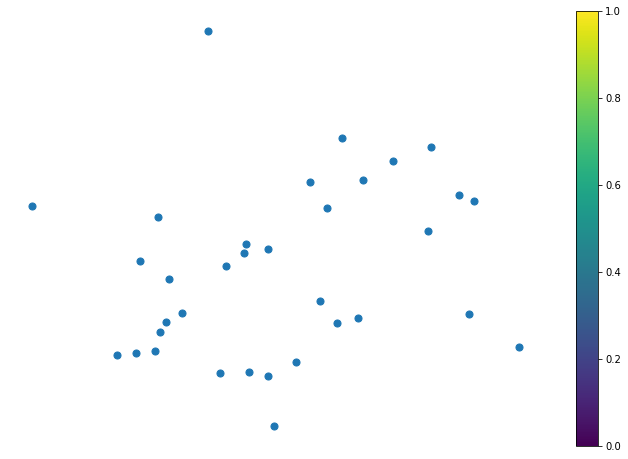

In [54]:
#veamos hasta donde llega tsne
plt.figure(figsize=(12,8))
plt.scatter(dflog2_Final_tsne[:,0], dflog2_Final_tsne[:,1], s = 50)
plt.axis('off')
plt.colorbar()
plt.show()

In [63]:
dflog2_Final_T=dflog2_Final.copy()
dflog2_Final_T

Sample               tipo     MTCP1      FLNA     FGF13      ELF4   
0   CA1396          CRLF2_dup  0.865372  4.768020  2.856591  4.904675  \
1   CA1989          CRLF2_dup  0.938796  5.590270  0.000000  4.775942   
2    CA920          CRLF2_dup  2.065230  6.738658  3.503269  4.134901   
3    CA925          CRLF2_dup  0.778751  6.412202  1.893689  4.730330   
4    CA871     CRLF2_dup/+mut  0.731411  5.420694  0.000000  4.295459   
5    CA894     CRLF2_dup/+mut  1.818770  7.189696  1.312171  5.620781   
6    CA918          CRLF2_mut  1.492493  5.788084  3.684068  4.665352   
7   CA1366    CRLF2--IGH/+mut  1.103066  7.077751  1.524017  5.253043   
8   CA1658       CRLF2--P2RY8  2.113983  7.627496  1.727765  5.499988   
9   CA1889       CRLF2--P2RY8  2.168253  5.826955  4.121618  5.190047   
10  CA2054       CRLF2--P2RY8  1.124501  7.733219  3.589868  5.276895   
11  CA2246       CRLF2--P2RY8  2.627816  6.742049  0.811508  5.568177   
12  CA2255       CRLF2--P2RY8  1.808584  6.050434  1.722884  5.093885   
13   CA826       CRLF2--P2RY8  2.030859  6.934154  1.918543  4.503916   
14  CA1529  CRLF2--P2RY8/+dup  1.822028  6.480567  2.106591  5.392031   
15  CA1675  CRLF2--P2RY8/+dup  1.931050  7.146670  0.000000  5.756403   
16  CA2254  CRLF2--P2RY8/+dup  1.449556  5.221296  0.000000  4.844250   
17  CA1218  CRLF2--P2RY8/+mut  1.953154  6.694402  1.300845  5.050766   
18  CA2211  CRLF2--P2RY8/+mut  2.160328  7.033233  0.417716  5.783256   
19  CA1243          no events  2.240548  7.627335  1.114594  4.841680   
20  CA1362          no events  1.848907  5.803178  0.991966  4.887322   
21  CA1664          no events  1.405800  6.743449  0.730929  5.028992   
22  CA1679          no events  1.447629  6.962878  0.000000  4.573451   
23  CA1682          no events  1.086040  6.453420  0.000000  5.369596   
24  CA1851          no events  1.667599  5.698066  0.000000  5.741300   
25  CA2098          no events  0.590675  6.225425  1.812418  4.979220   
26  CA2100          no events  0.000000  6.546870  4.511998  3.954082   
27  CA2220          no events  2.247520  7.471642  3.446897  5.247692   
28  CA2256          no events  2.041327  6.264795  2.460110  5.059965   
29   CA867          no events  2.081663  8.487229  1.698529  4.663486   
30  CA1082      other fusions  2.384942  7.284855  0.592501  5.584924   
31  CA2106      other fusions  1.389444  6.157326  1.656726  4.641994   
32  CA1371       USP9X--DDX3X  1.114046  6.218951  0.000000  4.369098   
33  CA1614       USP9X--DDX3X  2.388169  7.402049  1.299330  5.082838   

      ATP1B4       BTK      ATRX     ZMYM3  ...    ATP8A2    ACVR1B     ITGA5   
0   0.000000  6.593281  6.445244  4.359598  ...  0.000000  2.904406  7.058990  \
1   0.000000  5.869147  5.941914  3.807553  ...  1.298752  2.553663  6.759521   
2   0.000000  7.324846  6.132968  5.242604  ...  0.000000  3.154474  6.631667   
3   0.000000  6.885692  6.307100  5.262084  ...  2.039156  3.321306  6.475539   
4   0.000000  6.694859  6.035852  4.738450  ...  0.000000  2.928106  6.127563   
5   0.000000  7.388649  6.334604  6.376501  ...  1.167429  4.451927  7.125991   
6   0.000000  7.104465  6.618715  5.585067  ...  0.117883  3.732449  6.534479   
7   0.000000  7.090310  5.583681  5.257131  ...  1.574215  3.178458  6.434144   
8   0.000000  7.208719  6.477872  5.377383  ...  0.122293  3.703243  6.884248   
9   0.000000  7.042478  5.637700  5.419623  ...  0.110791  3.734378  7.109242   
10  0.000000  7.189175  6.147207  5.046678  ...  0.497295  3.614980  6.689826   
11  0.000000  7.525812  6.519955  5.143440  ...  0.130712  3.712012  6.977990   
12  0.521382  5.569420  6.888409  4.750344  ...  0.654032  2.978601  7.746763   
13  0.000000  7.050911  6.063581  5.137879  ...  0.356622  3.027870  6.390741   
14  0.000000  6.470573  5.951309  4.524913  ...  0.000000  3.580470  6.984753   
15  0.000000  7.553853  6.628208  4.969042  ...  1.167025  3.122973  6.535733   
16  0.000000  5.696976  6.598382  4.341591  ...  0.149461  2.686057  7.

In [51]:
# Definir un diccionario de reemplazo
reemplazo = {'no events':0,'other fusions':9,}

# Aplicar el reemplazo utilizando la función replace()
dflog2_Final_T['tipo'] = dflog2_Final_T['tipo'].replace(reemplazo, regex=True)
dflog2_Final_T

Sample               tipo     MTCP1      FLNA     FGF13      ELF4   
0   CA1396          CRLF2_dup  0.865372  4.768020  2.856591  4.904675  \
1   CA1989          CRLF2_dup  0.938796  5.590270  0.000000  4.775942   
2    CA920          CRLF2_dup  2.065230  6.738658  3.503269  4.134901   
3    CA925          CRLF2_dup  0.778751  6.412202  1.893689  4.730330   
4    CA871     CRLF2_dup/+mut  0.731411  5.420694  0.000000  4.295459   
5    CA894     CRLF2_dup/+mut  1.818770  7.189696  1.312171  5.620781   
6    CA918          CRLF2_mut  1.492493  5.788084  3.684068  4.665352   
7   CA1366    CRLF2--IGH/+mut  1.103066  7.077751  1.524017  5.253043   
8   CA1658       CRLF2--P2RY8  2.113983  7.627496  1.727765  5.499988   
9   CA1889       CRLF2--P2RY8  2.168253  5.826955  4.121618  5.190047   
10  CA2054       CRLF2--P2RY8  1.124501  7.733219  3.589868  5.276895   
11  CA2246       CRLF2--P2RY8  2.627816  6.742049  0.811508  5.568177   
12  CA2255       CRLF2--P2RY8  1.808584  6.050434  1.722884  5.093885   
13   CA826       CRLF2--P2RY8  2.030859  6.934154  1.918543  4.503916   
14  CA1529  CRLF2--P2RY8/+dup  1.822028  6.480567  2.106591  5.392031   
15  CA1675  CRLF2--P2RY8/+dup  1.931050  7.146670  0.000000  5.756403   
16  CA2254  CRLF2--P2RY8/+dup  1.449556  5.221296  0.000000  4.844250   
17  CA1218  CRLF2--P2RY8/+mut  1.953154  6.694402  1.300845  5.050766   
18  CA2211  CRLF2--P2RY8/+mut  2.160328  7.033233  0.417716  5.783256   
19  CA1243                  0  2.240548  7.627335  1.114594  4.841680   
20  CA1362                  0  1.848907  5.803178  0.991966  4.887322   
21  CA1664                  0  1.405800  6.743449  0.730929  5.028992   
22  CA1679                  0  1.447629  6.962878  0.000000  4.573451   
23  CA1682                  0  1.086040  6.453420  0.000000  5.369596   
24  CA1851                  0  1.667599  5.698066  0.000000  5.741300   
25  CA2098                  0  0.590675  6.225425  1.812418  4.979220   
26  CA2100                  0  0.000000  6.546870  4.511998  3.954082   
27  CA2220                  0  2.247520  7.471642  3.446897  5.247692   
28  CA2256                  0  2.041327  6.264795  2.460110  5.059965   
29   CA867                  0  2.081663  8.487229  1.698529  4.663486   
30  CA1082                  9  2.384942  7.284855  0.592501  5.584924   
31  CA2106                  9  1.389444  6.157326  1.656726  4.641994   
32  CA1371       USP9X--DDX3X  1.114046  6.218951  0.000000  4.369098   
33  CA1614       USP9X--DDX3X  2.388169  7.402049  1.299330  5.082838   

      ATP1B4       BTK      ATRX     ZMYM3  ...    ATP8A2    ACVR1B     ITGA5   
0   0.000000  6.593281  6.445244  4.359598  ...  0.000000  2.904406  7.058990  \
1   0.000000  5.869147  5.941914  3.807553  ...  1.298752  2.553663  6.759521   
2   0.000000  7.324846  6.132968  5.242604  ...  0.000000  3.154474  6.631667   
3   0.000000  6.885692  6.307100  5.262084  ...  2.039156  3.321306  6.475539   
4   0.000000  6.694859  6.035852  4.738450  ...  0.000000  2.928106  6.127563   
5   0.000000  7.388649  6.334604  6.376501  ...  1.167429  4.451927  7.125991   
6   0.000000  7.104465  6.618715  5.585067  ...  0.117883  3.732449  6.534479   
7   0.000000  7.090310  5.583681  5.257131  ...  1.574215  3.178458  6.434144   
8   0.000000  7.208719  6.477872  5.377383  ...  0.122293  3.703243  6.884248   
9   0.000000  7.042478  5.637700  5.419623  ...  0.110791  3.734378  7.109242   
10  0.000000  7.189175  6.147207  5.046678  ...  0.497295  3.614980  6.689826   
11  0.000000  7.525812  6.519955  5.143440  ...  0.130712  3.712012  6.977990   
12  0.521382  5.569420  6.888409  4.750344  ...  0.654032  2.978601  7.746763   
13  0.000000  7.050911  6.063581  5.137879  ...  0.356622  3.027870  6.390741   
14  0.000000  6.470573  5.951309  4.524913  ...  0.000000  3.580470  6.984753   
15  0.000000  7.553853  6.628208  4.969042  ...  1.167025  3.122973  6.535733   
16  0.000000  5.696976  6.598382  4.341591  ...  0.149461  2.686057  7.

In [52]:
# Definir un diccionario de reemplazo
reemplazo = {'USP9X--DDX3X':6}

# Aplicar el reemplazo utilizando la función replace()
dflog2_Final_T['tipo'] = dflog2_Final_T['tipo'].replace(reemplazo, regex=True)
dflog2_Final_T

Sample               tipo     MTCP1      FLNA     FGF13      ELF4   
0   CA1396          CRLF2_dup  0.865372  4.768020  2.856591  4.904675  \
1   CA1989          CRLF2_dup  0.938796  5.590270  0.000000  4.775942   
2    CA920          CRLF2_dup  2.065230  6.738658  3.503269  4.134901   
3    CA925          CRLF2_dup  0.778751  6.412202  1.893689  4.730330   
4    CA871     CRLF2_dup/+mut  0.731411  5.420694  0.000000  4.295459   
5    CA894     CRLF2_dup/+mut  1.818770  7.189696  1.312171  5.620781   
6    CA918          CRLF2_mut  1.492493  5.788084  3.684068  4.665352   
7   CA1366    CRLF2--IGH/+mut  1.103066  7.077751  1.524017  5.253043   
8   CA1658       CRLF2--P2RY8  2.113983  7.627496  1.727765  5.499988   
9   CA1889       CRLF2--P2RY8  2.168253  5.826955  4.121618  5.190047   
10  CA2054       CRLF2--P2RY8  1.124501  7.733219  3.589868  5.276895   
11  CA2246       CRLF2--P2RY8  2.627816  6.742049  0.811508  5.568177   
12  CA2255       CRLF2--P2RY8  1.808584  6.050434  1.722884  5.093885   
13   CA826       CRLF2--P2RY8  2.030859  6.934154  1.918543  4.503916   
14  CA1529  CRLF2--P2RY8/+dup  1.822028  6.480567  2.106591  5.392031   
15  CA1675  CRLF2--P2RY8/+dup  1.931050  7.146670  0.000000  5.756403   
16  CA2254  CRLF2--P2RY8/+dup  1.449556  5.221296  0.000000  4.844250   
17  CA1218  CRLF2--P2RY8/+mut  1.953154  6.694402  1.300845  5.050766   
18  CA2211  CRLF2--P2RY8/+mut  2.160328  7.033233  0.417716  5.783256   
19  CA1243                  0  2.240548  7.627335  1.114594  4.841680   
20  CA1362                  0  1.848907  5.803178  0.991966  4.887322   
21  CA1664                  0  1.405800  6.743449  0.730929  5.028992   
22  CA1679                  0  1.447629  6.962878  0.000000  4.573451   
23  CA1682                  0  1.086040  6.453420  0.000000  5.369596   
24  CA1851                  0  1.667599  5.698066  0.000000  5.741300   
25  CA2098                  0  0.590675  6.225425  1.812418  4.979220   
26  CA2100                  0  0.000000  6.546870  4.511998  3.954082   
27  CA2220                  0  2.247520  7.471642  3.446897  5.247692   
28  CA2256                  0  2.041327  6.264795  2.460110  5.059965   
29   CA867                  0  2.081663  8.487229  1.698529  4.663486   
30  CA1082                  9  2.384942  7.284855  0.592501  5.584924   
31  CA2106                  9  1.389444  6.157326  1.656726  4.641994   
32  CA1371                  6  1.114046  6.218951  0.000000  4.369098   
33  CA1614                  6  2.388169  7.402049  1.299330  5.082838   

      ATP1B4       BTK      ATRX     ZMYM3  ...    ATP8A2    ACVR1B     ITGA5   
0   0.000000  6.593281  6.445244  4.359598  ...  0.000000  2.904406  7.058990  \
1   0.000000  5.869147  5.941914  3.807553  ...  1.298752  2.553663  6.759521   
2   0.000000  7.324846  6.132968  5.242604  ...  0.000000  3.154474  6.631667   
3   0.000000  6.885692  6.307100  5.262084  ...  2.039156  3.321306  6.475539   
4   0.000000  6.694859  6.035852  4.738450  ...  0.000000  2.928106  6.127563   
5   0.000000  7.388649  6.334604  6.376501  ...  1.167429  4.451927  7.125991   
6   0.000000  7.104465  6.618715  5.585067  ...  0.117883  3.732449  6.534479   
7   0.000000  7.090310  5.583681  5.257131  ...  1.574215  3.178458  6.434144   
8   0.000000  7.208719  6.477872  5.377383  ...  0.122293  3.703243  6.884248   
9   0.000000  7.042478  5.637700  5.419623  ...  0.110791  3.734378  7.109242   
10  0.000000  7.189175  6.147207  5.046678  ...  0.497295  3.614980  6.689826   
11  0.000000  7.525812  6.519955  5.143440  ...  0.130712  3.712012  6.977990   
12  0.521382  5.569420  6.888409  4.750344  ...  0.654032  2.978601  7.746763   
13  0.000000  7.050911  6.063581  5.137879  ...  0.356622  3.027870  6.390741   
14  0.000000  6.470573  5.951309  4.524913  ...  0.000000  3.580470  6.984753   
15  0.000000  7.553853  6.628208  4.969042  ...  1.167025  3.122973  6.535733   
16  0.000000  5.696976  6.598382  4.341591  ...  0.149461  2.686057  7.

In [53]:
cont_tipos2= df_c03['tipo'].value_counts()#Contar los tipos con los pacientes descartados y que solo sean c3
cont_tipos2

tipo
no events            11
CRLF2--P2RY8          6
CRLF2_dup             4
CRLF2--P2RY8/+dup     3
CRLF2_dup/+mut        2
CRLF2--P2RY8/+mut     2
other fusions         2
USP9X--DDX3X          2
CRLF2_mut             1
CRLF2--IGH/+mut       1
Name: count, dtype: int64

In [54]:
# Definir un diccionario de reemplazo
reemplazo = {'CRLF2_mut':7}

# Aplicar el reemplazo utilizando la función replace()
dflog2_Final_T['tipo'] = dflog2_Final_T['tipo'].replace(reemplazo, regex=True)
dflog2_Final_T

Sample               tipo     MTCP1      FLNA     FGF13      ELF4   
0   CA1396          CRLF2_dup  0.865372  4.768020  2.856591  4.904675  \
1   CA1989          CRLF2_dup  0.938796  5.590270  0.000000  4.775942   
2    CA920          CRLF2_dup  2.065230  6.738658  3.503269  4.134901   
3    CA925          CRLF2_dup  0.778751  6.412202  1.893689  4.730330   
4    CA871     CRLF2_dup/+mut  0.731411  5.420694  0.000000  4.295459   
5    CA894     CRLF2_dup/+mut  1.818770  7.189696  1.312171  5.620781   
6    CA918                  7  1.492493  5.788084  3.684068  4.665352   
7   CA1366    CRLF2--IGH/+mut  1.103066  7.077751  1.524017  5.253043   
8   CA1658       CRLF2--P2RY8  2.113983  7.627496  1.727765  5.499988   
9   CA1889       CRLF2--P2RY8  2.168253  5.826955  4.121618  5.190047   
10  CA2054       CRLF2--P2RY8  1.124501  7.733219  3.589868  5.276895   
11  CA2246       CRLF2--P2RY8  2.627816  6.742049  0.811508  5.568177   
12  CA2255       CRLF2--P2RY8  1.808584  6.050434  1.722884  5.093885   
13   CA826       CRLF2--P2RY8  2.030859  6.934154  1.918543  4.503916   
14  CA1529  CRLF2--P2RY8/+dup  1.822028  6.480567  2.106591  5.392031   
15  CA1675  CRLF2--P2RY8/+dup  1.931050  7.146670  0.000000  5.756403   
16  CA2254  CRLF2--P2RY8/+dup  1.449556  5.221296  0.000000  4.844250   
17  CA1218  CRLF2--P2RY8/+mut  1.953154  6.694402  1.300845  5.050766   
18  CA2211  CRLF2--P2RY8/+mut  2.160328  7.033233  0.417716  5.783256   
19  CA1243                  0  2.240548  7.627335  1.114594  4.841680   
20  CA1362                  0  1.848907  5.803178  0.991966  4.887322   
21  CA1664                  0  1.405800  6.743449  0.730929  5.028992   
22  CA1679                  0  1.447629  6.962878  0.000000  4.573451   
23  CA1682                  0  1.086040  6.453420  0.000000  5.369596   
24  CA1851                  0  1.667599  5.698066  0.000000  5.741300   
25  CA2098                  0  0.590675  6.225425  1.812418  4.979220   
26  CA2100                  0  0.000000  6.546870  4.511998  3.954082   
27  CA2220                  0  2.247520  7.471642  3.446897  5.247692   
28  CA2256                  0  2.041327  6.264795  2.460110  5.059965   
29   CA867                  0  2.081663  8.487229  1.698529  4.663486   
30  CA1082                  9  2.384942  7.284855  0.592501  5.584924   
31  CA2106                  9  1.389444  6.157326  1.656726  4.641994   
32  CA1371                  6  1.114046  6.218951  0.000000  4.369098   
33  CA1614                  6  2.388169  7.402049  1.299330  5.082838   

      ATP1B4       BTK      ATRX     ZMYM3  ...    ATP8A2    ACVR1B     ITGA5   
0   0.000000  6.593281  6.445244  4.359598  ...  0.000000  2.904406  7.058990  \
1   0.000000  5.869147  5.941914  3.807553  ...  1.298752  2.553663  6.759521   
2   0.000000  7.324846  6.132968  5.242604  ...  0.000000  3.154474  6.631667   
3   0.000000  6.885692  6.307100  5.262084  ...  2.039156  3.321306  6.475539   
4   0.000000  6.694859  6.035852  4.738450  ...  0.000000  2.928106  6.127563   
5   0.000000  7.388649  6.334604  6.376501  ...  1.167429  4.451927  7.125991   
6   0.000000  7.104465  6.618715  5.585067  ...  0.117883  3.732449  6.534479   
7   0.000000  7.090310  5.583681  5.257131  ...  1.574215  3.178458  6.434144   
8   0.000000  7.208719  6.477872  5.377383  ...  0.122293  3.703243  6.884248   
9   0.000000  7.042478  5.637700  5.419623  ...  0.110791  3.734378  7.109242   
10  0.000000  7.189175  6.147207  5.046678  ...  0.497295  3.614980  6.689826   
11  0.000000  7.525812  6.519955  5.143440  ...  0.130712  3.712012  6.977990   
12  0.521382  5.569420  6.888409  4.750344  ...  0.654032  2.978601  7.746763   
13  0.000000  7.050911  6.063581  5.137879  ...  0.356622  3.027870  6.390741   
14  0.000000  6.470573  5.951309  4.524913  ...  0.000000  3.580470  6.984753   
15  0.000000  7.553853  6.628208  4.969042  ...  1.167025  3.122973  6.535733   
16  0.000000  5.696976  6.598382  4.341591  ...  0.149461  2.686057  7.

In [59]:
# Definir un diccionario de reemplazo
reemplazo = {'CRLF2_dup/+mut': 4}

# Aplicar el reemplazo utilizando la función replace()
dflog2_Final_T['tipo'] = dflog2_Final_T['tipo'].replace(reemplazo, regex=True)
dflog2_Final_T

Sample               tipo     MTCP1      FLNA     FGF13      ELF4   
0   CA1396          CRLF2_dup  0.865372  4.768020  2.856591  4.904675  \
1   CA1989          CRLF2_dup  0.938796  5.590270  0.000000  4.775942   
2    CA920          CRLF2_dup  2.065230  6.738658  3.503269  4.134901   
3    CA925          CRLF2_dup  0.778751  6.412202  1.893689  4.730330   
4    CA871     CRLF2_dup/+mut  0.731411  5.420694  0.000000  4.295459   
5    CA894     CRLF2_dup/+mut  1.818770  7.189696  1.312171  5.620781   
6    CA918                  7  1.492493  5.788084  3.684068  4.665352   
7   CA1366    CRLF2--IGH/+mut  1.103066  7.077751  1.524017  5.253043   
8   CA1658       CRLF2--P2RY8  2.113983  7.627496  1.727765  5.499988   
9   CA1889       CRLF2--P2RY8  2.168253  5.826955  4.121618  5.190047   
10  CA2054       CRLF2--P2RY8  1.124501  7.733219  3.589868  5.276895   
11  CA2246       CRLF2--P2RY8  2.627816  6.742049  0.811508  5.568177   
12  CA2255       CRLF2--P2RY8  1.808584  6.050434  1.722884  5.093885   
13   CA826       CRLF2--P2RY8  2.030859  6.934154  1.918543  4.503916   
14  CA1529  CRLF2--P2RY8/+dup  1.822028  6.480567  2.106591  5.392031   
15  CA1675  CRLF2--P2RY8/+dup  1.931050  7.146670  0.000000  5.756403   
16  CA2254  CRLF2--P2RY8/+dup  1.449556  5.221296  0.000000  4.844250   
17  CA1218  CRLF2--P2RY8/+mut  1.953154  6.694402  1.300845  5.050766   
18  CA2211  CRLF2--P2RY8/+mut  2.160328  7.033233  0.417716  5.783256   
19  CA1243                  0  2.240548  7.627335  1.114594  4.841680   
20  CA1362                  0  1.848907  5.803178  0.991966  4.887322   
21  CA1664                  0  1.405800  6.743449  0.730929  5.028992   
22  CA1679                  0  1.447629  6.962878  0.000000  4.573451   
23  CA1682                  0  1.086040  6.453420  0.000000  5.369596   
24  CA1851                  0  1.667599  5.698066  0.000000  5.741300   
25  CA2098                  0  0.590675  6.225425  1.812418  4.979220   
26  CA2100                  0  0.000000  6.546870  4.511998  3.954082   
27  CA2220                  0  2.247520  7.471642  3.446897  5.247692   
28  CA2256                  0  2.041327  6.264795  2.460110  5.059965   
29   CA867                  0  2.081663  8.487229  1.698529  4.663486   
30  CA1082                  9  2.384942  7.284855  0.592501  5.584924   
31  CA2106                  9  1.389444  6.157326  1.656726  4.641994   
32  CA1371                  6  1.114046  6.218951  0.000000  4.369098   
33  CA1614                  6  2.388169  7.402049  1.299330  5.082838   

      ATP1B4       BTK      ATRX     ZMYM3  ...    ATP8A2    ACVR1B     ITGA5   
0   0.000000  6.593281  6.445244  4.359598  ...  0.000000  2.904406  7.058990  \
1   0.000000  5.869147  5.941914  3.807553  ...  1.298752  2.553663  6.759521   
2   0.000000  7.324846  6.132968  5.242604  ...  0.000000  3.154474  6.631667   
3   0.000000  6.885692  6.307100  5.262084  ...  2.039156  3.321306  6.475539   
4   0.000000  6.694859  6.035852  4.738450  ...  0.000000  2.928106  6.127563   
5   0.000000  7.388649  6.334604  6.376501  ...  1.167429  4.451927  7.125991   
6   0.000000  7.104465  6.618715  5.585067  ...  0.117883  3.732449  6.534479   
7   0.000000  7.090310  5.583681  5.257131  ...  1.574215  3.178458  6.434144   
8   0.000000  7.208719  6.477872  5.377383  ...  0.122293  3.703243  6.884248   
9   0.000000  7.042478  5.637700  5.419623  ...  0.110791  3.734378  7.109242   
10  0.000000  7.189175  6.147207  5.046678  ...  0.497295  3.614980  6.689826   
11  0.000000  7.525812  6.519955  5.143440  ...  0.130712  3.712012  6.977990   
12  0.521382  5.569420  6.888409  4.750344  ...  0.654032  2.978601  7.746763   
13  0.000000  7.050911  6.063581  5.137879  ...  0.356622  3.027870  6.390741   
14  0.000000  6.470573  5.951309  4.524913  ...  0.000000  3.580470  6.984753   
15  0.000000  7.553853  6.628208  4.969042  ...  1.167025  3.122973  6.535733   
16  0.000000  5.696976  6.598382  4.341591  ...  0.149461  2.686057  7.

In [60]:
# Reemplazar valores específicos en todo el DataFrame usando replace
valor_a_reemplazar = "CRLF2_dup/+mut"
nuevo_valor = 4

dflog2_Final_T.replace(valor_a_reemplazar, nuevo_valor, inplace=True)
dflog2_Final_T

Sample               tipo     MTCP1      FLNA     FGF13      ELF4   
0   CA1396          CRLF2_dup  0.865372  4.768020  2.856591  4.904675  \
1   CA1989          CRLF2_dup  0.938796  5.590270  0.000000  4.775942   
2    CA920          CRLF2_dup  2.065230  6.738658  3.503269  4.134901   
3    CA925          CRLF2_dup  0.778751  6.412202  1.893689  4.730330   
4    CA871                  4  0.731411  5.420694  0.000000  4.295459   
5    CA894                  4  1.818770  7.189696  1.312171  5.620781   
6    CA918                  7  1.492493  5.788084  3.684068  4.665352   
7   CA1366    CRLF2--IGH/+mut  1.103066  7.077751  1.524017  5.253043   
8   CA1658       CRLF2--P2RY8  2.113983  7.627496  1.727765  5.499988   
9   CA1889       CRLF2--P2RY8  2.168253  5.826955  4.121618  5.190047   
10  CA2054       CRLF2--P2RY8  1.124501  7.733219  3.589868  5.276895   
11  CA2246       CRLF2--P2RY8  2.627816  6.742049  0.811508  5.568177   
12  CA2255       CRLF2--P2RY8  1.808584  6.050434  1.722884  5.093885   
13   CA826       CRLF2--P2RY8  2.030859  6.934154  1.918543  4.503916   
14  CA1529  CRLF2--P2RY8/+dup  1.822028  6.480567  2.106591  5.392031   
15  CA1675  CRLF2--P2RY8/+dup  1.931050  7.146670  0.000000  5.756403   
16  CA2254  CRLF2--P2RY8/+dup  1.449556  5.221296  0.000000  4.844250   
17  CA1218  CRLF2--P2RY8/+mut  1.953154  6.694402  1.300845  5.050766   
18  CA2211  CRLF2--P2RY8/+mut  2.160328  7.033233  0.417716  5.783256   
19  CA1243                  0  2.240548  7.627335  1.114594  4.841680   
20  CA1362                  0  1.848907  5.803178  0.991966  4.887322   
21  CA1664                  0  1.405800  6.743449  0.730929  5.028992   
22  CA1679                  0  1.447629  6.962878  0.000000  4.573451   
23  CA1682                  0  1.086040  6.453420  0.000000  5.369596   
24  CA1851                  0  1.667599  5.698066  0.000000  5.741300   
25  CA2098                  0  0.590675  6.225425  1.812418  4.979220   
26  CA2100                  0  0.000000  6.546870  4.511998  3.954082   
27  CA2220                  0  2.247520  7.471642  3.446897  5.247692   
28  CA2256                  0  2.041327  6.264795  2.460110  5.059965   
29   CA867                  0  2.081663  8.487229  1.698529  4.663486   
30  CA1082                  9  2.384942  7.284855  0.592501  5.584924   
31  CA2106                  9  1.389444  6.157326  1.656726  4.641994   
32  CA1371                  6  1.114046  6.218951  0.000000  4.369098   
33  CA1614                  6  2.388169  7.402049  1.299330  5.082838   

      ATP1B4       BTK      ATRX     ZMYM3  ...    ATP8A2    ACVR1B     ITGA5   
0   0.000000  6.593281  6.445244  4.359598  ...  0.000000  2.904406  7.058990  \
1   0.000000  5.869147  5.941914  3.807553  ...  1.298752  2.553663  6.759521   
2   0.000000  7.324846  6.132968  5.242604  ...  0.000000  3.154474  6.631667   
3   0.000000  6.885692  6.307100  5.262084  ...  2.039156  3.321306  6.475539   
4   0.000000  6.694859  6.035852  4.738450  ...  0.000000  2.928106  6.127563   
5   0.000000  7.388649  6.334604  6.376501  ...  1.167429  4.451927  7.125991   
6   0.000000  7.104465  6.618715  5.585067  ...  0.117883  3.732449  6.534479   
7   0.000000  7.090310  5.583681  5.257131  ...  1.574215  3.178458  6.434144   
8   0.000000  7.208719  6.477872  5.377383  ...  0.122293  3.703243  6.884248   
9   0.000000  7.042478  5.637700  5.419623  ...  0.110791  3.734378  7.109242   
10  0.000000  7.189175  6.147207  5.046678  ...  0.497295  3.614980  6.689826   
11  0.000000  7.525812  6.519955  5.143440  ...  0.130712  3.712012  6.977990   
12  0.521382  5.569420  6.888409  4.750344  ...  0.654032  2.978601  7.746763   
13  0.000000  7.050911  6.063581  5.137879  ...  0.356622  3.027870  6.390741   
14  0.000000  6.470573  5.951309  4.524913  ...  0.000000  3.580470  6.984753   
15  0.000000  7.553853  6.628208  4.969042  ...  1.167025  3.122973  6.535733   
16  0.000000  5.696976  6.598382  4.341591  ...  0.149461  2.686057  7.

In [61]:
# Definir un diccionario de reemplazo
reemplazo = {'CRLF2_dup':2}

# Aplicar el reemplazo utilizando la función replace()
dflog2_Final_T['tipo'] = dflog2_Final_T['tipo'].replace(reemplazo, regex=True)
dflog2_Final_T

Sample               tipo     MTCP1      FLNA     FGF13      ELF4   
0   CA1396                  2  0.865372  4.768020  2.856591  4.904675  \
1   CA1989                  2  0.938796  5.590270  0.000000  4.775942   
2    CA920                  2  2.065230  6.738658  3.503269  4.134901   
3    CA925                  2  0.778751  6.412202  1.893689  4.730330   
4    CA871                  4  0.731411  5.420694  0.000000  4.295459   
5    CA894                  4  1.818770  7.189696  1.312171  5.620781   
6    CA918                  7  1.492493  5.788084  3.684068  4.665352   
7   CA1366    CRLF2--IGH/+mut  1.103066  7.077751  1.524017  5.253043   
8   CA1658       CRLF2--P2RY8  2.113983  7.627496  1.727765  5.499988   
9   CA1889       CRLF2--P2RY8  2.168253  5.826955  4.121618  5.190047   
10  CA2054       CRLF2--P2RY8  1.124501  7.733219  3.589868  5.276895   
11  CA2246       CRLF2--P2RY8  2.627816  6.742049  0.811508  5.568177   
12  CA2255       CRLF2--P2RY8  1.808584  6.050434  1.722884  5.093885   
13   CA826       CRLF2--P2RY8  2.030859  6.934154  1.918543  4.503916   
14  CA1529  CRLF2--P2RY8/+dup  1.822028  6.480567  2.106591  5.392031   
15  CA1675  CRLF2--P2RY8/+dup  1.931050  7.146670  0.000000  5.756403   
16  CA2254  CRLF2--P2RY8/+dup  1.449556  5.221296  0.000000  4.844250   
17  CA1218  CRLF2--P2RY8/+mut  1.953154  6.694402  1.300845  5.050766   
18  CA2211  CRLF2--P2RY8/+mut  2.160328  7.033233  0.417716  5.783256   
19  CA1243                  0  2.240548  7.627335  1.114594  4.841680   
20  CA1362                  0  1.848907  5.803178  0.991966  4.887322   
21  CA1664                  0  1.405800  6.743449  0.730929  5.028992   
22  CA1679                  0  1.447629  6.962878  0.000000  4.573451   
23  CA1682                  0  1.086040  6.453420  0.000000  5.369596   
24  CA1851                  0  1.667599  5.698066  0.000000  5.741300   
25  CA2098                  0  0.590675  6.225425  1.812418  4.979220   
26  CA2100                  0  0.000000  6.546870  4.511998  3.954082   
27  CA2220                  0  2.247520  7.471642  3.446897  5.247692   
28  CA2256                  0  2.041327  6.264795  2.460110  5.059965   
29   CA867                  0  2.081663  8.487229  1.698529  4.663486   
30  CA1082                  9  2.384942  7.284855  0.592501  5.584924   
31  CA2106                  9  1.389444  6.157326  1.656726  4.641994   
32  CA1371                  6  1.114046  6.218951  0.000000  4.369098   
33  CA1614                  6  2.388169  7.402049  1.299330  5.082838   

      ATP1B4       BTK      ATRX     ZMYM3  ...    ATP8A2    ACVR1B     ITGA5   
0   0.000000  6.593281  6.445244  4.359598  ...  0.000000  2.904406  7.058990  \
1   0.000000  5.869147  5.941914  3.807553  ...  1.298752  2.553663  6.759521   
2   0.000000  7.324846  6.132968  5.242604  ...  0.000000  3.154474  6.631667   
3   0.000000  6.885692  6.307100  5.262084  ...  2.039156  3.321306  6.475539   
4   0.000000  6.694859  6.035852  4.738450  ...  0.000000  2.928106  6.127563   
5   0.000000  7.388649  6.334604  6.376501  ...  1.167429  4.451927  7.125991   
6   0.000000  7.104465  6.618715  5.585067  ...  0.117883  3.732449  6.534479   
7   0.000000  7.090310  5.583681  5.257131  ...  1.574215  3.178458  6.434144   
8   0.000000  7.208719  6.477872  5.377383  ...  0.122293  3.703243  6.884248   
9   0.000000  7.042478  5.637700  5.419623  ...  0.110791  3.734378  7.109242   
10  0.000000  7.189175  6.147207  5.046678  ...  0.497295  3.614980  6.689826   
11  0.000000  7.525812  6.519955  5.143440  ...  0.130712  3.712012  6.977990   
12  0.521382  5.569420  6.888409  4.750344  ...  0.654032  2.978601  7.746763   
13  0.000000  7.050911  6.063581  5.137879  ...  0.356622  3.027870  6.390741   
14  0.000000  6.470573  5.951309  4.524913  ...  0.000000  3.580470  6.984753   
15  0.000000  7.553853  6.628208  4.969042  ...  1.167025  3.122973  6.535733   
16  0.000000  5.696976  6.598382  4.341591  ...  0.149461  2.686057  7.

In [64]:
# Reemplazar valores específicos en todo el DataFrame usando replace
valor_a_reemplazar = "CRLF2--P2RY8/+dup"
nuevo_valor = 3

dflog2_Final_T.replace(valor_a_reemplazar, nuevo_valor, inplace=True)
dflog2_Final_T

Sample               tipo     MTCP1      FLNA     FGF13      ELF4   
0   CA1396                  2  0.865372  4.768020  2.856591  4.904675  \
1   CA1989                  2  0.938796  5.590270  0.000000  4.775942   
2    CA920                  2  2.065230  6.738658  3.503269  4.134901   
3    CA925                  2  0.778751  6.412202  1.893689  4.730330   
4    CA871                  4  0.731411  5.420694  0.000000  4.295459   
5    CA894                  4  1.818770  7.189696  1.312171  5.620781   
6    CA918                  7  1.492493  5.788084  3.684068  4.665352   
7   CA1366    CRLF2--IGH/+mut  1.103066  7.077751  1.524017  5.253043   
8   CA1658       CRLF2--P2RY8  2.113983  7.627496  1.727765  5.499988   
9   CA1889       CRLF2--P2RY8  2.168253  5.826955  4.121618  5.190047   
10  CA2054       CRLF2--P2RY8  1.124501  7.733219  3.589868  5.276895   
11  CA2246       CRLF2--P2RY8  2.627816  6.742049  0.811508  5.568177   
12  CA2255       CRLF2--P2RY8  1.808584  6.050434  1.722884  5.093885   
13   CA826       CRLF2--P2RY8  2.030859  6.934154  1.918543  4.503916   
14  CA1529                  3  1.822028  6.480567  2.106591  5.392031   
15  CA1675                  3  1.931050  7.146670  0.000000  5.756403   
16  CA2254                  3  1.449556  5.221296  0.000000  4.844250   
17  CA1218  CRLF2--P2RY8/+mut  1.953154  6.694402  1.300845  5.050766   
18  CA2211  CRLF2--P2RY8/+mut  2.160328  7.033233  0.417716  5.783256   
19  CA1243                  0  2.240548  7.627335  1.114594  4.841680   
20  CA1362                  0  1.848907  5.803178  0.991966  4.887322   
21  CA1664                  0  1.405800  6.743449  0.730929  5.028992   
22  CA1679                  0  1.447629  6.962878  0.000000  4.573451   
23  CA1682                  0  1.086040  6.453420  0.000000  5.369596   
24  CA1851                  0  1.667599  5.698066  0.000000  5.741300   
25  CA2098                  0  0.590675  6.225425  1.812418  4.979220   
26  CA2100                  0  0.000000  6.546870  4.511998  3.954082   
27  CA2220                  0  2.247520  7.471642  3.446897  5.247692   
28  CA2256                  0  2.041327  6.264795  2.460110  5.059965   
29   CA867                  0  2.081663  8.487229  1.698529  4.663486   
30  CA1082                  9  2.384942  7.284855  0.592501  5.584924   
31  CA2106                  9  1.389444  6.157326  1.656726  4.641994   
32  CA1371                  6  1.114046  6.218951  0.000000  4.369098   
33  CA1614                  6  2.388169  7.402049  1.299330  5.082838   

      ATP1B4       BTK      ATRX     ZMYM3  ...    ATP8A2    ACVR1B     ITGA5   
0   0.000000  6.593281  6.445244  4.359598  ...  0.000000  2.904406  7.058990  \
1   0.000000  5.869147  5.941914  3.807553  ...  1.298752  2.553663  6.759521   
2   0.000000  7.324846  6.132968  5.242604  ...  0.000000  3.154474  6.631667   
3   0.000000  6.885692  6.307100  5.262084  ...  2.039156  3.321306  6.475539   
4   0.000000  6.694859  6.035852  4.738450  ...  0.000000  2.928106  6.127563   
5   0.000000  7.388649  6.334604  6.376501  ...  1.167429  4.451927  7.125991   
6   0.000000  7.104465  6.618715  5.585067  ...  0.117883  3.732449  6.534479   
7   0.000000  7.090310  5.583681  5.257131  ...  1.574215  3.178458  6.434144   
8   0.000000  7.208719  6.477872  5.377383  ...  0.122293  3.703243  6.884248   
9   0.000000  7.042478  5.637700  5.419623  ...  0.110791  3.734378  7.109242   
10  0.000000  7.189175  6.147207  5.046678  ...  0.497295  3.614980  6.689826   
11  0.000000  7.525812  6.519955  5.143440  ...  0.130712  3.712012  6.977990   
12  0.521382  5.569420  6.888409  4.750344  ...  0.654032  2.978601  7.746763   
13  0.000000  7.050911  6.063581  5.137879  ...  0.356622  3.027870  6.390741   
14  0.000000  6.470573  5.951309  4.524913  ...  0.000000  3.580470  6.984753   
15  0.000000  7.553853  6.628208  4.969042  ...  1.167025  3.122973  6.535733   
16  0.000000  5.696976  6.598382  4.341591  ...  0.149461  2.686057  7.

In [65]:
# Reemplazar valores específicos en todo el DataFrame usando replace
valor_a_reemplazar = "CRLF2--P2RY8/+mut"
nuevo_valor = 5

dflog2_Final_T.replace(valor_a_reemplazar, nuevo_valor, inplace=True)
dflog2_Final_T

Sample             tipo     MTCP1      FLNA     FGF13      ELF4    ATP1B4   
0   CA1396                2  0.865372  4.768020  2.856591  4.904675  0.000000  \
1   CA1989                2  0.938796  5.590270  0.000000  4.775942  0.000000   
2    CA920                2  2.065230  6.738658  3.503269  4.134901  0.000000   
3    CA925                2  0.778751  6.412202  1.893689  4.730330  0.000000   
4    CA871                4  0.731411  5.420694  0.000000  4.295459  0.000000   
5    CA894                4  1.818770  7.189696  1.312171  5.620781  0.000000   
6    CA918                7  1.492493  5.788084  3.684068  4.665352  0.000000   
7   CA1366  CRLF2--IGH/+mut  1.103066  7.077751  1.524017  5.253043  0.000000   
8   CA1658     CRLF2--P2RY8  2.113983  7.627496  1.727765  5.499988  0.000000   
9   CA1889     CRLF2--P2RY8  2.168253  5.826955  4.121618  5.190047  0.000000   
10  CA2054     CRLF2--P2RY8  1.124501  7.733219  3.589868  5.276895  0.000000   
11  CA2246     CRLF2--P2RY8  2.627816  6.742049  0.811508  5.568177  0.000000   
12  CA2255     CRLF2--P2RY8  1.808584  6.050434  1.722884  5.093885  0.521382   
13   CA826     CRLF2--P2RY8  2.030859  6.934154  1.918543  4.503916  0.000000   
14  CA1529                3  1.822028  6.480567  2.106591  5.392031  0.000000   
15  CA1675                3  1.931050  7.146670  0.000000  5.756403  0.000000   
16  CA2254                3  1.449556  5.221296  0.000000  4.844250  0.000000   
17  CA1218                5  1.953154  6.694402  1.300845  5.050766  0.000000   
18  CA2211                5  2.160328  7.033233  0.417716  5.783256  0.463520   
19  CA1243                0  2.240548  7.627335  1.114594  4.841680  0.000000   
20  CA1362                0  1.848907  5.803178  0.991966  4.887322  0.169826   
21  CA1664                0  1.405800  6.743449  0.730929  5.028992  0.000000   
22  CA1679                0  1.447629  6.962878  0.000000  4.573451  0.000000   
23  CA1682                0  1.086040  6.453420  0.000000  5.369596  0.000000   
24  CA1851                0  1.667599  5.698066  0.000000  5.741300  0.000000   
25  CA2098                0  0.590675  6.225425  1.812418  4.979220  0.000000   
26  CA2100                0  0.000000  6.546870  4.511998  3.954082  0.000000   
27  CA2220                0  2.247520  7.471642  3.446897  5.247692  0.000000   
28  CA2256                0  2.041327  6.264795  2.460110  5.059965  0.173632   
29   CA867                0  2.081663  8.487229  1.698529  4.663486  0.000000   
30  CA1082                9  2.384942  7.284855  0.592501  5.584924  0.000000   
31  CA2106                9  1.389444  6.157326  1.656726  4.641994  0.000000   
32  CA1371                6  1.114046  6.218951  0.000000  4.369098  0.000000   
33  CA1614                6  2.388169  7.402049  1.299330  5.082838  0.000000   

         BTK      ATRX     ZMYM3  ...    ATP8A2    ACVR1B     ITGA5      FLI1   
0   6.593281  6.445244  4.359598  ...  0.000000  2.904406  7.058990  6.220354  \
1   5.869147  5.941914  3.807553  ...  1.298752  2.553663  6.759521  5.394713   
2   7.324846  6.132968  5.242604  ...  0.000000  3.154474  6.631667  6.845878   
3   6.885692  6.307100  5.262084  ...  2.039156  3.321306  6.475539  6.603745   
4   6.694859  6.035852  4.738450  ...  0.000000  2.928106  6.127563  5.767142   
5   7.388649  6.334604  6.376501  ...  1.167429  4.451927  7.125991  6.296336   
6   7.104465  6.618715  5.585067  ...  0.117883  3.732449  6.534479  6.598089   
7   7.090310  5.583681  5.257131  ...  1.574215  3.178458  6.434144  6.707124   
8   7.208719  6.477872  5.377383  ...  0.122293  3.703243  6.884248  6.788473   
9   7.042478  5.637700  5.419623  ...  0.110791  3.734378  7.109242  7.262292   
10  7.189175  6.147207  5.046678  ...  0.497295  3.614980  6.689826  7.076679   
11  7.525812  6.519955  5.143440  ...  0.130712  3.712012  6.977990  6.470515   
12  5.569420  6.888409  4.750344  ...  0.654032  2.978601  7.746763  4.933437   
13  7.050911  6.063581  5.137879  

In [66]:
# Reemplazar valores específicos en todo el DataFrame usando replace
valor_a_reemplazar = "CRLF2--P2RY8"
nuevo_valor = 1

dflog2_Final_T.replace(valor_a_reemplazar, nuevo_valor, inplace=True)
dflog2_Final_T

Sample             tipo     MTCP1      FLNA     FGF13      ELF4    ATP1B4   
0   CA1396                2  0.865372  4.768020  2.856591  4.904675  0.000000  \
1   CA1989                2  0.938796  5.590270  0.000000  4.775942  0.000000   
2    CA920                2  2.065230  6.738658  3.503269  4.134901  0.000000   
3    CA925                2  0.778751  6.412202  1.893689  4.730330  0.000000   
4    CA871                4  0.731411  5.420694  0.000000  4.295459  0.000000   
5    CA894                4  1.818770  7.189696  1.312171  5.620781  0.000000   
6    CA918                7  1.492493  5.788084  3.684068  4.665352  0.000000   
7   CA1366  CRLF2--IGH/+mut  1.103066  7.077751  1.524017  5.253043  0.000000   
8   CA1658                1  2.113983  7.627496  1.727765  5.499988  0.000000   
9   CA1889                1  2.168253  5.826955  4.121618  5.190047  0.000000   
10  CA2054                1  1.124501  7.733219  3.589868  5.276895  0.000000   
11  CA2246                1  2.627816  6.742049  0.811508  5.568177  0.000000   
12  CA2255                1  1.808584  6.050434  1.722884  5.093885  0.521382   
13   CA826                1  2.030859  6.934154  1.918543  4.503916  0.000000   
14  CA1529                3  1.822028  6.480567  2.106591  5.392031  0.000000   
15  CA1675                3  1.931050  7.146670  0.000000  5.756403  0.000000   
16  CA2254                3  1.449556  5.221296  0.000000  4.844250  0.000000   
17  CA1218                5  1.953154  6.694402  1.300845  5.050766  0.000000   
18  CA2211                5  2.160328  7.033233  0.417716  5.783256  0.463520   
19  CA1243                0  2.240548  7.627335  1.114594  4.841680  0.000000   
20  CA1362                0  1.848907  5.803178  0.991966  4.887322  0.169826   
21  CA1664                0  1.405800  6.743449  0.730929  5.028992  0.000000   
22  CA1679                0  1.447629  6.962878  0.000000  4.573451  0.000000   
23  CA1682                0  1.086040  6.453420  0.000000  5.369596  0.000000   
24  CA1851                0  1.667599  5.698066  0.000000  5.741300  0.000000   
25  CA2098                0  0.590675  6.225425  1.812418  4.979220  0.000000   
26  CA2100                0  0.000000  6.546870  4.511998  3.954082  0.000000   
27  CA2220                0  2.247520  7.471642  3.446897  5.247692  0.000000   
28  CA2256                0  2.041327  6.264795  2.460110  5.059965  0.173632   
29   CA867                0  2.081663  8.487229  1.698529  4.663486  0.000000   
30  CA1082                9  2.384942  7.284855  0.592501  5.584924  0.000000   
31  CA2106                9  1.389444  6.157326  1.656726  4.641994  0.000000   
32  CA1371                6  1.114046  6.218951  0.000000  4.369098  0.000000   
33  CA1614                6  2.388169  7.402049  1.299330  5.082838  0.000000   

         BTK      ATRX     ZMYM3  ...    ATP8A2    ACVR1B     ITGA5      FLI1   
0   6.593281  6.445244  4.359598  ...  0.000000  2.904406  7.058990  6.220354  \
1   5.869147  5.941914  3.807553  ...  1.298752  2.553663  6.759521  5.394713   
2   7.324846  6.132968  5.242604  ...  0.000000  3.154474  6.631667  6.845878   
3   6.885692  6.307100  5.262084  ...  2.039156  3.321306  6.475539  6.603745   
4   6.694859  6.035852  4.738450  ...  0.000000  2.928106  6.127563  5.767142   
5   7.388649  6.334604  6.376501  ...  1.167429  4.451927  7.125991  6.296336   
6   7.104465  6.618715  5.585067  ...  0.117883  3.732449  6.534479  6.598089   
7   7.090310  5.583681  5.257131  ...  1.574215  3.178458  6.434144  6.707124   
8   7.208719  6.477872  5.377383  ...  0.122293  3.703243  6.884248  6.788473   
9   7.042478  5.637700  5.419623  ...  0.110791  3.734378  7.109242  7.262292   
10  7.189175  6.147207  5.046678  ...  0.497295  3.614980  6.689826  7.076679   
11  7.525812  6.519955  5.143440  ...  0.130712  3.712012  6.977990  6.470515   
12  5.569420  6.888409  4.750344  ...  0.654032  2.978601  7.746763  4.933437   
13  7.050911  6.063581  5.137879  

In [67]:
# Reemplazar valores específicos en todo el DataFrame usando replace
valor_a_reemplazar = "CRLF2--IGH/+mut"
nuevo_valor = 8

dflog2_Final_T.replace(valor_a_reemplazar, nuevo_valor, inplace=True)
dflog2_Final_T

Sample  tipo     MTCP1      FLNA     FGF13      ELF4    ATP1B4       BTK   
0   CA1396     2  0.865372  4.768020  2.856591  4.904675  0.000000  6.593281  \
1   CA1989     2  0.938796  5.590270  0.000000  4.775942  0.000000  5.869147   
2    CA920     2  2.065230  6.738658  3.503269  4.134901  0.000000  7.324846   
3    CA925     2  0.778751  6.412202  1.893689  4.730330  0.000000  6.885692   
4    CA871     4  0.731411  5.420694  0.000000  4.295459  0.000000  6.694859   
5    CA894     4  1.818770  7.189696  1.312171  5.620781  0.000000  7.388649   
6    CA918     7  1.492493  5.788084  3.684068  4.665352  0.000000  7.104465   
7   CA1366     8  1.103066  7.077751  1.524017  5.253043  0.000000  7.090310   
8   CA1658     1  2.113983  7.627496  1.727765  5.499988  0.000000  7.208719   
9   CA1889     1  2.168253  5.826955  4.121618  5.190047  0.000000  7.042478   
10  CA2054     1  1.124501  7.733219  3.589868  5.276895  0.000000  7.189175   
11  CA2246     1  2.627816  6.742049  0.811508  5.568177  0.000000  7.525812   
12  CA2255     1  1.808584  6.050434  1.722884  5.093885  0.521382  5.569420   
13   CA826     1  2.030859  6.934154  1.918543  4.503916  0.000000  7.050911   
14  CA1529     3  1.822028  6.480567  2.106591  5.392031  0.000000  6.470573   
15  CA1675     3  1.931050  7.146670  0.000000  5.756403  0.000000  7.553853   
16  CA2254     3  1.449556  5.221296  0.000000  4.844250  0.000000  5.696976   
17  CA1218     5  1.953154  6.694402  1.300845  5.050766  0.000000  7.183431   
18  CA2211     5  2.160328  7.033233  0.417716  5.783256  0.463520  6.567048   
19  CA1243     0  2.240548  7.627335  1.114594  4.841680  0.000000  7.199507   
20  CA1362     0  1.848907  5.803178  0.991966  4.887322  0.169826  7.133751   
21  CA1664     0  1.405800  6.743449  0.730929  5.028992  0.000000  6.638187   
22  CA1679     0  1.447629  6.962878  0.000000  4.573451  0.000000  5.958776   
23  CA1682     0  1.086040  6.453420  0.000000  5.369596  0.000000  4.974925   
24  CA1851     0  1.667599  5.698066  0.000000  5.741300  0.000000  6.606001   
25  CA2098     0  0.590675  6.225425  1.812418  4.979220  0.000000  5.817671   
26  CA2100     0  0.000000  6.546870  4.511998  3.954082  0.000000  6.677707   
27  CA2220     0  2.247520  7.471642  3.446897  5.247692  0.000000  7.239423   
28  CA2256     0  2.041327  6.264795  2.460110  5.059965  0.173632  6.283800   
29   CA867     0  2.081663  8.487229  1.698529  4.663486  0.000000  5.913325   
30  CA1082     9  2.384942  7.284855  0.592501  5.584924  0.000000  6.953082   
31  CA2106     9  1.389444  6.157326  1.656726  4.641994  0.000000  5.651190   
32  CA1371     6  1.114046  6.218951  0.000000  4.369098  0.000000  7.219540   
33  CA1614     6  2.388169  7.402049  1.299330  5.082838  0.000000  7.053223   

        ATRX     ZMYM3  ...    ATP8A2    ACVR1B     ITGA5      FLI1   METTL7B   
0   6.445244  4.359598  ...  0.000000  2.904406  7.058990  6.220354  1.010746  \
1   5.941914  3.807553  ...  1.298752  2.553663  6.759521  5.394713  0.000000   
2   6.132968  5.242604  ...  0.000000  3.154474  6.631667  6.845878  0.353924   
3   6.307100  5.262084  ...  2.039156  3.321306  6.475539  6.603745  2.665699   
4   6.035852  4.738450  ...  0.000000  2.928106  6.127563  5.767142  0.280313   
5   6.334604  6.376501  ...  1.167429  4.451927  7.125991  6.296336  2.864803   
6   6.618715  5.585067  ...  0.117883  3.732449  6.534479  6.598089  0.820348   
7   5.583681  5.257131  ...  1.574215  3.178458  6.434144  6.707124  1.527824   
8   6.477872  5.377383  ...  0.122293  3.703243  6.884248  6.788473  0.866823   
9   5.637700  5.419623  ...  0.110791  3.734378  7.109242  7.262292  0.000000   
10  6.147207  5.046678  ...  0.497295  3.614980  6.689826  7.076679  2.009815   
11  6.519955  5.143440  ...  0.130712  3.712012  6.977990  6.470515  0.714918   
12  6.888409  4.750344  ...  0.654032  2.978601  7.746763  4.933437  2.091642   
13  6.063581  5.137879  ...  0.356622  3.027870  6.390741  5.688841  

In [ ]:
# Definir un diccionario de reemplazo
reemplazo = {'no events':0, 'CRLF2--P2RY8':1,'CRLF2_dup':2,'CRLF2--P2RY8/+dup':3,'CRLF2_dup/+mut':4,'CRLF2--P2RY8/+mut':5,
           'other fusions':9,'USP9X--DDX3X':6,'CRLF2_mut':7,'CRLF2--IGH/+mut':8}

# Aplicar el reemplazo utilizando la función replace()
dflog2_Final_T['tipo'] = dflog2_Final_T['tipo'].replace(reemplazo, regex=True)
dflog2_Final_T

In [68]:
dflog2_Final_T['tipo'].value_counts()

tipo
0    11
1     6
2     4
3     3
4     2
5     2
9     2
6     2
7     1
8     1
Name: count, dtype: int64

In [69]:
cont_tipos2= df_c03['tipo'].value_counts()#Contar los tipos con los pacientes descartados y que solo sean c3
cont_tipos2

tipo
no events            11
CRLF2--P2RY8          6
CRLF2_dup             4
CRLF2--P2RY8/+dup     3
CRLF2_dup/+mut        2
CRLF2--P2RY8/+mut     2
other fusions         2
USP9X--DDX3X          2
CRLF2_mut             1
CRLF2--IGH/+mut       1
Name: count, dtype: int64

**Parece que salio bien el diccionario de reemplazo.**

In [50]:
from sklearn.manifold import TSNE

tsne= TSNE(n_components = 2, random_state = 42)
dflog2_Final_tsne= tsne.fit_transform(x_c)

In [51]:
df_tsne = pd.DataFrame(dflog2_Final_tsne, columns=['Dimensión 1', 'Dimensión 2'])

In [52]:
df_tsne

Dimensión 1  Dimensión 2
0     -0.319717     2.014639
1      0.027558     2.391554
2     -0.632858     1.670157
3     -0.679681     1.852462
4     -0.721121     2.190253
5     -0.871147     1.440391
6     -0.692897     1.617339
7     -0.785382     1.953564
8     -0.217814     1.398855
9     -0.799497     1.447315
10    -0.298666     1.051185
11    -0.732768     1.462860
12     0.433534     2.277251
13    -0.408283     1.996237
14    -0.129975     1.731929
15    -0.398697     2.043022
16     0.377393     2.309616
17    -0.713165     1.563596
18     0.264871     2.114255
19    -0.318300     1.326253
20    -0.388902     1.345859
21    -0.473293     1.925935
22     0.413180     1.663952
23     0.276460     2.573228
24    -0.167600     2.385377
25    -0.104179     2.243049
26    -0.537796     3.208805
27    -0.068175     1.613163
28    -0.050381     2.623859
29     0.594350     1.484026
30     0.010208     1.638944
31     0.137601     2.499709
32    -1.182365     2.252928
33    -0.494244     1.343322

In [73]:
dflog2_Final_T['tipo']

0     2
1     2
2     2
3     2
4     4
5     4
6     7
7     8
8     1
9     1
10    1
11    1
12    1
13    1
14    3
15    3
16    3
17    5
18    5
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    9
31    9
32    6
33    6
Name: tipo, dtype: int64

In [74]:
df_tsne['Etiqueta'] = dflog2_Final_T['tipo']

In [75]:
df_tsne

Dimensión 1  Dimensión 2  Etiqueta
0     -0.319717     2.014639         2
1      0.027558     2.391554         2
2     -0.632858     1.670157         2
3     -0.679681     1.852462         2
4     -0.721121     2.190253         4
5     -0.871147     1.440391         4
6     -0.692897     1.617339         7
7     -0.785382     1.953564         8
8     -0.217814     1.398855         1
9     -0.799497     1.447315         1
10    -0.298666     1.051185         1
11    -0.732768     1.462860         1
12     0.433534     2.277251         1
13    -0.408283     1.996237         1
14    -0.129975     1.731929         3
15    -0.398697     2.043022         3
16     0.377393     2.309616         3
17    -0.713165     1.563596         5
18     0.264871     2.114255         5
19    -0.318300     1.326253         0
20    -0.388902     1.345859         0
21    -0.473293     1.925935         0
22     0.413180     1.663952         0
23     0.276460     2.573228         0
24    -0.167600     2.385377         0
25    -0.104179     2.243049         0
26    -0.537796     3.208805         0
27    -0.068175     1.613163         0
28    -0.050381     2.623859         0
29     0.594350     1.484026         0
30     0.010208     1.638944         9
31     0.137601     2.499709         9
32    -1.182365     2.252928         6
33    -0.494244     1.343322         6

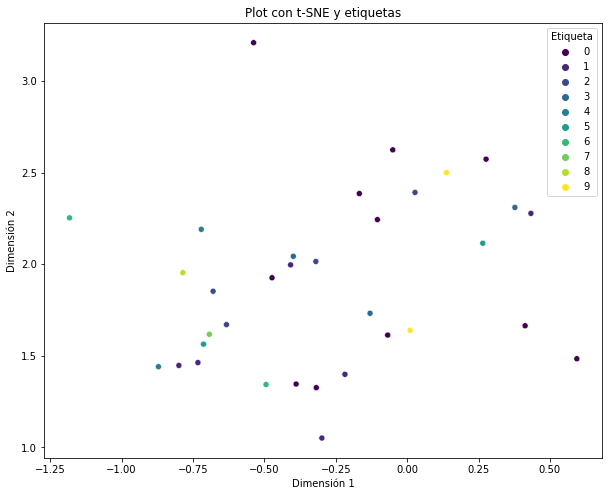

In [76]:
# Plotear con t-SNE y colores según etiquetas
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimensión 1', y='Dimensión 2', hue='Etiqueta', data=df_tsne, palette='viridis', legend='full')
plt.title('Plot con t-SNE y etiquetas')
plt.show()

In [ ]:
# Definir un diccionario de reemplazo
reemplazo = {'no events':0, 'CRLF2--P2RY8':1,'CRLF2_dup':2,'CRLF2--P2RY8/+dup':3,'CRLF2_dup/+mut':4,'CRLF2--P2RY8/+mut':5,
           'other fusions':9,'USP9X--DDX3X':6,'CRLF2_mut':7,'CRLF2--IGH/+mut':8}

In [53]:
from sklearn.manifold import TSNE

tsne= TSNE(n_components = 2, random_state = 42)
dflog2_Final_tsne= tsne.fit_transform(x_c)

In [54]:
df_tsne = pd.DataFrame(dflog2_Final_tsne, columns=['Dimensión 1', 'Dimensión 2'])
df_tsne

Dimensión 1  Dimensión 2
0     -0.319717     2.014639
1      0.027558     2.391554
2     -0.632858     1.670157
3     -0.679681     1.852462
4     -0.721121     2.190253
5     -0.871147     1.440391
6     -0.692897     1.617339
7     -0.785382     1.953564
8     -0.217814     1.398855
9     -0.799497     1.447315
10    -0.298666     1.051185
11    -0.732768     1.462860
12     0.433534     2.277251
13    -0.408283     1.996237
14    -0.129975     1.731929
15    -0.398697     2.043022
16     0.377393     2.309616
17    -0.713165     1.563596
18     0.264871     2.114255
19    -0.318300     1.326253
20    -0.388902     1.345859
21    -0.473293     1.925935
22     0.413180     1.663952
23     0.276460     2.573228
24    -0.167600     2.385377
25    -0.104179     2.243049
26    -0.537796     3.208805
27    -0.068175     1.613163
28    -0.050381     2.623859
29     0.594350     1.484026
30     0.010208     1.638944
31     0.137601     2.499709
32    -1.182365     2.252928
33    -0.494244     1.343322

In [55]:
df_tsne['Etiqueta'] = dflog2_Final['tipo']
df_tsne

Dimensión 1  Dimensión 2           Etiqueta
0     -0.319717     2.014639          CRLF2_dup
1      0.027558     2.391554          CRLF2_dup
2     -0.632858     1.670157          CRLF2_dup
3     -0.679681     1.852462          CRLF2_dup
4     -0.721121     2.190253     CRLF2_dup/+mut
5     -0.871147     1.440391     CRLF2_dup/+mut
6     -0.692897     1.617339          CRLF2_mut
7     -0.785382     1.953564    CRLF2--IGH/+mut
8     -0.217814     1.398855       CRLF2--P2RY8
9     -0.799497     1.447315       CRLF2--P2RY8
10    -0.298666     1.051185       CRLF2--P2RY8
11    -0.732768     1.462860       CRLF2--P2RY8
12     0.433534     2.277251       CRLF2--P2RY8
13    -0.408283     1.996237       CRLF2--P2RY8
14    -0.129975     1.731929  CRLF2--P2RY8/+dup
15    -0.398697     2.043022  CRLF2--P2RY8/+dup
16     0.377393     2.309616  CRLF2--P2RY8/+dup
17    -0.713165     1.563596  CRLF2--P2RY8/+mut
18     0.264871     2.114255  CRLF2--P2RY8/+mut
19    -0.318300     1.326253          no events
20    -0.388902     1.345859          no events
21    -0.473293     1.925935          no events
22     0.413180     1.663952          no events
23     0.276460     2.573228          no events
24    -0.167600     2.385377          no events
25    -0.104179     2.243049          no events
26    -0.537796     3.208805          no events
27    -0.068175     1.613163          no events
28    -0.050381     2.623859          no events
29     0.594350     1.484026          no events
30     0.010208     1.638944      other fusions
31     0.137601     2.499709      other fusions
32    -1.182365     2.252928       USP9X--DDX3X
33    -0.494244     1.343322       USP9X--DDX3X

**Reemplazo de los grupos**

In [56]:
# Reemplaza other fusions y no events por 'NotEvents'
df_tsne['Etiqueta'] = df_tsne['Etiqueta'].replace({'other fusions': 'NotEvents', 'no events': 'NotEvents'})
df_tsne

Dimensión 1  Dimensión 2           Etiqueta
0     -0.319717     2.014639          CRLF2_dup
1      0.027558     2.391554          CRLF2_dup
2     -0.632858     1.670157          CRLF2_dup
3     -0.679681     1.852462          CRLF2_dup
4     -0.721121     2.190253     CRLF2_dup/+mut
5     -0.871147     1.440391     CRLF2_dup/+mut
6     -0.692897     1.617339          CRLF2_mut
7     -0.785382     1.953564    CRLF2--IGH/+mut
8     -0.217814     1.398855       CRLF2--P2RY8
9     -0.799497     1.447315       CRLF2--P2RY8
10    -0.298666     1.051185       CRLF2--P2RY8
11    -0.732768     1.462860       CRLF2--P2RY8
12     0.433534     2.277251       CRLF2--P2RY8
13    -0.408283     1.996237       CRLF2--P2RY8
14    -0.129975     1.731929  CRLF2--P2RY8/+dup
15    -0.398697     2.043022  CRLF2--P2RY8/+dup
16     0.377393     2.309616  CRLF2--P2RY8/+dup
17    -0.713165     1.563596  CRLF2--P2RY8/+mut
18     0.264871     2.114255  CRLF2--P2RY8/+mut
19    -0.318300     1.326253          NotEvents
20    -0.388902     1.345859          NotEvents
21    -0.473293     1.925935          NotEvents
22     0.413180     1.663952          NotEvents
23     0.276460     2.573228          NotEvents
24    -0.167600     2.385377          NotEvents
25    -0.104179     2.243049          NotEvents
26    -0.537796     3.208805          NotEvents
27    -0.068175     1.613163          NotEvents
28    -0.050381     2.623859          NotEvents
29     0.594350     1.484026          NotEvents
30     0.010208     1.638944          NotEvents
31     0.137601     2.499709          NotEvents
32    -1.182365     2.252928       USP9X--DDX3X
33    -0.494244     1.343322       USP9X--DDX3X

In [57]:
# Reemplaza CRLF2--IGH y CRLF2--P2RY8 por 'Fusion'
df_tsne['Etiqueta'] = df_tsne['Etiqueta'].replace({'CRLF2--IGH': 'Fusion', 'CRLF2--P2RY8': 'Fusion'})
df_tsne

Dimensión 1  Dimensión 2           Etiqueta
0     -0.319717     2.014639          CRLF2_dup
1      0.027558     2.391554          CRLF2_dup
2     -0.632858     1.670157          CRLF2_dup
3     -0.679681     1.852462          CRLF2_dup
4     -0.721121     2.190253     CRLF2_dup/+mut
5     -0.871147     1.440391     CRLF2_dup/+mut
6     -0.692897     1.617339          CRLF2_mut
7     -0.785382     1.953564    CRLF2--IGH/+mut
8     -0.217814     1.398855             Fusion
9     -0.799497     1.447315             Fusion
10    -0.298666     1.051185             Fusion
11    -0.732768     1.462860             Fusion
12     0.433534     2.277251             Fusion
13    -0.408283     1.996237             Fusion
14    -0.129975     1.731929  CRLF2--P2RY8/+dup
15    -0.398697     2.043022  CRLF2--P2RY8/+dup
16     0.377393     2.309616  CRLF2--P2RY8/+dup
17    -0.713165     1.563596  CRLF2--P2RY8/+mut
18     0.264871     2.114255  CRLF2--P2RY8/+mut
19    -0.318300     1.326253          NotEvents
20    -0.388902     1.345859          NotEvents
21    -0.473293     1.925935          NotEvents
22     0.413180     1.663952          NotEvents
23     0.276460     2.573228          NotEvents
24    -0.167600     2.385377          NotEvents
25    -0.104179     2.243049          NotEvents
26    -0.537796     3.208805          NotEvents
27    -0.068175     1.613163          NotEvents
28    -0.050381     2.623859          NotEvents
29     0.594350     1.484026          NotEvents
30     0.010208     1.638944          NotEvents
31     0.137601     2.499709          NotEvents
32    -1.182365     2.252928       USP9X--DDX3X
33    -0.494244     1.343322       USP9X--DDX3X

In [58]:
# Reemplaza CRLF2--IGH/+mut y CRLF2--P2RY8/+dup por 'Fusion'
df_tsne['Etiqueta'] = df_tsne['Etiqueta'].replace({'CRLF2--IGH/+mut': 'Fusion', 'CRLF2--P2RY8/+dup': 'Fusion'})
df_tsne

Dimensión 1  Dimensión 2           Etiqueta
0     -0.319717     2.014639          CRLF2_dup
1      0.027558     2.391554          CRLF2_dup
2     -0.632858     1.670157          CRLF2_dup
3     -0.679681     1.852462          CRLF2_dup
4     -0.721121     2.190253     CRLF2_dup/+mut
5     -0.871147     1.440391     CRLF2_dup/+mut
6     -0.692897     1.617339          CRLF2_mut
7     -0.785382     1.953564             Fusion
8     -0.217814     1.398855             Fusion
9     -0.799497     1.447315             Fusion
10    -0.298666     1.051185             Fusion
11    -0.732768     1.462860             Fusion
12     0.433534     2.277251             Fusion
13    -0.408283     1.996237             Fusion
14    -0.129975     1.731929             Fusion
15    -0.398697     2.043022             Fusion
16     0.377393     2.309616             Fusion
17    -0.713165     1.563596  CRLF2--P2RY8/+mut
18     0.264871     2.114255  CRLF2--P2RY8/+mut
19    -0.318300     1.326253          NotEvents
20    -0.388902     1.345859          NotEvents
21    -0.473293     1.925935          NotEvents
22     0.413180     1.663952          NotEvents
23     0.276460     2.573228          NotEvents
24    -0.167600     2.385377          NotEvents
25    -0.104179     2.243049          NotEvents
26    -0.537796     3.208805          NotEvents
27    -0.068175     1.613163          NotEvents
28    -0.050381     2.623859          NotEvents
29     0.594350     1.484026          NotEvents
30     0.010208     1.638944          NotEvents
31     0.137601     2.499709          NotEvents
32    -1.182365     2.252928       USP9X--DDX3X
33    -0.494244     1.343322       USP9X--DDX3X

In [59]:
# Reemplaza CRLF2--P2RY8/+mut por 'Fusion'
df_tsne['Etiqueta'] = df_tsne['Etiqueta'].replace({'CRLF2--P2RY8/+mut': 'Fusion'})
df_tsne

Dimensión 1  Dimensión 2        Etiqueta
0     -0.319717     2.014639       CRLF2_dup
1      0.027558     2.391554       CRLF2_dup
2     -0.632858     1.670157       CRLF2_dup
3     -0.679681     1.852462       CRLF2_dup
4     -0.721121     2.190253  CRLF2_dup/+mut
5     -0.871147     1.440391  CRLF2_dup/+mut
6     -0.692897     1.617339       CRLF2_mut
7     -0.785382     1.953564          Fusion
8     -0.217814     1.398855          Fusion
9     -0.799497     1.447315          Fusion
10    -0.298666     1.051185          Fusion
11    -0.732768     1.462860          Fusion
12     0.433534     2.277251          Fusion
13    -0.408283     1.996237          Fusion
14    -0.129975     1.731929          Fusion
15    -0.398697     2.043022          Fusion
16     0.377393     2.309616          Fusion
17    -0.713165     1.563596          Fusion
18     0.264871     2.114255          Fusion
19    -0.318300     1.326253       NotEvents
20    -0.388902     1.345859       NotEvents
21    -0.473293     1.925935       NotEvents
22     0.413180     1.663952       NotEvents
23     0.276460     2.573228       NotEvents
24    -0.167600     2.385377       NotEvents
25    -0.104179     2.243049       NotEvents
26    -0.537796     3.208805       NotEvents
27    -0.068175     1.613163       NotEvents
28    -0.050381     2.623859       NotEvents
29     0.594350     1.484026       NotEvents
30     0.010208     1.638944       NotEvents
31     0.137601     2.499709       NotEvents
32    -1.182365     2.252928    USP9X--DDX3X
33    -0.494244     1.343322    USP9X--DDX3X

In [60]:
# Reemplaza CRLF2_dup y CRLF2_mut por 'DupOMut'
df_tsne['Etiqueta'] = df_tsne['Etiqueta'].replace({'CRLF2_dup': 'DupOMut', 'CRLF2_mut': 'DupOMut'})
df_tsne

Dimensión 1  Dimensión 2        Etiqueta
0     -0.319717     2.014639         DupOMut
1      0.027558     2.391554         DupOMut
2     -0.632858     1.670157         DupOMut
3     -0.679681     1.852462         DupOMut
4     -0.721121     2.190253  CRLF2_dup/+mut
5     -0.871147     1.440391  CRLF2_dup/+mut
6     -0.692897     1.617339         DupOMut
7     -0.785382     1.953564          Fusion
8     -0.217814     1.398855          Fusion
9     -0.799497     1.447315          Fusion
10    -0.298666     1.051185          Fusion
11    -0.732768     1.462860          Fusion
12     0.433534     2.277251          Fusion
13    -0.408283     1.996237          Fusion
14    -0.129975     1.731929          Fusion
15    -0.398697     2.043022          Fusion
16     0.377393     2.309616          Fusion
17    -0.713165     1.563596          Fusion
18     0.264871     2.114255          Fusion
19    -0.318300     1.326253       NotEvents
20    -0.388902     1.345859       NotEvents
21    -0.473293     1.925935       NotEvents
22     0.413180     1.663952       NotEvents
23     0.276460     2.573228       NotEvents
24    -0.167600     2.385377       NotEvents
25    -0.104179     2.243049       NotEvents
26    -0.537796     3.208805       NotEvents
27    -0.068175     1.613163       NotEvents
28    -0.050381     2.623859       NotEvents
29     0.594350     1.484026       NotEvents
30     0.010208     1.638944       NotEvents
31     0.137601     2.499709       NotEvents
32    -1.182365     2.252928    USP9X--DDX3X
33    -0.494244     1.343322    USP9X--DDX3X

In [61]:
# Reemplaza CRLF2_dup/+mut por 'DupOMut'
df_tsne['Etiqueta'] = df_tsne['Etiqueta'].replace({'CRLF2_dup/+mut': 'DupOMut'})
df_tsne

Dimensión 1  Dimensión 2      Etiqueta
0     -0.319717     2.014639       DupOMut
1      0.027558     2.391554       DupOMut
2     -0.632858     1.670157       DupOMut
3     -0.679681     1.852462       DupOMut
4     -0.721121     2.190253       DupOMut
5     -0.871147     1.440391       DupOMut
6     -0.692897     1.617339       DupOMut
7     -0.785382     1.953564        Fusion
8     -0.217814     1.398855        Fusion
9     -0.799497     1.447315        Fusion
10    -0.298666     1.051185        Fusion
11    -0.732768     1.462860        Fusion
12     0.433534     2.277251        Fusion
13    -0.408283     1.996237        Fusion
14    -0.129975     1.731929        Fusion
15    -0.398697     2.043022        Fusion
16     0.377393     2.309616        Fusion
17    -0.713165     1.563596        Fusion
18     0.264871     2.114255        Fusion
19    -0.318300     1.326253     NotEvents
20    -0.388902     1.345859     NotEvents
21    -0.473293     1.925935     NotEvents
22     0.413180     1.663952     NotEvents
23     0.276460     2.573228     NotEvents
24    -0.167600     2.385377     NotEvents
25    -0.104179     2.243049     NotEvents
26    -0.537796     3.208805     NotEvents
27    -0.068175     1.613163     NotEvents
28    -0.050381     2.623859     NotEvents
29     0.594350     1.484026     NotEvents
30     0.010208     1.638944     NotEvents
31     0.137601     2.499709     NotEvents
32    -1.182365     2.252928  USP9X--DDX3X
33    -0.494244     1.343322  USP9X--DDX3X

In [62]:
# Guardar la columna 'Column1' en un archivo CSV
column_3grupos_Etiquetas = df_tsne['Etiqueta']
column_3grupos_Etiquetas.to_csv('Etiqueta_data.csv', index=False, header=['Etiqueta'])

In [63]:
df_tsne[['Etiqueta']]

Etiqueta
0        DupOMut
1        DupOMut
2        DupOMut
3        DupOMut
4        DupOMut
5        DupOMut
6        DupOMut
7         Fusion
8         Fusion
9         Fusion
10        Fusion
11        Fusion
12        Fusion
13        Fusion
14        Fusion
15        Fusion
16        Fusion
17        Fusion
18        Fusion
19     NotEvents
20     NotEvents
21     NotEvents
22     NotEvents
23     NotEvents
24     NotEvents
25     NotEvents
26     NotEvents
27     NotEvents
28     NotEvents
29     NotEvents
30     NotEvents
31     NotEvents
32  USP9X--DDX3X
33  USP9X--DDX3X

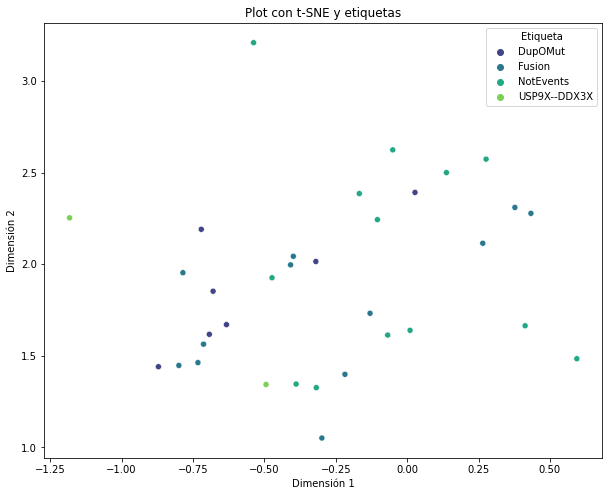

In [64]:
# Plotear con t-SNE y colores según etiquetas
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimensión 1', y='Dimensión 2', hue='Etiqueta', data=df_tsne, palette='viridis', legend='full')
plt.title('Plot con t-SNE y etiquetas')
plt.show()

**Aplicando TSNE**

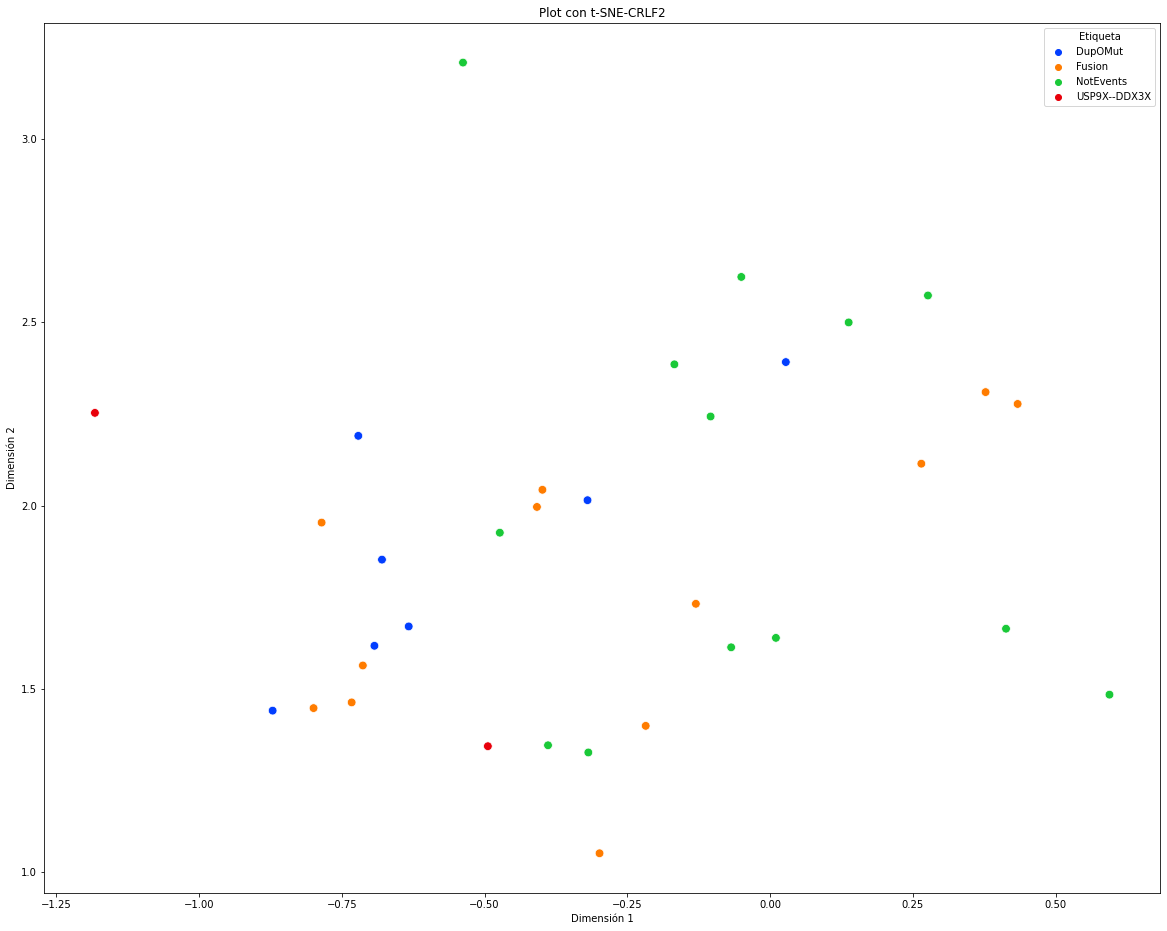

In [65]:
# Ploteando con t-SNE y colores diferenciables según sus etiquetas.
plt.figure(figsize=(20, 16))
sns.scatterplot(x='Dimensión 1', y='Dimensión 2', hue='Etiqueta', data=df_tsne, palette='bright', legend='full', s=75)
plt.title('Plot con t-SNE-CRLF2')
plt.savefig('plot_tsne_CRLF2_3groups.png', dpi=300)
plt.show()

**Aplicando pca**

In [66]:
x

array([[-1.24249241, -2.28052992,  0.99713937, ...,  1.27153326,
         0.76654712,  0.53431088],
       [-1.1208342 , -1.24739115, -1.18817029, ...,  0.35672302,
        -0.71259702, -0.94036598],
       [ 0.74559821,  0.1955323 ,  1.49185249, ...,  1.20217567,
         0.57820315, -0.19239443],
       ...,
       [-0.37413675, -0.53489805,  0.07923532, ..., -0.49206087,
        -0.82003884, -0.94036598],
       [-0.83045516, -0.45746855, -1.18817029, ...,  0.53686019,
        -2.1009613 , -0.94036598],
       [ 1.28068876,  1.02906768, -0.19417463, ..., -1.15177757,
         1.55932655,  0.41124603]])

In [67]:
#Comprobando si los datos normalizados tienen una media de cero (.mean) y una desviación estándar de uno(.std).
np.mean(x),np.std(x)

(1.2996695130797742e-17, 0.9936056182640537)

In [68]:
#Usando pca en dos dimensiones
pca_dflog2_Final = PCA(n_components=2)
principalComponents_dflog2_Final = pca_dflog2_Final.fit_transform(x)

In [69]:
#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
principal_dflog2_Final_DF = pd.DataFrame(data = principalComponents_dflog2_Final
             , columns = ['Componente principal 1', 'Componente principal 2'])

In [70]:
principal_dflog2_Final_DF

Componente principal 1  Componente principal 2
0                 0.751175               -2.054327
1                20.566310               -3.953141
2               -17.018386                0.906457
3               -12.130389                8.132318
4                -2.010272               10.057143
5               -19.931388               -1.097792
6               -20.174362                3.831922
7               -12.233070               12.872513
8               -10.726751              -10.752065
9               -24.929418                0.881167
10              -13.677955                1.573260
11              -24.144397                0.355400
12               23.087061              -10.831831
13               -1.024373                1.425804
14               -1.685011               -7.887807
15               -0.297928                1.507896
16               25.159145              -16.041556
17              -20.470380                0.057293
18               14.326002              -12.870578
19              -13.828368               -1.777485
20              -11.501965               -6.054847
21               -5.562308                1.102043
22               12.345154               -7.942951
23               30.478342               -2.732975
24               13.682081               -1.907655
25               11.371961               -2.560599
26               26.106339               53.457043
27               -2.524990               -9.324875
28               22.940975                3.952118
29               12.553893              -12.422842
30               -0.314545              -12.954191
31               24.618030                1.006938
32               -6.191983               30.538203
33              -17.608230               -8.490003

In [71]:
print('Variación explicada por componente principal: {}'.format(pca_dflog2_Final.explained_variance_ratio_))

Variación explicada por componente principal: [0.19406146 0.1161532 ]


Variacion del (19.4 + 11.6)%

In [72]:
df_tsne

Dimensión 1  Dimensión 2      Etiqueta
0     -0.319717     2.014639       DupOMut
1      0.027558     2.391554       DupOMut
2     -0.632858     1.670157       DupOMut
3     -0.679681     1.852462       DupOMut
4     -0.721121     2.190253       DupOMut
5     -0.871147     1.440391       DupOMut
6     -0.692897     1.617339       DupOMut
7     -0.785382     1.953564        Fusion
8     -0.217814     1.398855        Fusion
9     -0.799497     1.447315        Fusion
10    -0.298666     1.051185        Fusion
11    -0.732768     1.462860        Fusion
12     0.433534     2.277251        Fusion
13    -0.408283     1.996237        Fusion
14    -0.129975     1.731929        Fusion
15    -0.398697     2.043022        Fusion
16     0.377393     2.309616        Fusion
17    -0.713165     1.563596        Fusion
18     0.264871     2.114255        Fusion
19    -0.318300     1.326253     NotEvents
20    -0.388902     1.345859     NotEvents
21    -0.473293     1.925935     NotEvents
22     0.413180     1.663952     NotEvents
23     0.276460     2.573228     NotEvents
24    -0.167600     2.385377     NotEvents
25    -0.104179     2.243049     NotEvents
26    -0.537796     3.208805     NotEvents
27    -0.068175     1.613163     NotEvents
28    -0.050381     2.623859     NotEvents
29     0.594350     1.484026     NotEvents
30     0.010208     1.638944     NotEvents
31     0.137601     2.499709     NotEvents
32    -1.182365     2.252928  USP9X--DDX3X
33    -0.494244     1.343322  USP9X--DDX3X

<Figure size 432x288 with 0 Axes>

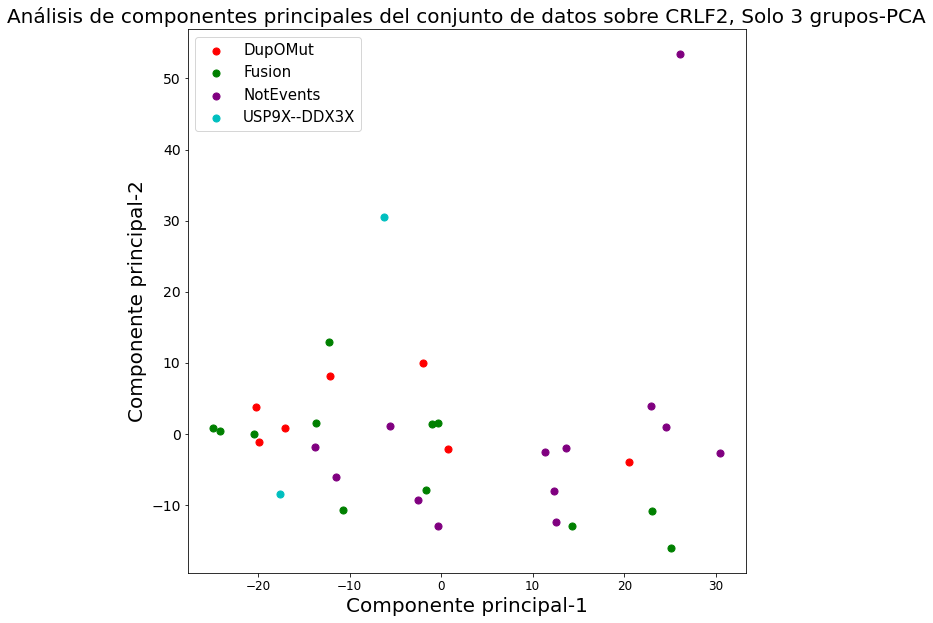

In [73]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal-1',fontsize=20)
plt.ylabel('Componente principal-2',fontsize=20)
plt.title("Análisis de componentes principales del conjunto de datos sobre CRLF2, Solo 3 grupos-PCA",fontsize=20)
targets = ['DupOMut', 'Fusion','NotEvents','USP9X--DDX3X']
colors = ['r', 'g', 'purple','c']
for target, color in zip(targets,colors):
    indicesToKeep = df_tsne['Etiqueta'] == target
    plt.scatter(principal_dflog2_Final_DF.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DF.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.savefig('plot_PCA_CRLF2_3groups.png', dpi=300)
plt.show()

**Usando ISOMAP**

In [139]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

In [145]:
x

array([[-1.24249241, -2.28052992,  0.99713937, ...,  1.27153326,
         0.76654712,  0.53431088],
       [-1.1208342 , -1.24739115, -1.18817029, ...,  0.35672302,
        -0.71259702, -0.94036598],
       [ 0.74559821,  0.1955323 ,  1.49185249, ...,  1.20217567,
         0.57820315, -0.19239443],
       ...,
       [-0.37413675, -0.53489805,  0.07923532, ..., -0.49206087,
        -0.82003884, -0.94036598],
       [-0.83045516, -0.45746855, -1.18817029, ...,  0.53686019,
        -2.1009613 , -0.94036598],
       [ 1.28068876,  1.02906768, -0.19417463, ..., -1.15177757,
         1.55932655,  0.41124603]])

In [76]:
n_components = 2  # Número de componentes para la proyección
n_neighbors = 5   # Número de vecinos para el cálculo de geodésica

isomap = Isomap(n_components=n_components, n_neighbors=n_neighbors)
data_projected = isomap.fit_transform(x)  # Ajusta y transforma los datos

In [77]:
#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
principal_dflog2_Final_DFND_isomap = pd.DataFrame(data = data_projected
            , columns = ['Componente principal 1', 'Componente principal 2'])

In [149]:
principal_dflog2_Final_DFND_isomap['Etiqueta']=df_tsne['Etiqueta']
principal_dflog2_Final_DFND_isomap

Componente principal 1  Componente principal 2      Etiqueta
0                12.927283               17.568267       DupOMut
1                42.669567                5.119434       DupOMut
2               -31.723555                4.662488       DupOMut
3               -23.326452               22.581711       DupOMut
4                -0.501410               36.463270       DupOMut
5               -28.255962               12.020963       DupOMut
6               -35.410323                3.280915       DupOMut
7               -13.646582               32.483028        Fusion
8               -27.705103              -31.903491        Fusion
9               -46.370682               12.633979        Fusion
10              -42.860355              -26.025339        Fusion
11              -37.888187                7.971765        Fusion
12               52.091762              -32.344749        Fusion
13                7.655589                1.854150        Fusion
14               -2.861543              -16.626191        Fusion
15                8.530699               13.029136        Fusion
16               44.955013              -20.531300        Fusion
17              -33.646826                8.212185        Fusion
18               33.385376              -29.821197        Fusion
19              -34.513381              -24.434294     NotEvents
20              -29.911382               -5.847535     NotEvents
21               -2.167665               14.258370     NotEvents
22               15.050563              -13.851792     NotEvents
23               43.329439              -13.561774     NotEvents
24               33.673049               -4.601917     NotEvents
25               29.570408                7.094125     NotEvents
26               33.418003               69.613793     NotEvents
27               -4.899098              -29.523837     NotEvents
28               49.297453               22.391006     NotEvents
29                2.702750              -22.043528     NotEvents
30                0.170728              -41.692128     NotEvents
31               46.838546                2.444994     NotEvents
32              -21.127938               34.262577  USP9X--DDX3X
33              -39.449784              -15.137085  USP9X--DDX3X

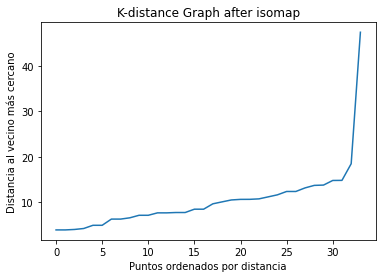

In [150]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
# Calcula la k-distancia gráfica después De isomap
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(data_projected)
distances, indices = neighbors_fit.kneighbors(data_projected)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances)
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia al vecino más cercano')
plt.title('K-distance Graph after isomap')
plt.show()

In [152]:
# Ajusta DBSCAN para diferentes valores de eps
eps_values = np.arange(1, 45, 1)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(data_projected)
    labels = dbscan.labels_
    
    # Muestra los resultados
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f'eps={eps}, Número de clusters={n_clusters}, Número de puntos de ruido={n_noise}')

eps=1, Número de clusters=0, Número de puntos de ruido=34
eps=2, Número de clusters=0, Número de puntos de ruido=34
eps=3, Número de clusters=0, Número de puntos de ruido=34
eps=4, Número de clusters=0, Número de puntos de ruido=34
eps=5, Número de clusters=0, Número de puntos de ruido=34
eps=6, Número de clusters=0, Número de puntos de ruido=34
eps=7, Número de clusters=1, Número de puntos de ruido=29
eps=8, Número de clusters=1, Número de puntos de ruido=29
eps=9, Número de clusters=1, Número de puntos de ruido=29
eps=10, Número de clusters=1, Número de puntos de ruido=28
eps=11, Número de clusters=1, Número de puntos de ruido=27
eps=12, Número de clusters=1, Número de puntos de ruido=26
eps=13, Número de clusters=1, Número de puntos de ruido=26
eps=14, Número de clusters=1, Número de puntos de ruido=26
eps=15, Número de clusters=2, Número de puntos de ruido=20
eps=16, Número de clusters=2, Número de puntos de ruido=20
eps=17, Número de clusters=2, Número de puntos de ruido=20
eps=18

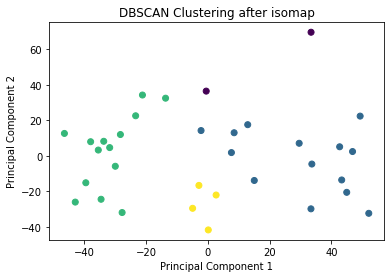

In [153]:
# Aplica DBSCAN después de isomap... min_samples=5 parece ser bueno
dbscan = DBSCAN(eps=20, min_samples=5) 
labels = dbscan.fit_predict(data_projected)

# Visualiza los resultados de DBSCAN
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering after isomap')
plt.show()

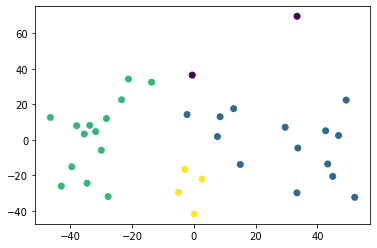

In [154]:
# Aplicar DBSCAN para agrupar los puntos
dbscan = DBSCAN(eps=20, min_samples=5) 
principal_dflog2_Final_DFND_isomap['cluster'] = dbscan.fit_predict(principal_dflog2_Final_DFND_isomap[['Componente principal 1', 'Componente principal 2']])
# Crear un gráfico de dispersión
plt.scatter(principal_dflog2_Final_DFND_isomap['Componente principal 1'], principal_dflog2_Final_DFND_isomap['Componente principal 2'], c=principal_dflog2_Final_DFND_isomap['cluster'], cmap='viridis')

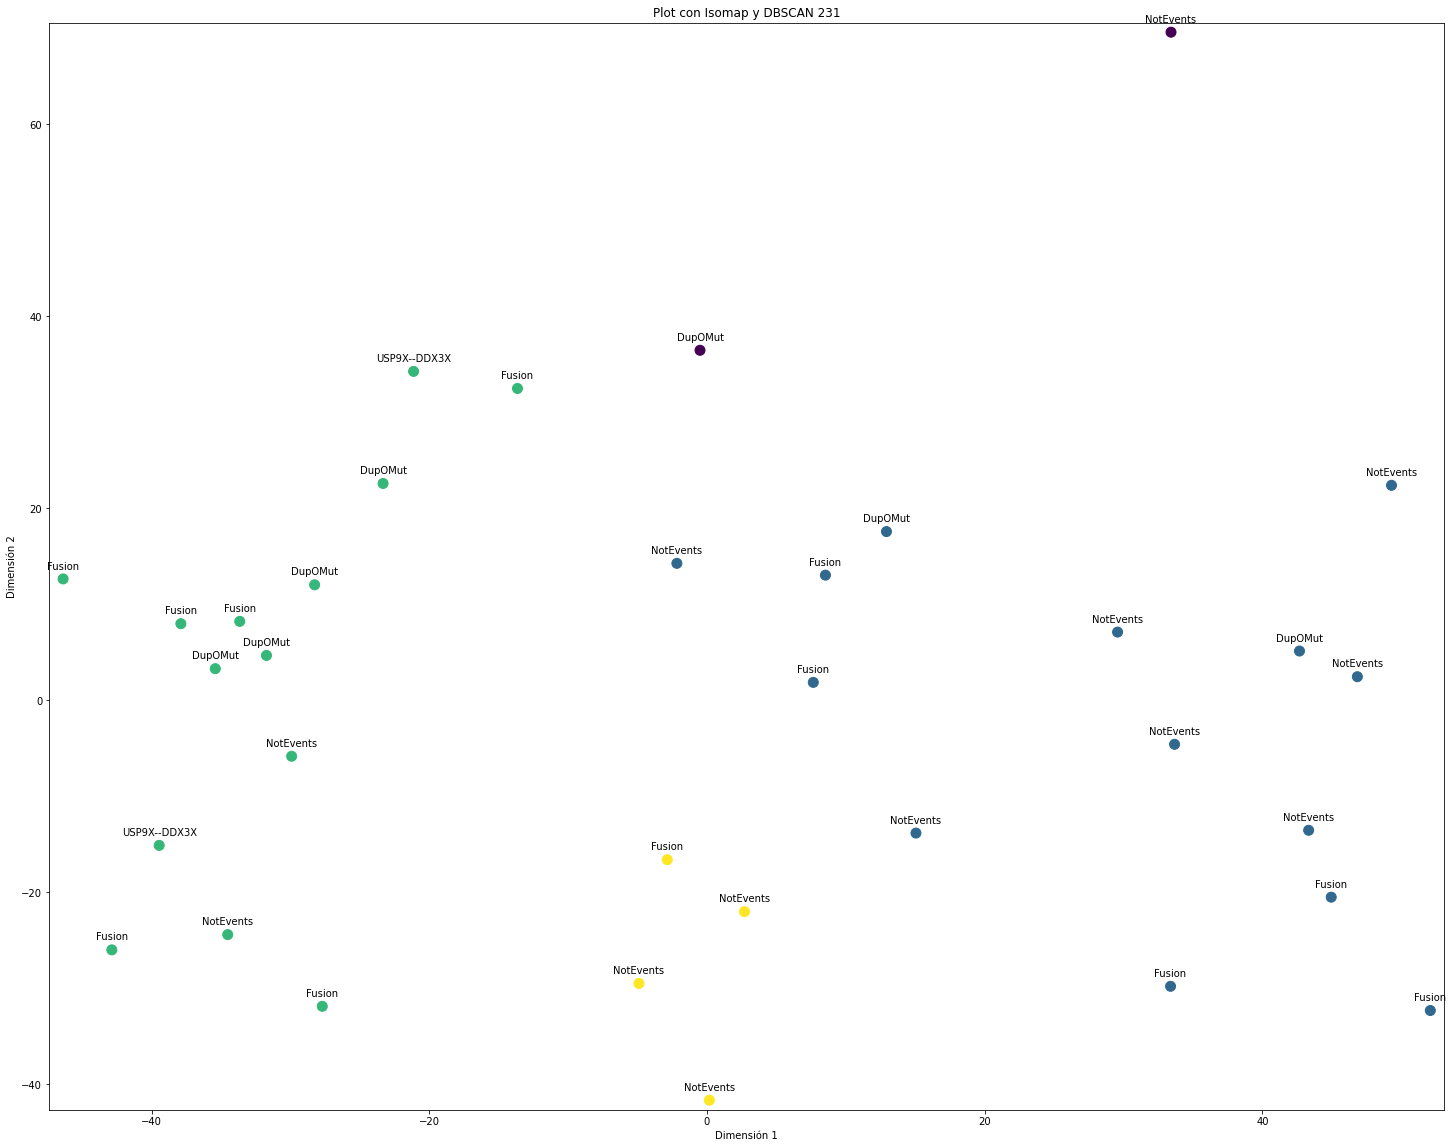

In [155]:
plt.figure(figsize=(25, 20))
# Crear un gráfico de dispersión
plt.scatter(principal_dflog2_Final_DFND_isomap['Componente principal 1'], principal_dflog2_Final_DFND_isomap['Componente principal 2'], c=principal_dflog2_Final_DFND_isomap['cluster'], cmap='viridis',s=100)

# Etiquetar los puntos con los nombres de las etiquetas
for x, y, label in zip(principal_dflog2_Final_DFND_isomap['Componente principal 1'], principal_dflog2_Final_DFND_isomap['Componente principal 2'], principal_dflog2_Final_DFND_isomap['Etiqueta']):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Ajustar los límites del gráfico
plt.xlim(min(principal_dflog2_Final_DFND_isomap['Componente principal 1']) - 1, max(principal_dflog2_Final_DFND_isomap['Componente principal 1']) + 1)
plt.ylim(min(principal_dflog2_Final_DFND_isomap['Componente principal 2']) - 1, max(principal_dflog2_Final_DFND_isomap['Componente principal 2']) + 1)

# Añadir etiquetas a los ejes
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Plot con Isomap y DBSCAN 231')
plt.savefig('plot_Isomap_DBSCAN_231.png', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

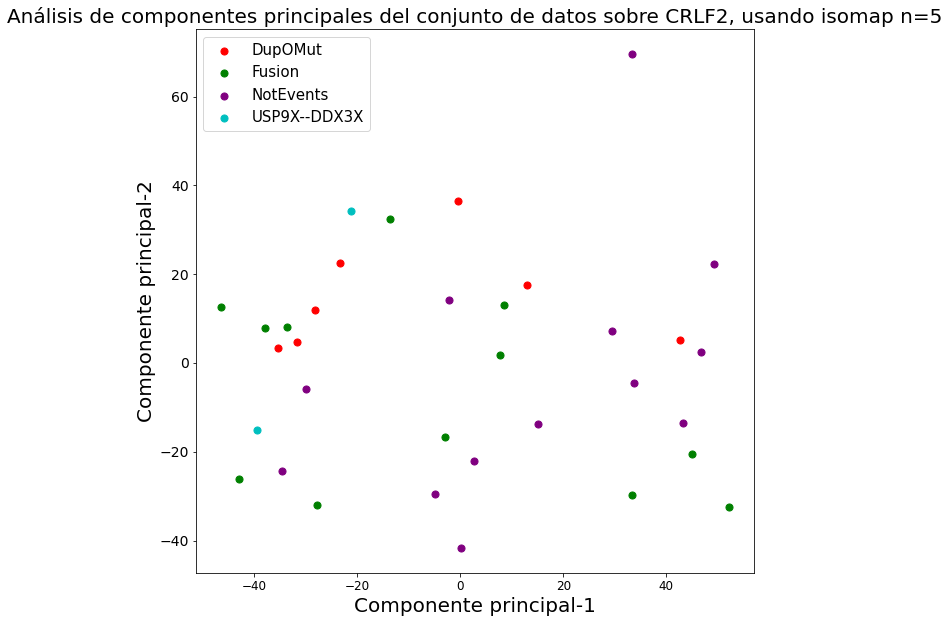

In [147]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal-1',fontsize=20)
plt.ylabel('Componente principal-2',fontsize=20)
plt.title("Análisis de componentes principales del conjunto de datos sobre CRLF2, usando isomap n=5",fontsize=20)
targets = ['DupOMut', 'Fusion','NotEvents','USP9X--DDX3X']
colors = ['r', 'g', 'purple','c']
for target, color in zip(targets,colors):
    indicesToKeep = df_tsne['Etiqueta'] == target
    plt.scatter(principal_dflog2_Final_DFND_isomap.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DFND_isomap.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.savefig('plot_ISOMAP_CRLF2_3groups_1.png', dpi=300)
plt.show()

In [ ]:
principal_dflog2_Final_DFND_isomap["Etiqueta"]=

In [80]:
n_components = 2  # Número de componentes para la proyección
n_neighbors = 10   # Número de vecinos para el cálculo de geodésica, variando parametro. 

isomap = Isomap(n_components=n_components, n_neighbors=n_neighbors)
data_projected = isomap.fit_transform(x)  # Ajusta y transforma los datos

In [81]:
#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
principal_dflog2_Final_DFND_isomap = pd.DataFrame(data = data_projected
            , columns = ['Componente principal 1', 'Componente principal 2'])

In [82]:
principal_dflog2_Final_DFND_isomap

Componente principal 1  Componente principal 2
0                 9.787982              -16.074393
1                41.929235               -2.264974
2               -28.208069              -10.074548
3               -20.285990              -19.562475
4                -3.068688              -31.963659
5               -38.139426              -21.777777
6               -31.495908               -6.600113
7               -13.810485              -31.244278
8               -25.754010               32.547548
9               -51.265116               -9.633916
10              -52.034509               29.517038
11              -38.892936              -17.843625
12               59.878242               48.507521
13                8.578689              -10.003122
14                0.677203               25.104102
15               12.965526              -10.560353
16               60.907220              -14.854539
17              -30.756486              -10.459689
18               35.605991               15.080225
19              -38.490809               34.343592
20              -31.243823               -4.066602
21               -9.636292               -7.692428
22               10.368819               35.724792
23               46.117865               -5.186033
24               31.673206               -3.831684
25               30.146616               -6.899135
26               24.464927              -41.131399
27               -6.165025               26.282411
28               58.493907              -21.985898
29                5.235093               41.638359
30               -0.442631               43.802562
31               47.634571               -3.489111
32              -22.929479              -41.402257
33              -41.845410               16.053854

<Figure size 432x288 with 0 Axes>

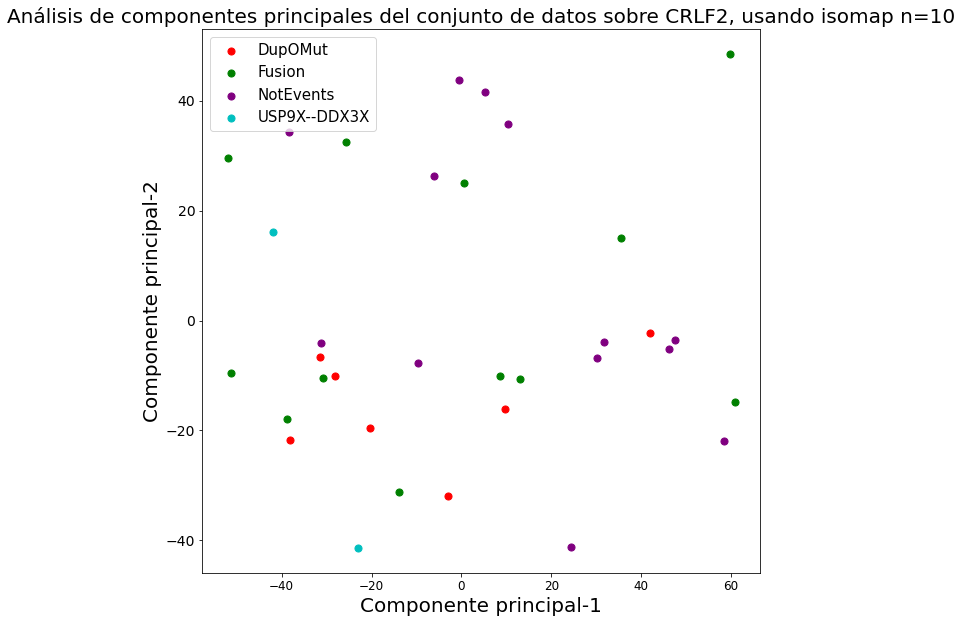

In [83]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal-1',fontsize=20)
plt.ylabel('Componente principal-2',fontsize=20)
plt.title("Análisis de componentes principales del conjunto de datos sobre CRLF2, usando isomap n=10",fontsize=20)
targets = ['DupOMut', 'Fusion','NotEvents','USP9X--DDX3X']
colors = ['r', 'g', 'purple','c']
for target, color in zip(targets,colors):
    indicesToKeep = df_tsne['Etiqueta'] == target
    plt.scatter(principal_dflog2_Final_DFND_isomap.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DFND_isomap.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.savefig('plot_ISOMAP_CRLF2_3groups_n10.png', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

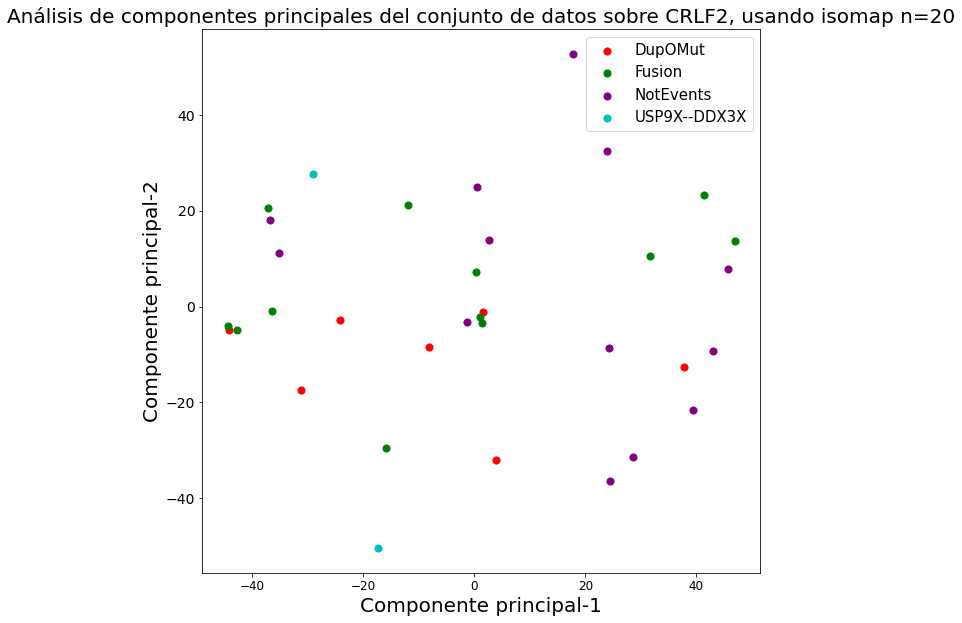

In [84]:
n_components = 2  # Número de componentes para la proyección
n_neighbors = 20   # Número de vecinos para el cálculo de geodésica, variando parametro. 

isomap = Isomap(n_components=n_components, n_neighbors=n_neighbors)
data_projected = isomap.fit_transform(x)  # Ajusta y transforma los datos
#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
principal_dflog2_Final_DFND_isomap = pd.DataFrame(data = data_projected
            , columns = ['Componente principal 1', 'Componente principal 2'])

import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal-1',fontsize=20)
plt.ylabel('Componente principal-2',fontsize=20)
plt.title("Análisis de componentes principales del conjunto de datos sobre CRLF2, usando isomap n=20",fontsize=20)
targets = ['DupOMut', 'Fusion','NotEvents','USP9X--DDX3X']
colors = ['r', 'g', 'purple','c']
for target, color in zip(targets,colors):
    indicesToKeep = df_tsne['Etiqueta'] == target
    plt.scatter(principal_dflog2_Final_DFND_isomap.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DFND_isomap.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.savefig('plot_ISOMAP_CRLF2_3groups_n20.png', dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

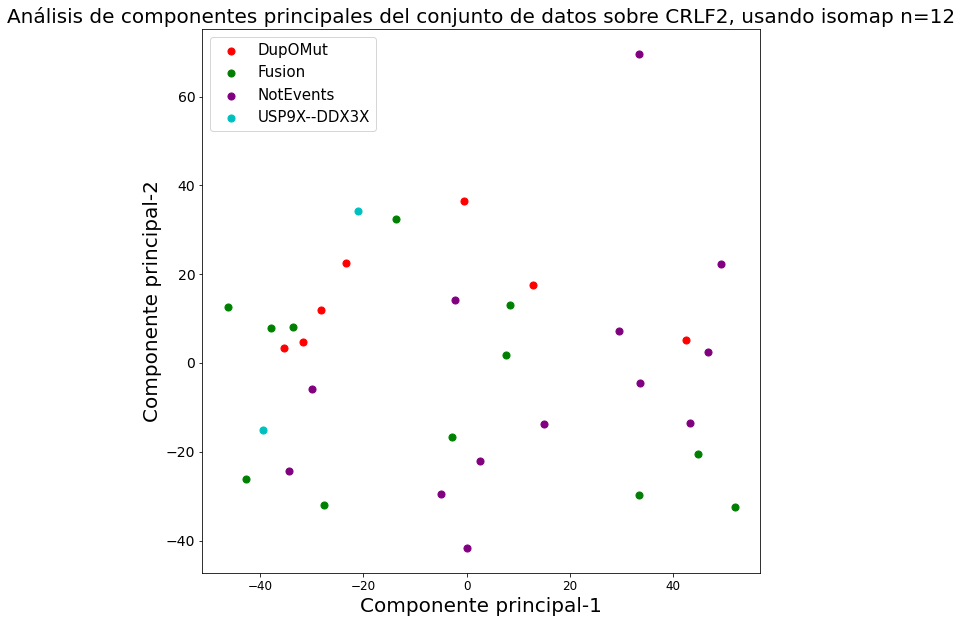

In [85]:
n_components = 2  # Número de componentes para la proyección
n_neighbors = 12  # Número de vecinos para el cálculo de geodésica, variando parametro. 

isomap = Isomap(n_components=n_components, n_neighbors=n_neighbors)
data_projected = isomap.fit_transform(x)  # Ajusta y transforma los datos
#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
principal_dflog2_Final_DFND_isomap = pd.DataFrame(data = data_projected
            , columns = ['Componente principal 1', 'Componente principal 2'])

import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal-1',fontsize=20)
plt.ylabel('Componente principal-2',fontsize=20)
plt.title("Análisis de componentes principales del conjunto de datos sobre CRLF2, usando isomap n=12",fontsize=20)
targets = ['DupOMut', 'Fusion','NotEvents','USP9X--DDX3X']
colors = ['r', 'g', 'purple','c']
for target, color in zip(targets,colors):
    indicesToKeep = df_tsne['Etiqueta'] == target
    plt.scatter(principal_dflog2_Final_DFND_isomap.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DFND_isomap.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.savefig('plot_ISOMAP_CRLF2_3groups_n12.png', dpi=300)
plt.show()

**Usando DBSCAN con PCA** 

In [86]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [87]:
#traemos pca
principal_dflog2_Final_DF

Componente principal 1  Componente principal 2
0                 0.751175               -2.054327
1                20.566310               -3.953141
2               -17.018386                0.906457
3               -12.130389                8.132318
4                -2.010272               10.057143
5               -19.931388               -1.097792
6               -20.174362                3.831922
7               -12.233070               12.872513
8               -10.726751              -10.752065
9               -24.929418                0.881167
10              -13.677955                1.573260
11              -24.144397                0.355400
12               23.087061              -10.831831
13               -1.024373                1.425804
14               -1.685011               -7.887807
15               -0.297928                1.507896
16               25.159145              -16.041556
17              -20.470380                0.057293
18               14.326002              -12.870578
19              -13.828368               -1.777485
20              -11.501965               -6.054847
21               -5.562308                1.102043
22               12.345154               -7.942951
23               30.478342               -2.732975
24               13.682081               -1.907655
25               11.371961               -2.560599
26               26.106339               53.457043
27               -2.524990               -9.324875
28               22.940975                3.952118
29               12.553893              -12.422842
30               -0.314545              -12.954191
31               24.618030                1.006938
32               -6.191983               30.538203
33              -17.608230               -8.490003

<Figure size 432x288 with 0 Axes>

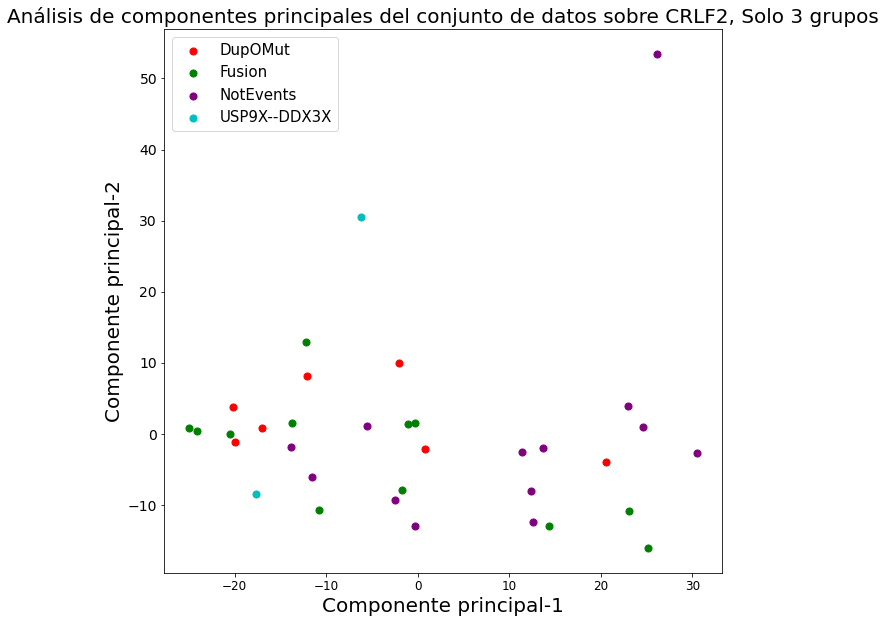

In [88]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal-1',fontsize=20)
plt.ylabel('Componente principal-2',fontsize=20)
plt.title("Análisis de componentes principales del conjunto de datos sobre CRLF2, Solo 3 grupos",fontsize=20)
targets = ['DupOMut', 'Fusion','NotEvents','USP9X--DDX3X']
colors = ['r', 'g', 'purple','c']
for target, color in zip(targets,colors):
    indicesToKeep = df_tsne['Etiqueta'] == target
    plt.scatter(principal_dflog2_Final_DF.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DF.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.savefig('plot_PCA_CRLF2_3groups.png', dpi=300)
plt.show()

In [89]:
#guardamos copia de "principal_dflog2_Final_DF" pca en otra variable
principal_dflog2_Final_DF_copy = principal_dflog2_Final_DF.copy()
principal_dflog2_Final_DF_copy 

Componente principal 1  Componente principal 2
0                 0.751175               -2.054327
1                20.566310               -3.953141
2               -17.018386                0.906457
3               -12.130389                8.132318
4                -2.010272               10.057143
5               -19.931388               -1.097792
6               -20.174362                3.831922
7               -12.233070               12.872513
8               -10.726751              -10.752065
9               -24.929418                0.881167
10              -13.677955                1.573260
11              -24.144397                0.355400
12               23.087061              -10.831831
13               -1.024373                1.425804
14               -1.685011               -7.887807
15               -0.297928                1.507896
16               25.159145              -16.041556
17              -20.470380                0.057293
18               14.326002              -12.870578
19              -13.828368               -1.777485
20              -11.501965               -6.054847
21               -5.562308                1.102043
22               12.345154               -7.942951
23               30.478342               -2.732975
24               13.682081               -1.907655
25               11.371961               -2.560599
26               26.106339               53.457043
27               -2.524990               -9.324875
28               22.940975                3.952118
29               12.553893              -12.422842
30               -0.314545              -12.954191
31               24.618030                1.006938
32               -6.191983               30.538203
33              -17.608230               -8.490003

El algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es sensible al parámetro eps, que representa la distancia máxima entre dos puntos para que uno sea considerado vecino del otro. Encontrar el mejor valor para eps puede ser crucial para obtener resultados significativos.

Una forma común de encontrar el mejor valor para eps es utilizando la técnica de "k-distancia gráfica". 

In [90]:
#Usando pca en dos dimensiones
#pca_dflog2_Final = PCA(n_components=2)
#principalComponents_dflog2_Final = pca_dflog2_Final.fit_transform(x)

#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
#principal_dflog2_Final_DF = pd.DataFrame(data = principalComponents_dflog2_Final
#             , columns = ['Componente principal 1', 'Componente principal 2'])

In [91]:
principalComponents_dflog2_Final#esto es parte del paso que se aplico al hacecer pca

array([[  0.75117523,  -2.0543274 ],
       [ 20.56630987,  -3.95314061],
       [-17.01838589,   0.90645723],
       [-12.13038881,   8.13231776],
       [ -2.01027216,  10.05714314],
       [-19.93138809,  -1.09779164],
       [-20.17436173,   3.83192161],
       [-12.23306959,  12.87251335],
       [-10.7267508 , -10.75206495],
       [-24.92941803,   0.88116725],
       [-13.67795526,   1.5732604 ],
       [-24.14439703,   0.3554001 ],
       [ 23.08706133, -10.83183056],
       [ -1.02437282,   1.4258045 ],
       [ -1.68501149,  -7.88780687],
       [ -0.29792787,   1.5078963 ],
       [ 25.159145  , -16.04155638],
       [-20.4703802 ,   0.05729282],
       [ 14.32600159, -12.87057784],
       [-13.82836812,  -1.77748451],
       [-11.50196465,  -6.05484731],
       [ -5.56230766,   1.10204337],
       [ 12.34515399,  -7.94295102],
       [ 30.47834179,  -2.73297514],
       [ 13.68208091,  -1.90765505],
       [ 11.37196103,  -2.56059895],
       [ 26.10633866,  53.45704292],
 

In [95]:
#X_pca = pca.fit_transform(X)
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

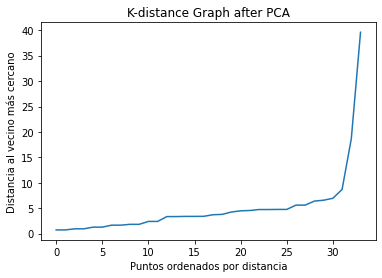

In [96]:
# Calcula la k-distancia gráfica después de PCA
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(principalComponents_dflog2_Final)
distances, indices = neighbors_fit.kneighbors(principalComponents_dflog2_Final)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances)
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia al vecino más cercano')
plt.title('K-distance Graph after PCA')
plt.show()

Calcular valor exacto de la variable "eps", se sabe por la grafica ant que puede estar entre 30 y 35

In [97]:
# Ajusta DBSCAN para diferentes valores de eps
eps_values = np.arange(1, 35, 1)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(principalComponents_dflog2_Final)
    labels = dbscan.labels_
    
    # Muestra los resultados
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f'eps={eps}, Número de clusters={n_clusters}, Número de puntos de ruido={n_noise}')

eps=1, Número de clusters=0, Número de puntos de ruido=34
eps=2, Número de clusters=0, Número de puntos de ruido=34
eps=3, Número de clusters=0, Número de puntos de ruido=34
eps=4, Número de clusters=1, Número de puntos de ruido=29
eps=5, Número de clusters=1, Número de puntos de ruido=26
eps=6, Número de clusters=1, Número de puntos de ruido=26
eps=7, Número de clusters=2, Número de puntos de ruido=19
eps=8, Número de clusters=3, Número de puntos de ruido=11
eps=9, Número de clusters=3, Número de puntos de ruido=5
eps=10, Número de clusters=2, Número de puntos de ruido=3
eps=11, Número de clusters=1, Número de puntos de ruido=2
eps=12, Número de clusters=1, Número de puntos de ruido=2
eps=13, Número de clusters=1, Número de puntos de ruido=2
eps=14, Número de clusters=1, Número de puntos de ruido=2
eps=15, Número de clusters=1, Número de puntos de ruido=2
eps=16, Número de clusters=1, Número de puntos de ruido=2
eps=17, Número de clusters=1, Número de puntos de ruido=2
eps=18, Número 

De lo anterior tomamos el valor eps=9, ya que es el mejor valor.

In [98]:
principalComponents_dflog2_Final

array([[  0.75117523,  -2.0543274 ],
       [ 20.56630987,  -3.95314061],
       [-17.01838589,   0.90645723],
       [-12.13038881,   8.13231776],
       [ -2.01027216,  10.05714314],
       [-19.93138809,  -1.09779164],
       [-20.17436173,   3.83192161],
       [-12.23306959,  12.87251335],
       [-10.7267508 , -10.75206495],
       [-24.92941803,   0.88116725],
       [-13.67795526,   1.5732604 ],
       [-24.14439703,   0.3554001 ],
       [ 23.08706133, -10.83183056],
       [ -1.02437282,   1.4258045 ],
       [ -1.68501149,  -7.88780687],
       [ -0.29792787,   1.5078963 ],
       [ 25.159145  , -16.04155638],
       [-20.4703802 ,   0.05729282],
       [ 14.32600159, -12.87057784],
       [-13.82836812,  -1.77748451],
       [-11.50196465,  -6.05484731],
       [ -5.56230766,   1.10204337],
       [ 12.34515399,  -7.94295102],
       [ 30.47834179,  -2.73297514],
       [ 13.68208091,  -1.90765505],
       [ 11.37196103,  -2.56059895],
       [ 26.10633866,  53.45704292],
 

In [99]:
#X_pca = pca.fit_transform(X)
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs
# Configura los parámetros a ajustar
param_grid = {
    'min_samples': range(1, 10)
}

# Crea el modelo DBSCAN
dbscan = DBSCAN()

# Utiliza GridSearchCV para buscar el mejor valor de min_samples
grid_search = GridSearchCV(dbscan, param_grid, scoring='adjusted_rand_score', cv=5)
grid_search.fit(principalComponents_dflog2_Final)

# Obtiene el mejor valor de min_samples
best_min_samples = grid_search.best_params_['min_samples']

print(f"Best min_samples: {best_min_samples}")

Best min_samples: 1


C:\Users\Jesus Eduardo\.julia\conda\3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Jesus Eduardo\.julia\conda\3\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Jesus Eduardo\.julia\conda\3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Jesus Eduardo\.julia\conda\3\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  w

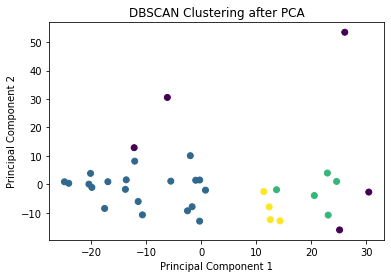

In [100]:
# Aplica DBSCAN después de PCA... min_samples=5 parece ser bueno
dbscan = DBSCAN(eps=9, min_samples=5) 
labels = dbscan.fit_predict(principalComponents_dflog2_Final)

# Visualiza los resultados de DBSCAN
plt.scatter(principalComponents_dflog2_Final[:, 0], principalComponents_dflog2_Final[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering after PCA')
plt.show()

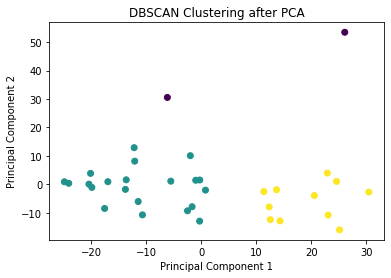

In [101]:
# Aplica DBSCAN después de PCA... min_samples=5 parece ser bueno
dbscan = DBSCAN(eps=9, min_samples=4) 
labels = dbscan.fit_predict(principalComponents_dflog2_Final)

# Visualiza los resultados de DBSCAN
plt.scatter(principalComponents_dflog2_Final[:, 0], principalComponents_dflog2_Final[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering after PCA')
plt.show()

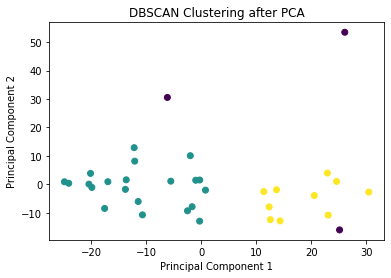

In [102]:
# Aplica DBSCAN después de PCA... min_samples=5 parece ser bueno. Eps=10
dbscan = DBSCAN(eps=10, min_samples=5) 
labels = dbscan.fit_predict(principalComponents_dflog2_Final)

# Visualiza los resultados de DBSCAN
plt.scatter(principalComponents_dflog2_Final[:, 0], principalComponents_dflog2_Final[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering after PCA')
plt.show()

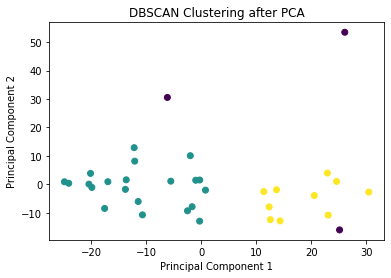

In [103]:
# Aplica DBSCAN después de PCA... min_samples=5 parece ser bueno. Eps=10
dbscan = DBSCAN(eps=10, min_samples=5) 
labels = dbscan.fit_predict(principalComponents_dflog2_Final)

# Visualiza los resultados de DBSCAN
plt.scatter(principalComponents_dflog2_Final[:, 0], principalComponents_dflog2_Final[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering after PCA')
plt.show()

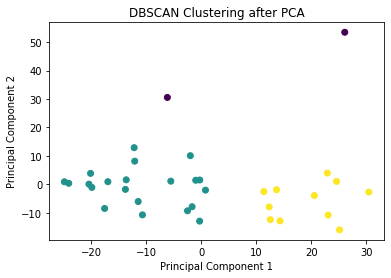

In [104]:
# Aplica DBSCAN después de PCA... min_samples=5 parece ser bueno. Eps=10
dbscan = DBSCAN(eps=10, min_samples=4) 
labels = dbscan.fit_predict(principalComponents_dflog2_Final)

# Visualiza los resultados de DBSCAN
plt.scatter(principalComponents_dflog2_Final[:, 0], principalComponents_dflog2_Final[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering after PCA')
plt.show()

<Figure size 432x288 with 0 Axes>

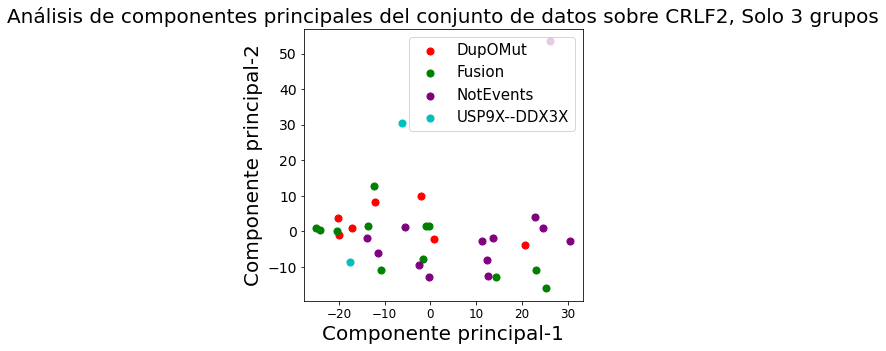

In [153]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(5,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal-1',fontsize=20)
plt.ylabel('Componente principal-2',fontsize=20)
plt.title("Análisis de componentes principales del conjunto de datos sobre CRLF2, Solo 3 grupos",fontsize=20)
targets = ['DupOMut', 'Fusion','NotEvents','USP9X--DDX3X']
colors = ['r', 'g', 'purple','c']
for target, color in zip(targets,colors):
    indicesToKeep = df_tsne['Etiqueta'] == target
    plt.scatter(principal_dflog2_Final_DF.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DF.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.savefig('plot_PCA_CRLF2_3groups.png', dpi=300)
plt.show()

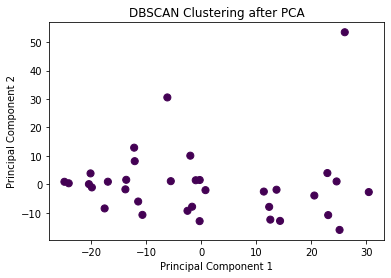

In [173]:
# Visualizar los resultados de DBSCAN en el espacio de PCA
plt.scatter(principal_dflog2_Final_DF['Componente principal 1'], principal_dflog2_Final_DF['Componente principal 2'], c=principal_dflog2_Final_DF['Cluster'], cmap='viridis', marker='o', s=50)
plt.title('DBSCAN Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [163]:
dflog2_Final_T=dflog2_Final.copy()
dflog2_Final_T

Sample               tipo     MTCP1      FLNA     FGF13      ELF4   
0   CA1396          CRLF2_dup  0.865372  4.768020  2.856591  4.904675  \
1   CA1989          CRLF2_dup  0.938796  5.590270  0.000000  4.775942   
2    CA920          CRLF2_dup  2.065230  6.738658  3.503269  4.134901   
3    CA925          CRLF2_dup  0.778751  6.412202  1.893689  4.730330   
4    CA871     CRLF2_dup/+mut  0.731411  5.420694  0.000000  4.295459   
5    CA894     CRLF2_dup/+mut  1.818770  7.189696  1.312171  5.620781   
6    CA918          CRLF2_mut  1.492493  5.788084  3.684068  4.665352   
7   CA1366    CRLF2--IGH/+mut  1.103066  7.077751  1.524017  5.253043   
8   CA1658       CRLF2--P2RY8  2.113983  7.627496  1.727765  5.499988   
9   CA1889       CRLF2--P2RY8  2.168253  5.826955  4.121618  5.190047   
10  CA2054       CRLF2--P2RY8  1.124501  7.733219  3.589868  5.276895   
11  CA2246       CRLF2--P2RY8  2.627816  6.742049  0.811508  5.568177   
12  CA2255       CRLF2--P2RY8  1.808584  6.050434  1.722884  5.093885   
13   CA826       CRLF2--P2RY8  2.030859  6.934154  1.918543  4.503916   
14  CA1529  CRLF2--P2RY8/+dup  1.822028  6.480567  2.106591  5.392031   
15  CA1675  CRLF2--P2RY8/+dup  1.931050  7.146670  0.000000  5.756403   
16  CA2254  CRLF2--P2RY8/+dup  1.449556  5.221296  0.000000  4.844250   
17  CA1218  CRLF2--P2RY8/+mut  1.953154  6.694402  1.300845  5.050766   
18  CA2211  CRLF2--P2RY8/+mut  2.160328  7.033233  0.417716  5.783256   
19  CA1243          no events  2.240548  7.627335  1.114594  4.841680   
20  CA1362          no events  1.848907  5.803178  0.991966  4.887322   
21  CA1664          no events  1.405800  6.743449  0.730929  5.028992   
22  CA1679          no events  1.447629  6.962878  0.000000  4.573451   
23  CA1682          no events  1.086040  6.453420  0.000000  5.369596   
24  CA1851          no events  1.667599  5.698066  0.000000  5.741300   
25  CA2098          no events  0.590675  6.225425  1.812418  4.979220   
26  CA2100          no events  0.000000  6.546870  4.511998  3.954082   
27  CA2220          no events  2.247520  7.471642  3.446897  5.247692   
28  CA2256          no events  2.041327  6.264795  2.460110  5.059965   
29   CA867          no events  2.081663  8.487229  1.698529  4.663486   
30  CA1082      other fusions  2.384942  7.284855  0.592501  5.584924   
31  CA2106      other fusions  1.389444  6.157326  1.656726  4.641994   
32  CA1371       USP9X--DDX3X  1.114046  6.218951  0.000000  4.369098   
33  CA1614       USP9X--DDX3X  2.388169  7.402049  1.299330  5.082838   

      ATP1B4       BTK      ATRX     ZMYM3  ...    ATP8A2    ACVR1B     ITGA5   
0   0.000000  6.593281  6.445244  4.359598  ...  0.000000  2.904406  7.058990  \
1   0.000000  5.869147  5.941914  3.807553  ...  1.298752  2.553663  6.759521   
2   0.000000  7.324846  6.132968  5.242604  ...  0.000000  3.154474  6.631667   
3   0.000000  6.885692  6.307100  5.262084  ...  2.039156  3.321306  6.475539   
4   0.000000  6.694859  6.035852  4.738450  ...  0.000000  2.928106  6.127563   
5   0.000000  7.388649  6.334604  6.376501  ...  1.167429  4.451927  7.125991   
6   0.000000  7.104465  6.618715  5.585067  ...  0.117883  3.732449  6.534479   
7   0.000000  7.090310  5.583681  5.257131  ...  1.574215  3.178458  6.434144   
8   0.000000  7.208719  6.477872  5.377383  ...  0.122293  3.703243  6.884248   
9   0.000000  7.042478  5.637700  5.419623  ...  0.110791  3.734378  7.109242   
10  0.000000  7.189175  6.147207  5.046678  ...  0.497295  3.614980  6.689826   
11  0.000000  7.525812  6.519955  5.143440  ...  0.130712  3.712012  6.977990   
12  0.521382  5.569420  6.888409  4.750344  ...  0.654032  2.978601  7.746763   
13  0.000000  7.050911  6.063581  5.137879  ...  0.356622  3.027870  6.390741   
14  0.000000  6.470573  5.951309  4.524913  ...  0.000000  3.580470  6.984753   
15  0.000000  7.553853  6.628208  4.969042  ...  1.167025  3.122973  6.535733   
16  0.000000  5.696976  6.598382  4.341591  ...  0.149461  2.686057  7.

<Figure size 432x288 with 0 Axes>

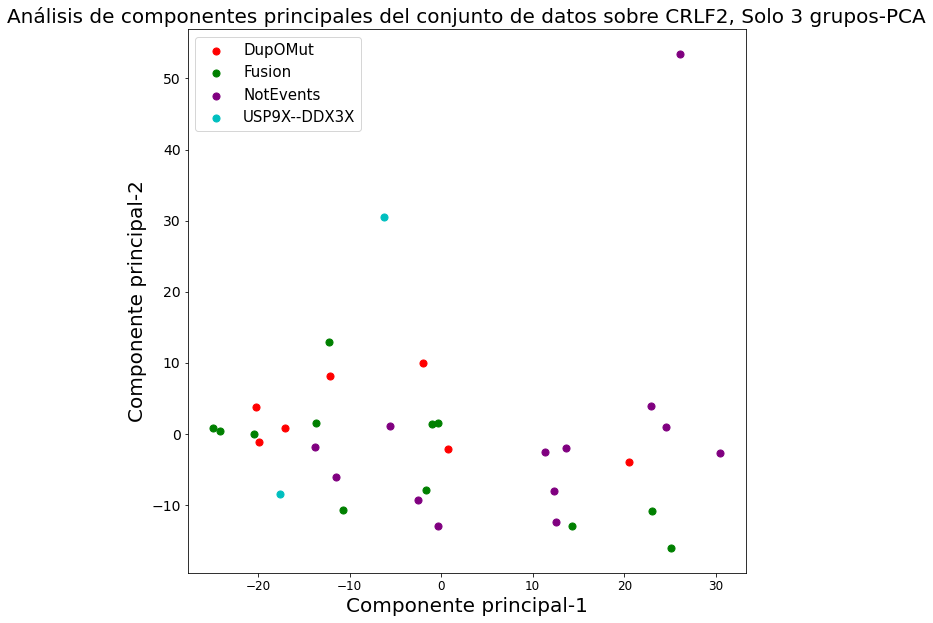

In [226]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal-1',fontsize=20)
plt.ylabel('Componente principal-2',fontsize=20)
plt.title("Análisis de componentes principales del conjunto de datos sobre CRLF2, Solo 3 grupos-PCA",fontsize=20)
targets = ['DupOMut', 'Fusion','NotEvents','USP9X--DDX3X']
colors = ['r', 'g', 'purple','c']
for target, color in zip(targets,colors):
    indicesToKeep = df_tsne['Etiqueta'] == target
    plt.scatter(principal_dflog2_Final_DF.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DF.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.savefig('plot_PCA_CRLF2_3groups.png', dpi=300)
plt.show()

In [227]:
principal_dflog2_Final_DF

Componente principal 1  Componente principal 2
0                 0.751176               -2.054334
1                20.566310               -3.953140
2               -17.018386                0.906452
3               -12.130389                8.132308
4                -2.010272               10.057104
5               -19.931389               -1.097772
6               -20.174361                3.831900
7               -12.233070               12.872509
8               -10.726751              -10.752063
9               -24.929418                0.881262
10              -13.677956                1.573290
11              -24.144397                0.355447
12               23.087061              -10.831764
13               -1.024373                1.425761
14               -1.685011               -7.887821
15               -0.297928                1.507832
16               25.159145              -16.041543
17              -20.470380                0.057317
18               14.326002              -12.870557
19              -13.828368               -1.777499
20              -11.501965               -6.054866
21               -5.562307                1.102011
22               12.345154               -7.942971
23               30.478341               -2.732891
24               13.682081               -1.907681
25               11.371961               -2.560599
26               26.106339               53.457042
27               -2.524990               -9.324884
28               22.940975                3.952060
29               12.553894              -12.422860
30               -0.314544              -12.954274
31               24.618030                1.006985
32               -6.191983               30.538225
33              -17.608230               -8.489987

In [228]:
principal_dflog2_Final_DF_C=principal_dflog2_Final_DF.copy()

In [229]:
# Aplica DBSCAN después de PCA... min_samples=5 parece ser bueno
dbscan = DBSCAN(eps=9, min_samples=5) 
labels = dbscan.fit_predict(principalComponents_dflog2_Final)
# Agregar las etiquetas predichas al DataFrame
principal_dflog2_Final_DF_C['predicted_label'] = labels
principal_dflog2_Final_DF_C

Componente principal 1  Componente principal 2  predicted_label
0                 0.751176               -2.054334                0
1                20.566310               -3.953140                1
2               -17.018386                0.906452                0
3               -12.130389                8.132308                0
4                -2.010272               10.057104                0
5               -19.931389               -1.097772                0
6               -20.174361                3.831900                0
7               -12.233070               12.872509               -1
8               -10.726751              -10.752063                0
9               -24.929418                0.881262                0
10              -13.677956                1.573290                0
11              -24.144397                0.355447                0
12               23.087061              -10.831764                1
13               -1.024373                1.425761                0
14               -1.685011               -7.887821                0
15               -0.297928                1.507832                0
16               25.159145              -16.041543               -1
17              -20.470380                0.057317                0
18               14.326002              -12.870557                2
19              -13.828368               -1.777499                0
20              -11.501965               -6.054866                0
21               -5.562307                1.102011                0
22               12.345154               -7.942971                2
23               30.478341               -2.732891               -1
24               13.682081               -1.907681                1
25               11.371961               -2.560599                2
26               26.106339               53.457042               -1
27               -2.524990               -9.324884                0
28               22.940975                3.952060                1
29               12.553894              -12.422860                2
30               -0.314544              -12.954274                0
31               24.618030                1.006985                1
32               -6.191983               30.538225               -1
33              -17.608230               -8.489987                0

In [230]:
principal_dflog2_Final_DF_C['Etiqueta']=df_tsne_C['Etiqueta']
principal_dflog2_Final_DF_C

Componente principal 1  Componente principal 2  predicted_label   
0                 0.751176               -2.054334                0  \
1                20.566310               -3.953140                1   
2               -17.018386                0.906452                0   
3               -12.130389                8.132308                0   
4                -2.010272               10.057104                0   
5               -19.931389               -1.097772                0   
6               -20.174361                3.831900                0   
7               -12.233070               12.872509               -1   
8               -10.726751              -10.752063                0   
9               -24.929418                0.881262                0   
10              -13.677956                1.573290                0   
11              -24.144397                0.355447                0   
12               23.087061              -10.831764                1   
13               -1.024373                1.425761                0   
14               -1.685011               -7.887821                0   
15               -0.297928                1.507832                0   
16               25.159145              -16.041543               -1   
17              -20.470380                0.057317                0   
18               14.326002              -12.870557                2   
19              -13.828368               -1.777499                0   
20              -11.501965               -6.054866                0   
21               -5.562307                1.102011                0   
22               12.345154               -7.942971                2   
23               30.478341               -2.732891               -1   
24               13.682081               -1.907681                1   
25               11.371961               -2.560599                2   
26               26.106339               53.457042               -1   
27               -2.524990               -9.324884                0   
28               22.940975                3.952060                1   
29               12.553894              -12.422860                2   
30               -0.314544              -12.954274                0   
31               24.618030                1.006985                1   
32               -6.191983               30.538225               -1   
33              -17.608230               -8.489987                0   

        Etiqueta  
0        DupOMut  
1        DupOMut  
2        DupOMut  
3        DupOMut  
4        DupOMut  
5        DupOMut  
6        DupOMut  
7         Fusion  
8         Fusion  
9         Fusion  
10        Fusion  
11        Fusion  
12        Fusion  
13        Fusion  
14        Fusion  
15        Fusion  
16        Fusion  
17        Fusion  
18        Fusion  
19     NotEvents  
20     NotEvents  
21     NotEvents  
22     NotEvents  
23     NotEvents  
24     NotEvents  
25     NotEvents  
26     NotEvents  
27     NotEvents  
28     NotEvents  
29     NotEvents  
30     NotEvents  
31     NotEvents  
32  USP9X--DDX3X  
33  USP9X--DDX3X

In [231]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Codificar las etiquetas de strings a valores numéricos
label_encoder = LabelEncoder()
principal_dflog2_Final_DF_C['label_numeric'] = label_encoder.fit_transform(principal_dflog2_Final_DF_C['Etiqueta'])
principal_dflog2_Final_DF_C

Componente principal 1  Componente principal 2  predicted_label   
0                 0.751176               -2.054334                0  \
1                20.566310               -3.953140                1   
2               -17.018386                0.906452                0   
3               -12.130389                8.132308                0   
4                -2.010272               10.057104                0   
5               -19.931389               -1.097772                0   
6               -20.174361                3.831900                0   
7               -12.233070               12.872509               -1   
8               -10.726751              -10.752063                0   
9               -24.929418                0.881262                0   
10              -13.677956                1.573290                0   
11              -24.144397                0.355447                0   
12               23.087061              -10.831764                1   
13               -1.024373                1.425761                0   
14               -1.685011               -7.887821                0   
15               -0.297928                1.507832                0   
16               25.159145              -16.041543               -1   
17              -20.470380                0.057317                0   
18               14.326002              -12.870557                2   
19              -13.828368               -1.777499                0   
20              -11.501965               -6.054866                0   
21               -5.562307                1.102011                0   
22               12.345154               -7.942971                2   
23               30.478341               -2.732891               -1   
24               13.682081               -1.907681                1   
25               11.371961               -2.560599                2   
26               26.106339               53.457042               -1   
27               -2.524990               -9.324884                0   
28               22.940975                3.952060                1   
29               12.553894              -12.422860                2   
30               -0.314544              -12.954274                0   
31               24.618030                1.006985                1   
32               -6.191983               30.538225               -1   
33              -17.608230               -8.489987                0   

        Etiqueta  label_numeric  
0        DupOMut              0  
1        DupOMut              0  
2        DupOMut              0  
3        DupOMut              0  
4        DupOMut              0  
5        DupOMut              0  
6        DupOMut              0  
7         Fusion              1  
8         Fusion              1  
9         Fusion              1  
10        Fusion              1  
11        Fusion              1  
12        Fusion              1  
13        Fusion              1  
14        Fusion              1  
15        Fusion              1  
16        Fusion              1  
17        Fusion              1  
18        Fusion              1  
19     NotEvents              2  
20     NotEvents              2  
21     NotEvents              2  
22     NotEvents              2  
23     NotEvents              2  
24     NotEvents              2  
25     NotEvents              2  
26     NotEvents              2  
27     NotEvents              2  
28     NotEvents              2  
29     NotEvents              2  
30     NotEvents              2  
31     NotEvents              2  
32  USP9X--DDX3X              3  
33  USP9X--DDX3X              3

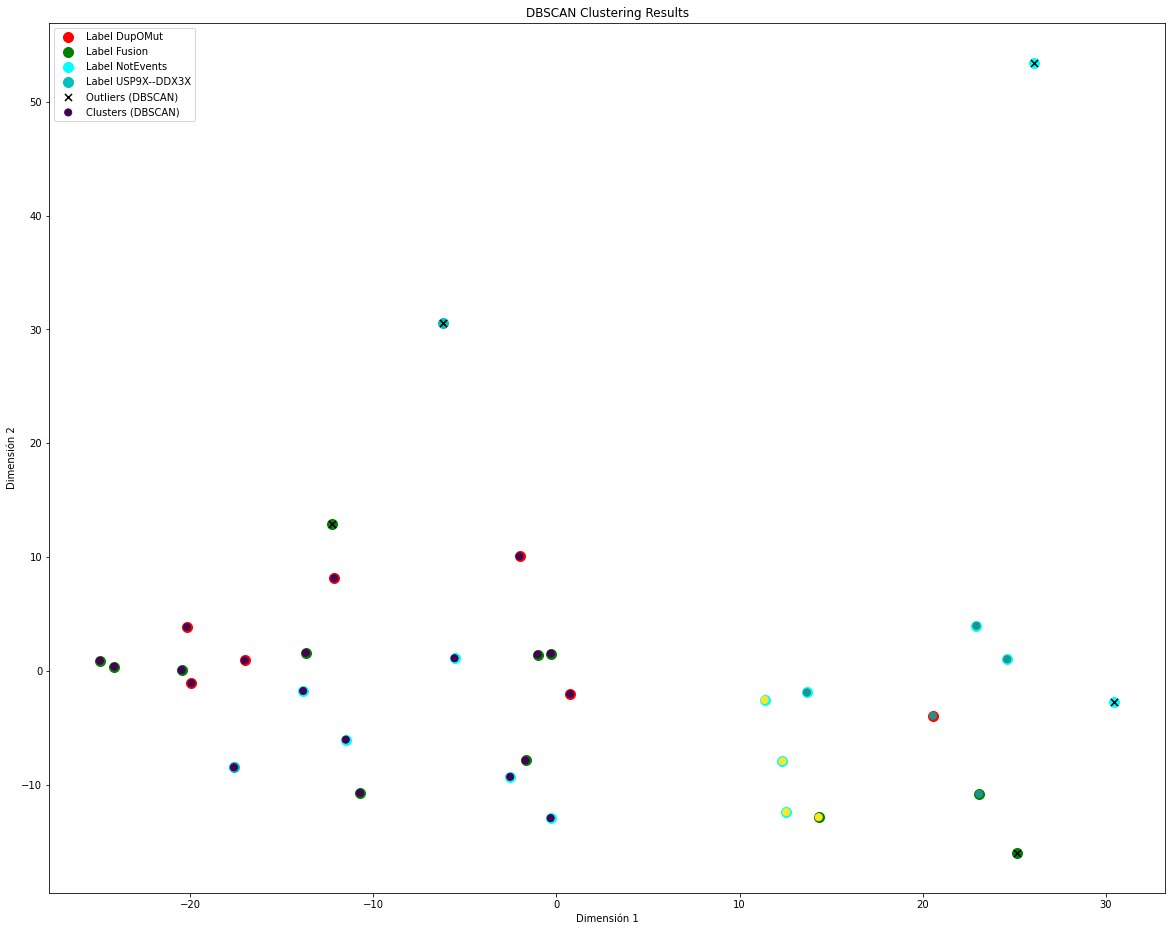

In [243]:
# Visualizar el resultado
plt.figure(figsize=(20, 16))

# Scatter plot para las etiquetas reales
plt.scatter(principal_dflog2_Final_DF_C['Componente principal 1'][principal_dflog2_Final_DF_C['label_numeric'] == 0], principal_dflog2_Final_DF_C['Componente principal 2'][principal_dflog2_Final_DF_C['label_numeric'] == 0], color='r', label='Label DupOMut',s=100)
plt.scatter(principal_dflog2_Final_DF_C['Componente principal 1'][principal_dflog2_Final_DF_C['label_numeric'] == 1], principal_dflog2_Final_DF_C['Componente principal 2'][principal_dflog2_Final_DF_C['label_numeric'] == 1], color='g', label='Label Fusion',s=100)
plt.scatter(principal_dflog2_Final_DF_C['Componente principal 1'][principal_dflog2_Final_DF_C['label_numeric'] == 2], principal_dflog2_Final_DF_C['Componente principal 2'][principal_dflog2_Final_DF_C['label_numeric'] == 2], color='aqua', label='Label NotEvents',s=100)
plt.scatter(principal_dflog2_Final_DF_C['Componente principal 1'][principal_dflog2_Final_DF_C['label_numeric'] == 3], principal_dflog2_Final_DF_C['Componente principal 2'][principal_dflog2_Final_DF_C['label_numeric'] == 3], color='c', label='Label USP9X--DDX3X',s=100)

# Scatter plot para las etiquetas predichas por DBSCAN
plt.scatter(principal_dflog2_Final_DF_C['Componente principal 1'][principal_dflog2_Final_DF_C['predicted_label'] == -1], principal_dflog2_Final_DF_C['Componente principal 2'][principal_dflog2_Final_DF_C['predicted_label'] == -1], color='black' , marker='x', label='Outliers (DBSCAN)',s=50)
plt.scatter(principal_dflog2_Final_DF_C['Componente principal 1'][principal_dflog2_Final_DF_C['predicted_label'] != -1], principal_dflog2_Final_DF_C['Componente principal 2'][principal_dflog2_Final_DF_C['predicted_label'] != -1], c=principal_dflog2_Final_DF_C['predicted_label'][principal_dflog2_Final_DF_C['predicted_label'] != -1], cmap='viridis', label='Clusters (DBSCAN)',s=50)

plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('DBSCAN Clustering Results')
plt.legend()
plt.show()

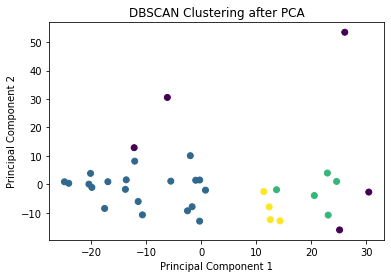

In [105]:
# Aplica DBSCAN después de PCA... min_samples=5 parece ser bueno
dbscan = DBSCAN(eps=9, min_samples=5) 
labels = dbscan.fit_predict(principalComponents_dflog2_Final)

# Visualiza los resultados de DBSCAN
plt.scatter(principalComponents_dflog2_Final[:, 0], principalComponents_dflog2_Final[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering after PCA')
plt.show()

In [106]:
principal_dflog2_Final_DF

Componente principal 1  Componente principal 2
0                 0.751175               -2.054327
1                20.566310               -3.953141
2               -17.018386                0.906457
3               -12.130389                8.132318
4                -2.010272               10.057143
5               -19.931388               -1.097792
6               -20.174362                3.831922
7               -12.233070               12.872513
8               -10.726751              -10.752065
9               -24.929418                0.881167
10              -13.677955                1.573260
11              -24.144397                0.355400
12               23.087061              -10.831831
13               -1.024373                1.425804
14               -1.685011               -7.887807
15               -0.297928                1.507896
16               25.159145              -16.041556
17              -20.470380                0.057293
18               14.326002              -12.870578
19              -13.828368               -1.777485
20              -11.501965               -6.054847
21               -5.562308                1.102043
22               12.345154               -7.942951
23               30.478342               -2.732975
24               13.682081               -1.907655
25               11.371961               -2.560599
26               26.106339               53.457043
27               -2.524990               -9.324875
28               22.940975                3.952118
29               12.553893              -12.422842
30               -0.314545              -12.954191
31               24.618030                1.006938
32               -6.191983               30.538203
33              -17.608230               -8.490003

In [108]:
principal_dflog2_Final_DF['Etiqueta']=df_tsne['Etiqueta']
principal_dflog2_Final_DF

Componente principal 1  Componente principal 2      Etiqueta
0                 0.751175               -2.054327       DupOMut
1                20.566310               -3.953141       DupOMut
2               -17.018386                0.906457       DupOMut
3               -12.130389                8.132318       DupOMut
4                -2.010272               10.057143       DupOMut
5               -19.931388               -1.097792       DupOMut
6               -20.174362                3.831922       DupOMut
7               -12.233070               12.872513        Fusion
8               -10.726751              -10.752065        Fusion
9               -24.929418                0.881167        Fusion
10              -13.677955                1.573260        Fusion
11              -24.144397                0.355400        Fusion
12               23.087061              -10.831831        Fusion
13               -1.024373                1.425804        Fusion
14               -1.685011               -7.887807        Fusion
15               -0.297928                1.507896        Fusion
16               25.159145              -16.041556        Fusion
17              -20.470380                0.057293        Fusion
18               14.326002              -12.870578        Fusion
19              -13.828368               -1.777485     NotEvents
20              -11.501965               -6.054847     NotEvents
21               -5.562308                1.102043     NotEvents
22               12.345154               -7.942951     NotEvents
23               30.478342               -2.732975     NotEvents
24               13.682081               -1.907655     NotEvents
25               11.371961               -2.560599     NotEvents
26               26.106339               53.457043     NotEvents
27               -2.524990               -9.324875     NotEvents
28               22.940975                3.952118     NotEvents
29               12.553893              -12.422842     NotEvents
30               -0.314545              -12.954191     NotEvents
31               24.618030                1.006938     NotEvents
32               -6.191983               30.538203  USP9X--DDX3X
33              -17.608230               -8.490003  USP9X--DDX3X

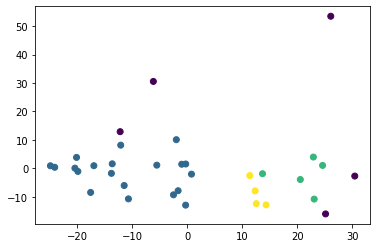

In [109]:
# Aplicar DBSCAN para agrupar los puntos
dbscan = DBSCAN(eps=9, min_samples=5) 
principal_dflog2_Final_DF['cluster'] = dbscan.fit_predict(principal_dflog2_Final_DF[['Componente principal 1', 'Componente principal 2']])
# Crear un gráfico de dispersión
plt.scatter(principal_dflog2_Final_DF['Componente principal 1'], principal_dflog2_Final_DF['Componente principal 2'], c=principal_dflog2_Final_DF['cluster'], cmap='viridis')

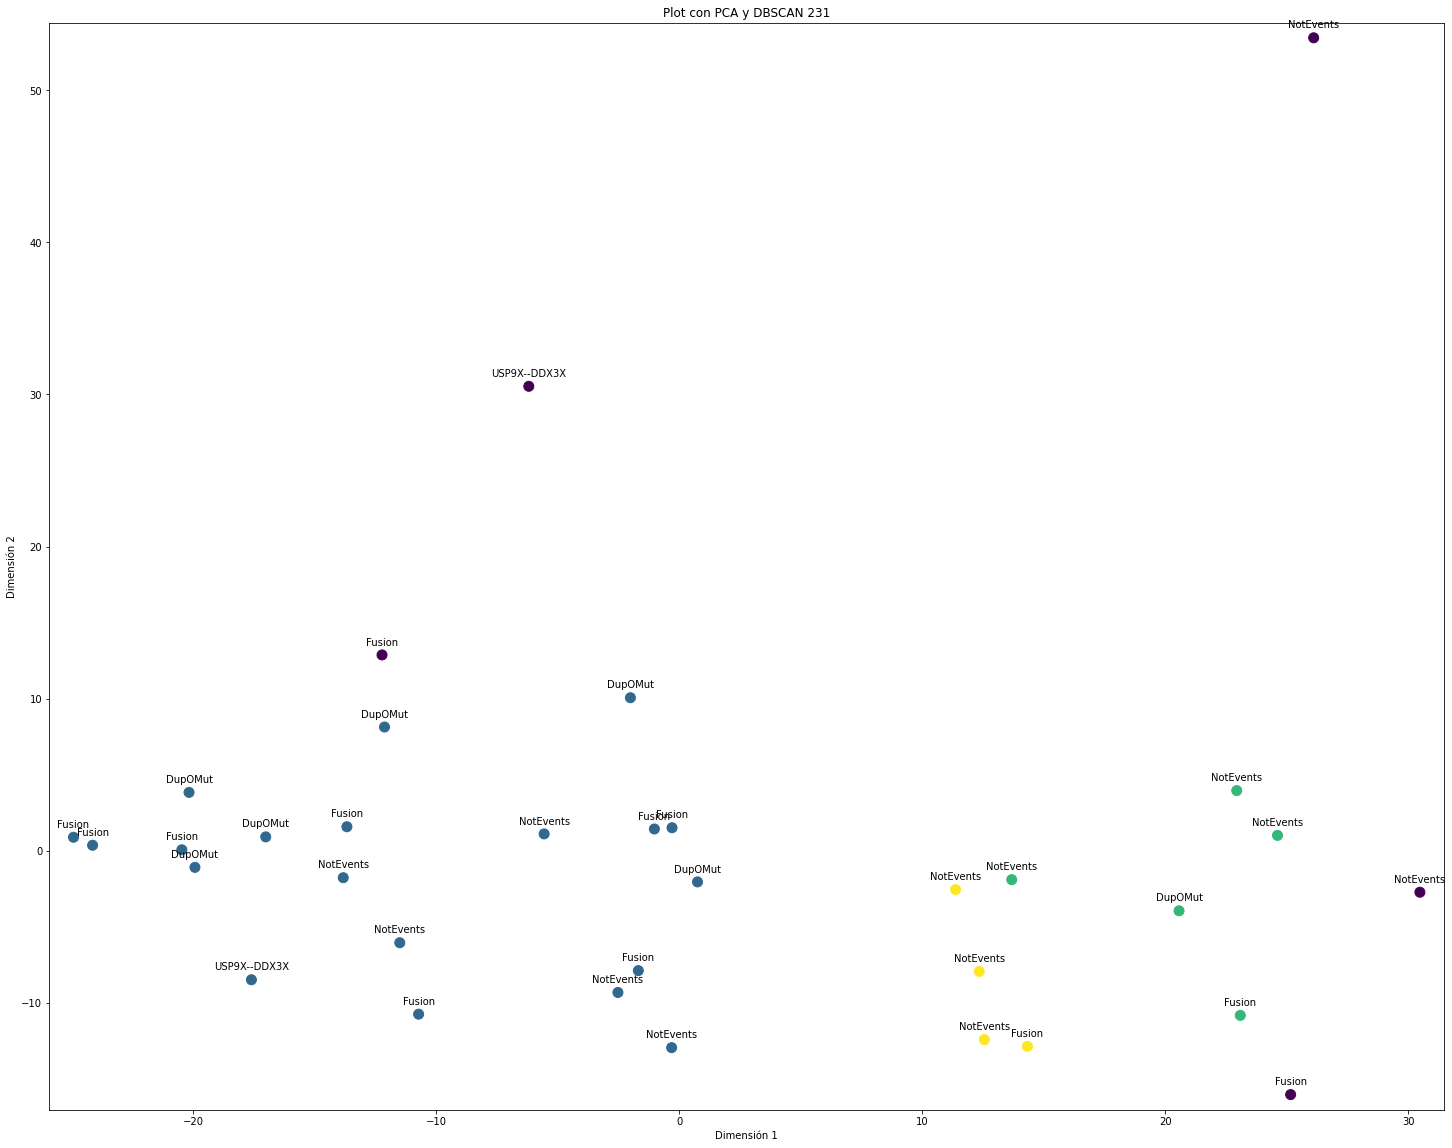

In [112]:
plt.figure(figsize=(25, 20))
# Crear un gráfico de dispersión
plt.scatter(principal_dflog2_Final_DF['Componente principal 1'], principal_dflog2_Final_DF['Componente principal 2'], c=principal_dflog2_Final_DF['cluster'], cmap='viridis',s=100)

# Etiquetar los puntos con los nombres de las etiquetas
for x, y, label in zip(principal_dflog2_Final_DF['Componente principal 1'], principal_dflog2_Final_DF['Componente principal 2'], principal_dflog2_Final_DF['Etiqueta']):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Ajustar los límites del gráfico
plt.xlim(min(principal_dflog2_Final_DF['Componente principal 1']) - 1, max(principal_dflog2_Final_DF['Componente principal 1']) + 1)
plt.ylim(min(principal_dflog2_Final_DF['Componente principal 2']) - 1, max(principal_dflog2_Final_DF['Componente principal 2']) + 1)

# Añadir etiquetas a los ejes
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Plot con PCA y DBSCAN 231')
plt.savefig('plot_PCA_DBSCAN_231.png', dpi=300)
plt.show()

**Aplicar DBSCAN con T-SNE**

In [113]:
#dflog2_Final_tsne= tsne.fit_transform(x_c)
dflog2_Final_tsne

array([[-0.31971708,  2.014639  ],
       [ 0.02755798,  2.3915539 ],
       [-0.6328581 ,  1.6701574 ],
       [-0.6796811 ,  1.8524622 ],
       [-0.7211213 ,  2.190253  ],
       [-0.871147  ,  1.4403911 ],
       [-0.69289654,  1.6173385 ],
       [-0.78538215,  1.953564  ],
       [-0.21781446,  1.3988551 ],
       [-0.7994966 ,  1.4473149 ],
       [-0.29866648,  1.0511855 ],
       [-0.7327685 ,  1.4628601 ],
       [ 0.43353444,  2.2772508 ],
       [-0.40828252,  1.9962372 ],
       [-0.12997489,  1.7319287 ],
       [-0.39869735,  2.0430224 ],
       [ 0.3773934 ,  2.309616  ],
       [-0.7131654 ,  1.5635957 ],
       [ 0.26487097,  2.1142552 ],
       [-0.31829962,  1.3262526 ],
       [-0.38890207,  1.3458588 ],
       [-0.47329342,  1.9259348 ],
       [ 0.41318023,  1.6639525 ],
       [ 0.27645984,  2.573228  ],
       [-0.1676003 ,  2.385377  ],
       [-0.10417869,  2.243049  ],
       [-0.5377961 ,  3.208805  ],
       [-0.0681753 ,  1.613163  ],
       [-0.05038145,

In [114]:
df_tsne = pd.DataFrame(dflog2_Final_tsne, columns=['Dimensión 1', 'Dimensión 2'])
df_tsne

Dimensión 1  Dimensión 2
0     -0.319717     2.014639
1      0.027558     2.391554
2     -0.632858     1.670157
3     -0.679681     1.852462
4     -0.721121     2.190253
5     -0.871147     1.440391
6     -0.692897     1.617339
7     -0.785382     1.953564
8     -0.217814     1.398855
9     -0.799497     1.447315
10    -0.298666     1.051185
11    -0.732768     1.462860
12     0.433534     2.277251
13    -0.408283     1.996237
14    -0.129975     1.731929
15    -0.398697     2.043022
16     0.377393     2.309616
17    -0.713165     1.563596
18     0.264871     2.114255
19    -0.318300     1.326253
20    -0.388902     1.345859
21    -0.473293     1.925935
22     0.413180     1.663952
23     0.276460     2.573228
24    -0.167600     2.385377
25    -0.104179     2.243049
26    -0.537796     3.208805
27    -0.068175     1.613163
28    -0.050381     2.623859
29     0.594350     1.484026
30     0.010208     1.638944
31     0.137601     2.499709
32    -1.182365     2.252928
33    -0.494244     1.343322

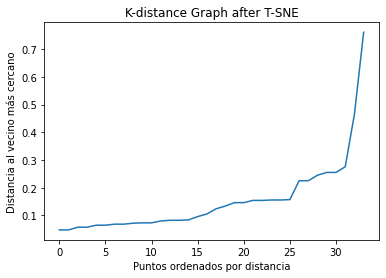

In [115]:
# Calcula la k-distancia gráfica después de tsne
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(dflog2_Final_tsne)
distances, indices = neighbors_fit.kneighbors(dflog2_Final_tsne)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances)
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia al vecino más cercano')
plt.title('K-distance Graph after T-SNE')
plt.show()

In [116]:
# Ajusta DBSCAN para diferentes valores de eps
eps_values = np.arange(0.1, 0.4, 0.025)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(dflog2_Final_tsne)
    labels = dbscan.labels_
    
    # Muestra los resultados
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f'eps={eps}, Número de clusters={n_clusters}, Número de puntos de ruido={n_noise}')

eps=0.1, Número de clusters=0, Número de puntos de ruido=34
eps=0.125, Número de clusters=0, Número de puntos de ruido=34
eps=0.15, Número de clusters=1, Número de puntos de ruido=29
eps=0.175, Número de clusters=1, Número de puntos de ruido=28
eps=0.19999999999999998, Número de clusters=1, Número de puntos de ruido=28
eps=0.22499999999999998, Número de clusters=2, Número de puntos de ruido=23
eps=0.24999999999999997, Número de clusters=2, Número de puntos de ruido=17
eps=0.27499999999999997, Número de clusters=2, Número de puntos de ruido=16
eps=0.29999999999999993, Número de clusters=2, Número de puntos de ruido=11
eps=0.32499999999999996, Número de clusters=2, Número de puntos de ruido=6
eps=0.35, Número de clusters=2, Número de puntos de ruido=4
eps=0.3749999999999999, Número de clusters=1, Número de puntos de ruido=4
eps=0.3999999999999999, Número de clusters=1, Número de puntos de ruido=4


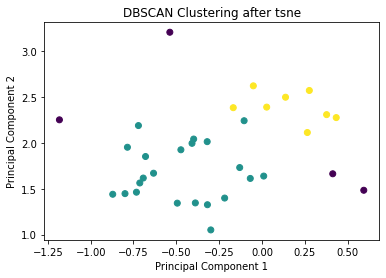

In [127]:
# Aplica DBSCAN después de tsne... min_samples=5 parece ser bueno
dbscan = DBSCAN(eps=0.35, min_samples=5) 
labels = dbscan.fit_predict(dflog2_Final_tsne)

# Visualiza los resultados de DBSCAN
plt.scatter(dflog2_Final_tsne[:, 0], dflog2_Final_tsne[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering after tsne')
plt.show()

In [129]:
df_tsne['Etiqueta']=principal_dflog2_Final_DF['Etiqueta']
df_tsne

Dimensión 1  Dimensión 2      Etiqueta
0     -0.319717     2.014639       DupOMut
1      0.027558     2.391554       DupOMut
2     -0.632858     1.670157       DupOMut
3     -0.679681     1.852462       DupOMut
4     -0.721121     2.190253       DupOMut
5     -0.871147     1.440391       DupOMut
6     -0.692897     1.617339       DupOMut
7     -0.785382     1.953564        Fusion
8     -0.217814     1.398855        Fusion
9     -0.799497     1.447315        Fusion
10    -0.298666     1.051185        Fusion
11    -0.732768     1.462860        Fusion
12     0.433534     2.277251        Fusion
13    -0.408283     1.996237        Fusion
14    -0.129975     1.731929        Fusion
15    -0.398697     2.043022        Fusion
16     0.377393     2.309616        Fusion
17    -0.713165     1.563596        Fusion
18     0.264871     2.114255        Fusion
19    -0.318300     1.326253     NotEvents
20    -0.388902     1.345859     NotEvents
21    -0.473293     1.925935     NotEvents
22     0.413180     1.663952     NotEvents
23     0.276460     2.573228     NotEvents
24    -0.167600     2.385377     NotEvents
25    -0.104179     2.243049     NotEvents
26    -0.537796     3.208805     NotEvents
27    -0.068175     1.613163     NotEvents
28    -0.050381     2.623859     NotEvents
29     0.594350     1.484026     NotEvents
30     0.010208     1.638944     NotEvents
31     0.137601     2.499709     NotEvents
32    -1.182365     2.252928  USP9X--DDX3X
33    -0.494244     1.343322  USP9X--DDX3X

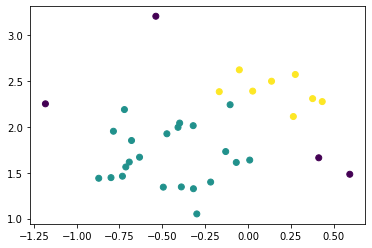

In [130]:
# Aplicar DBSCAN para agrupar los puntos
dbscan = DBSCAN(eps=0.35, min_samples=5)
df_tsne['cluster'] = dbscan.fit_predict(df_tsne[['Dimensión 1', 'Dimensión 2']])
# Crear un gráfico de dispersión
plt.scatter(df_tsne['Dimensión 1'], df_tsne['Dimensión 2'], c=df_tsne['cluster'], cmap='viridis')

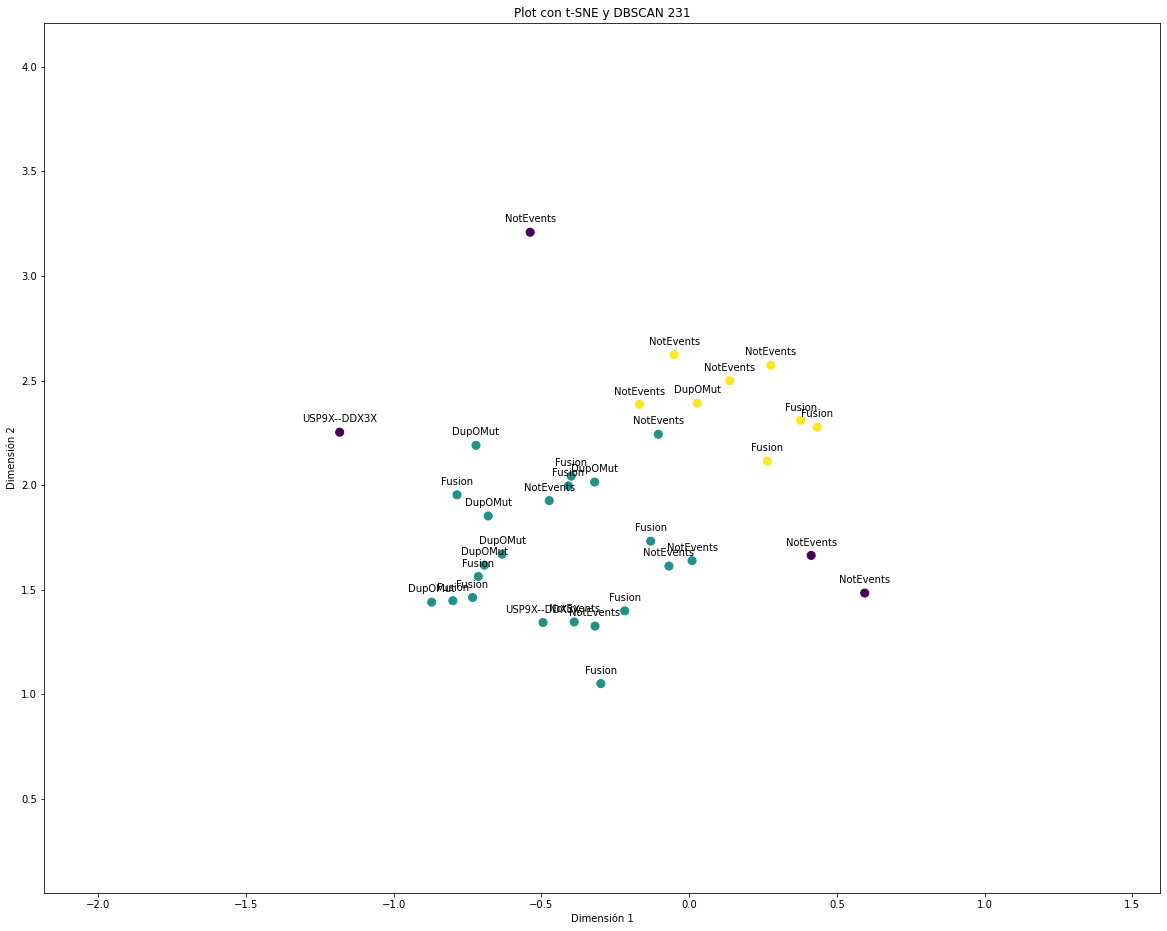

In [138]:
plt.figure(figsize=(20, 16))
# Crear un gráfico de dispersión
plt.scatter(df_tsne['Dimensión 1'], df_tsne['Dimensión 2'], c=df_tsne['cluster'], cmap='viridis',s=65)

# Etiquetar los puntos con los nombres de las etiquetas
for x, y, label in zip(df_tsne['Dimensión 1'], df_tsne['Dimensión 2'], df_tsne['Etiqueta']):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Ajustar los límites del gráfico
plt.xlim(min(df_tsne['Dimensión 1']) - 1, max(df_tsne['Dimensión 1']) + 1)
plt.ylim(min(df_tsne['Dimensión 2']) - 1, max(df_tsne['Dimensión 2']) + 1)

# Añadir etiquetas a los ejes
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Plot con t-SNE y DBSCAN 231')
plt.savefig('plot_tsne_DBSCAN_231.png', dpi=300)
plt.show()

In [118]:
#ta bien solo falta poner etiquetas en el dataframe
# Ploteando con t-SNE y colores diferenciables según sus etiquetas.
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimensión 1', y='Dimensión 2', hue='Etiqueta', data=df_tsne, palette='bright', legend='full', s=75)
plt.title('Plot con t-SNE-CRLF2')
plt.savefig('plot_tsne_CRLF2_3groups.png', dpi=300)
plt.show()

ValueError: Could not interpret value `Etiqueta` for parameter `hue`

<Figure size 720x576 with 0 Axes>

In [123]:
df_tsne_C= df_tsne.copy()

In [124]:
df_tsne_C

Dimensión 1  Dimensión 2
0     -0.319717     2.014639
1      0.027558     2.391554
2     -0.632858     1.670157
3     -0.679681     1.852462
4     -0.721121     2.190253
5     -0.871147     1.440391
6     -0.692897     1.617339
7     -0.785382     1.953564
8     -0.217814     1.398855
9     -0.799497     1.447315
10    -0.298666     1.051185
11    -0.732768     1.462860
12     0.433534     2.277251
13    -0.408283     1.996237
14    -0.129975     1.731929
15    -0.398697     2.043022
16     0.377393     2.309616
17    -0.713165     1.563596
18     0.264871     2.114255
19    -0.318300     1.326253
20    -0.388902     1.345859
21    -0.473293     1.925935
22     0.413180     1.663952
23     0.276460     2.573228
24    -0.167600     2.385377
25    -0.104179     2.243049
26    -0.537796     3.208805
27    -0.068175     1.613163
28    -0.050381     2.623859
29     0.594350     1.484026
30     0.010208     1.638944
31     0.137601     2.499709
32    -1.182365     2.252928
33    -0.494244     1.343322

In [125]:
# Aplicar DBSCAN comparando etiquetas. 
dbscan = DBSCAN(eps=0.35, min_samples=5) 
labels = dbscan.fit_predict(dflog2_Final_tsne)

# Agregar las etiquetas predichas al DataFrame
df_tsne_C['predicted_label'] = labels

In [126]:
df_tsne_C

Dimensión 1  Dimensión 2  predicted_label
0     -0.319717     2.014639                0
1      0.027558     2.391554                1
2     -0.632858     1.670157                0
3     -0.679681     1.852462                0
4     -0.721121     2.190253                0
5     -0.871147     1.440391                0
6     -0.692897     1.617339                0
7     -0.785382     1.953564                0
8     -0.217814     1.398855                0
9     -0.799497     1.447315                0
10    -0.298666     1.051185                0
11    -0.732768     1.462860                0
12     0.433534     2.277251                1
13    -0.408283     1.996237                0
14    -0.129975     1.731929                0
15    -0.398697     2.043022                0
16     0.377393     2.309616                1
17    -0.713165     1.563596                0
18     0.264871     2.114255                1
19    -0.318300     1.326253                0
20    -0.388902     1.345859                0
21    -0.473293     1.925935                0
22     0.413180     1.663952               -1
23     0.276460     2.573228                1
24    -0.167600     2.385377                1
25    -0.104179     2.243049                0
26    -0.537796     3.208805               -1
27    -0.068175     1.613163                0
28    -0.050381     2.623859                1
29     0.594350     1.484026               -1
30     0.010208     1.638944                0
31     0.137601     2.499709                1
32    -1.182365     2.252928               -1
33    -0.494244     1.343322                0

In [197]:
from sklearn.metrics import adjusted_rand_score
# Comparar las etiquetas reales con las predichas (usando el índice de Rand ajustado)
ari = adjusted_rand_score(df_tsne_C['Etiqueta'], df_tsne_C['predicted_label'])
print(f"Adjusted Rand Index: {ari}")

# Visualizar el DataFrame resultante
print(df_tsne_C)

Adjusted Rand Index: -0.0030166893135081365
    Dimensión 1  Dimensión 2      Etiqueta  predicted_label
0     -0.319717     2.014639       DupOMut                0
1      0.027558     2.391554       DupOMut                1
2     -0.632858     1.670157       DupOMut                0
3     -0.679681     1.852462       DupOMut                0
4     -0.721121     2.190253       DupOMut                0
5     -0.871147     1.440391       DupOMut                0
6     -0.692897     1.617339       DupOMut                0
7     -0.785382     1.953564        Fusion                0
8     -0.217814     1.398855        Fusion                0
9     -0.799497     1.447315        Fusion                0
10    -0.298666     1.051185        Fusion                0
11    -0.732768     1.462860        Fusion                0
12     0.433534     2.277251        Fusion                1
13    -0.408283     1.996237        Fusion                0
14    -0.129975     1.731929        Fusion              

In [201]:
df_tsne_C=df_tsne.copy()
df_tsne_C

Dimensión 1  Dimensión 2      Etiqueta  predicted_label
0     -0.319717     2.014639       DupOMut                0
1      0.027558     2.391554       DupOMut                1
2     -0.632858     1.670157       DupOMut                0
3     -0.679681     1.852462       DupOMut                0
4     -0.721121     2.190253       DupOMut                0
5     -0.871147     1.440391       DupOMut                0
6     -0.692897     1.617339       DupOMut                0
7     -0.785382     1.953564        Fusion                0
8     -0.217814     1.398855        Fusion                0
9     -0.799497     1.447315        Fusion                0
10    -0.298666     1.051185        Fusion                0
11    -0.732768     1.462860        Fusion                0
12     0.433534     2.277251        Fusion                1
13    -0.408283     1.996237        Fusion                0
14    -0.129975     1.731929        Fusion                0
15    -0.398697     2.043022        Fusion                0
16     0.377393     2.309616        Fusion                1
17    -0.713165     1.563596        Fusion                0
18     0.264871     2.114255        Fusion                1
19    -0.318300     1.326253     NotEvents                0
20    -0.388902     1.345859     NotEvents                0
21    -0.473293     1.925935     NotEvents                0
22     0.413180     1.663952     NotEvents               -1
23     0.276460     2.573228     NotEvents                1
24    -0.167600     2.385377     NotEvents                1
25    -0.104179     2.243049     NotEvents                0
26    -0.537796     3.208805     NotEvents               -1
27    -0.068175     1.613163     NotEvents                0
28    -0.050381     2.623859     NotEvents                1
29     0.594350     1.484026     NotEvents               -1
30     0.010208     1.638944     NotEvents                0
31     0.137601     2.499709     NotEvents                1
32    -1.182365     2.252928  USP9X--DDX3X               -1
33    -0.494244     1.343322  USP9X--DDX3X                0

In [207]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Codificar las etiquetas de strings a valores numéricos
label_encoder = LabelEncoder()
df_tsne_C['label_numeric'] = label_encoder.fit_transform(df_tsne_C['Etiqueta'])
df_tsne_C

Dimensión 1  Dimensión 2      Etiqueta  predicted_label  label_numeric
0     -0.319717     2.014639       DupOMut                0              0
1      0.027558     2.391554       DupOMut                1              0
2     -0.632858     1.670157       DupOMut                0              0
3     -0.679681     1.852462       DupOMut                0              0
4     -0.721121     2.190253       DupOMut                0              0
5     -0.871147     1.440391       DupOMut                0              0
6     -0.692897     1.617339       DupOMut                0              0
7     -0.785382     1.953564        Fusion                0              1
8     -0.217814     1.398855        Fusion                0              1
9     -0.799497     1.447315        Fusion                0              1
10    -0.298666     1.051185        Fusion                0              1
11    -0.732768     1.462860        Fusion                0              1
12     0.433534     2.277251        Fusion                1              1
13    -0.408283     1.996237        Fusion                0              1
14    -0.129975     1.731929        Fusion                0              1
15    -0.398697     2.043022        Fusion                0              1
16     0.377393     2.309616        Fusion                1              1
17    -0.713165     1.563596        Fusion                0              1
18     0.264871     2.114255        Fusion                1              1
19    -0.318300     1.326253     NotEvents                0              2
20    -0.388902     1.345859     NotEvents                0              2
21    -0.473293     1.925935     NotEvents                0              2
22     0.413180     1.663952     NotEvents               -1              2
23     0.276460     2.573228     NotEvents                1              2
24    -0.167600     2.385377     NotEvents                1              2
25    -0.104179     2.243049     NotEvents                0              2
26    -0.537796     3.208805     NotEvents               -1              2
27    -0.068175     1.613163     NotEvents                0              2
28    -0.050381     2.623859     NotEvents                1              2
29     0.594350     1.484026     NotEvents               -1              2
30     0.010208     1.638944     NotEvents                0              2
31     0.137601     2.499709     NotEvents                1              2
32    -1.182365     2.252928  USP9X--DDX3X               -1              3
33    -0.494244     1.343322  USP9X--DDX3X                0              3

In [206]:
df_tsne_C

Dimensión 1  Dimensión 2      Etiqueta  predicted_label  label_numeric
0     -0.319717     2.014639       DupOMut                0              0
1      0.027558     2.391554       DupOMut                1              0
2     -0.632858     1.670157       DupOMut                0              0
3     -0.679681     1.852462       DupOMut                0              0
4     -0.721121     2.190253       DupOMut                0              0
5     -0.871147     1.440391       DupOMut                0              0
6     -0.692897     1.617339       DupOMut                0              0
7     -0.785382     1.953564        Fusion                0              1
8     -0.217814     1.398855        Fusion                0              1
9     -0.799497     1.447315        Fusion                0              1
10    -0.298666     1.051185        Fusion                0              1
11    -0.732768     1.462860        Fusion                0              1
12     0.433534     2.277251        Fusion                1              1
13    -0.408283     1.996237        Fusion                0              1
14    -0.129975     1.731929        Fusion                0              1
15    -0.398697     2.043022        Fusion                0              1
16     0.377393     2.309616        Fusion                1              1
17    -0.713165     1.563596        Fusion                0              1
18     0.264871     2.114255        Fusion                1              1
19    -0.318300     1.326253     NotEvents                0              2
20    -0.388902     1.345859     NotEvents                0              2
21    -0.473293     1.925935     NotEvents                0              2
22     0.413180     1.663952     NotEvents               -1              2
23     0.276460     2.573228     NotEvents                1              2
24    -0.167600     2.385377     NotEvents                1              2
25    -0.104179     2.243049     NotEvents                0              2
26    -0.537796     3.208805     NotEvents               -1              2
27    -0.068175     1.613163     NotEvents                0              2
28    -0.050381     2.623859     NotEvents                1              2
29     0.594350     1.484026     NotEvents               -1              2
30     0.010208     1.638944     NotEvents                0              2
31     0.137601     2.499709     NotEvents                1              2
32    -1.182365     2.252928  USP9X--DDX3X               -1              3
33    -0.494244     1.343322  USP9X--DDX3X                0              3

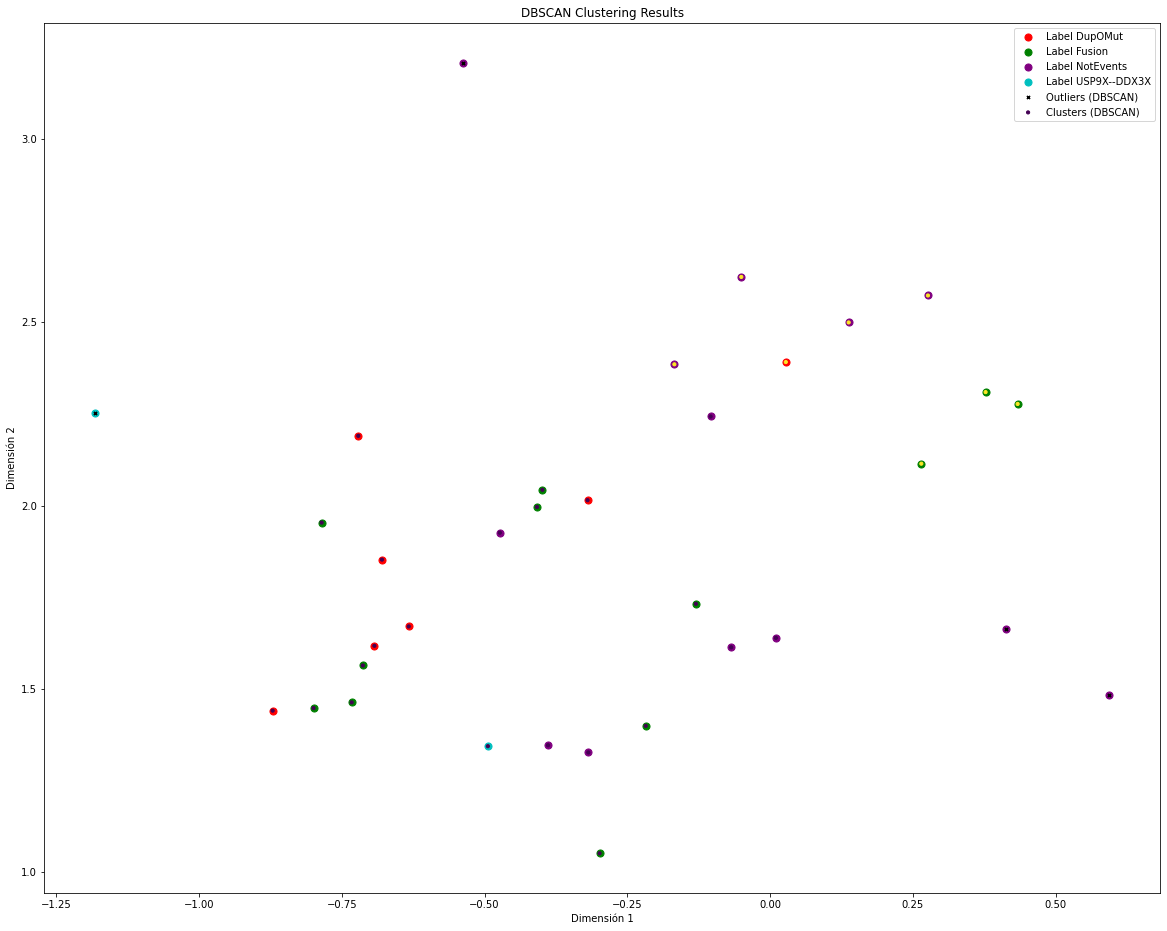

In [244]:
# Visualizar el resultado
plt.figure(figsize=(20, 16))

# Scatter plot para las etiquetas reales
plt.scatter(df_tsne_C['Dimensión 1'][df_tsne_C['label_numeric'] == 0], df_tsne_C['Dimensión 2'][df_tsne_C['label_numeric'] == 0], color='r', label='Label DupOMut',s=50)
plt.scatter(df_tsne_C['Dimensión 1'][df_tsne_C['label_numeric'] == 1], df_tsne_C['Dimensión 2'][df_tsne_C['label_numeric'] == 1], color='g', label='Label Fusion',s=50)
plt.scatter(df_tsne_C['Dimensión 1'][df_tsne_C['label_numeric'] == 2], df_tsne_C['Dimensión 2'][df_tsne_C['label_numeric'] == 2], color='purple', label='Label NotEvents',s=50)
plt.scatter(df_tsne_C['Dimensión 1'][df_tsne_C['label_numeric'] == 3], df_tsne_C['Dimensión 2'][df_tsne_C['label_numeric'] == 3], color='c', label='Label USP9X--DDX3X',s=50)

# Scatter plot para las etiquetas predichas por DBSCAN
plt.scatter(df_tsne_C['Dimensión 1'][df_tsne_C['predicted_label'] == -1], df_tsne_C['Dimensión 2'][df_tsne_C['predicted_label'] == -1], color='black' , marker='x', label='Outliers (DBSCAN)',s=10)
plt.scatter(df_tsne_C['Dimensión 1'][df_tsne_C['predicted_label'] != -1], df_tsne_C['Dimensión 2'][df_tsne_C['predicted_label'] != -1], c=df_tsne_C['predicted_label'][df_tsne_C['predicted_label'] != -1], cmap='viridis', label='Clusters (DBSCAN)',s=10)

plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('DBSCAN Clustering Results')
plt.legend()
plt.show()

In [ ]:
#ssssssssssss

Apartado limpiar criterio que el 85% de los valores de cada columna no sean 0.

In [53]:
# Determinar la proporción de valores no 0 en cada columna
proporcion_no_0 = (dflog2_Final != 0).sum() / len(dflog2_Final)

# Establecer el umbral para la proporción deseada (85%)
umbral = 0.85

# Seleccionar las columnas que cumplen con el criterio y no son de tipo string
columnas_a_mantener = [
    columna for columna in dflog2_Final.columns if proporcion_no_0[columna] >= umbral or not pd.api.types.is_numeric_dtype(dflog2_Final[columna])
]

In [54]:
# Crear un nuevo DataFrame con las columnas seleccionadas
nuevo_dflog2_Final = dflog2_Final[columnas_a_mantener]
nuevo_dflog2_Final

Sample               tipo  Columna_1  Columna_2  Columna_4  Columna_6   
0   CA1396          CRLF2_dup   0.865372   4.768020   4.904675   6.593281  \
1   CA1989          CRLF2_dup   0.938796   5.590270   4.775942   5.869147   
2    CA920          CRLF2_dup   2.065230   6.738658   4.134901   7.324846   
3    CA925          CRLF2_dup   0.778751   6.412202   4.730330   6.885692   
4    CA871     CRLF2_dup/+mut   0.731411   5.420694   4.295459   6.694859   
5    CA894     CRLF2_dup/+mut   1.818770   7.189696   5.620781   7.388649   
6    CA918          CRLF2_mut   1.492493   5.788084   4.665352   7.104465   
7   CA1366    CRLF2--IGH/+mut   1.103066   7.077751   5.253043   7.090310   
8   CA1658       CRLF2--P2RY8   2.113983   7.627496   5.499988   7.208719   
9   CA1889       CRLF2--P2RY8   2.168253   5.826955   5.190047   7.042478   
10  CA2054       CRLF2--P2RY8   1.124501   7.733219   5.276895   7.189175   
11  CA2246       CRLF2--P2RY8   2.627816   6.742049   5.568177   7.525812   
12  CA2255       CRLF2--P2RY8   1.808584   6.050434   5.093885   5.569420   
13   CA826       CRLF2--P2RY8   2.030859   6.934154   4.503916   7.050911   
14  CA1529  CRLF2--P2RY8/+dup   1.822028   6.480567   5.392031   6.470573   
15  CA1675  CRLF2--P2RY8/+dup   1.931050   7.146670   5.756403   7.553853   
16  CA2254  CRLF2--P2RY8/+dup   1.449556   5.221296   4.844250   5.696976   
17  CA1218  CRLF2--P2RY8/+mut   1.953154   6.694402   5.050766   7.183431   
18  CA2211  CRLF2--P2RY8/+mut   2.160328   7.033233   5.783256   6.567048   
19  CA1243          no events   2.240548   7.627335   4.841680   7.199507   
20  CA1362          no events   1.848907   5.803178   4.887322   7.133751   
21  CA1664          no events   1.405800   6.743449   5.028992   6.638187   
22  CA1679          no events   1.447629   6.962878   4.573451   5.958776   
23  CA1682          no events   1.086040   6.453420   5.369596   4.974925   
24  CA1851          no events   1.667599   5.698066   5.741300   6.606001   
25  CA2098          no events   0.590675   6.225425   4.979220   5.817671   
26  CA2100          no events   0.000000   6.546870   3.954082   6.677707   
27  CA2220          no events   2.247520   7.471642   5.247692   7.239423   
28  CA2256          no events   2.041327   6.264795   5.059965   6.283800   
29   CA867          no events   2.081663   8.487229   4.663486   5.913325   
30  CA1082      other fusions   2.384942   7.284855   5.584924   6.953082   
31  CA2106      other fusions   1.389444   6.157326   4.641994   5.651190   
32  CA1371       USP9X--DDX3X   1.114046   6.218951   4.369098   7.219540   
33  CA1614       USP9X--DDX3X   2.388169   7.402049   5.082838   7.053223   

    Columna_7  Columna_8  Columna_9  Columna_11  ...  Columna_1400   
0    6.445244   4.359598   4.539276    5.989650  ...      5.350269  \
1    5.941914   3.807553   4.356101    5.800389  ...      5.078886   
2    6.132968   5.242604   3.609980    6.289921  ...      5.661738   
3    6.307100   5.262084   3.321743    6.267883  ...      5.627038   
4    6.035852   4.738450   3.440158    6.063757  ...      5.562300   
5    6.334604   6.376501   4.709909    7.051249  ...      5.948299   
6    6.618715   5.585067   3.955938    6.710951  ...      5.857710   
7    5.583681   5.257131   3.656018    6.403253  ...      5.248949   
8    6.477872   5.377383   3.986869    6.569449  ...      5.857290   
9    5.637700   5.419623   3.964128    6.103205  ...      6.008258   
10   6.147207   5.046678   4.226293    5.870158  ...      5.533635   
11   6.519955   5.143440   3.980270    6.274871  ...      5.932020   
12   6.888409   4.750344   4.857935    6.341694  ...      5.846991   
13   6.063581   5.137879   5.072978    6.229918  ...      5.277972   
14   5.951309   4.524913   4.855874    6.077193  ...      5.842399   
15   6.628208   4.969042   4.212760    6.616613  ...      5.354272   
16   6.598382   4.341591   4.982997    6.797399  ...      5.026161   
17   6.590062   5.948737   4.415568    6.639787 

In [55]:
nuevo_dflog2_Final

Sample               tipo  Columna_1  Columna_2  Columna_4  Columna_6   
0   CA1396          CRLF2_dup   0.865372   4.768020   4.904675   6.593281  \
1   CA1989          CRLF2_dup   0.938796   5.590270   4.775942   5.869147   
2    CA920          CRLF2_dup   2.065230   6.738658   4.134901   7.324846   
3    CA925          CRLF2_dup   0.778751   6.412202   4.730330   6.885692   
4    CA871     CRLF2_dup/+mut   0.731411   5.420694   4.295459   6.694859   
5    CA894     CRLF2_dup/+mut   1.818770   7.189696   5.620781   7.388649   
6    CA918          CRLF2_mut   1.492493   5.788084   4.665352   7.104465   
7   CA1366    CRLF2--IGH/+mut   1.103066   7.077751   5.253043   7.090310   
8   CA1658       CRLF2--P2RY8   2.113983   7.627496   5.499988   7.208719   
9   CA1889       CRLF2--P2RY8   2.168253   5.826955   5.190047   7.042478   
10  CA2054       CRLF2--P2RY8   1.124501   7.733219   5.276895   7.189175   
11  CA2246       CRLF2--P2RY8   2.627816   6.742049   5.568177   7.525812   
12  CA2255       CRLF2--P2RY8   1.808584   6.050434   5.093885   5.569420   
13   CA826       CRLF2--P2RY8   2.030859   6.934154   4.503916   7.050911   
14  CA1529  CRLF2--P2RY8/+dup   1.822028   6.480567   5.392031   6.470573   
15  CA1675  CRLF2--P2RY8/+dup   1.931050   7.146670   5.756403   7.553853   
16  CA2254  CRLF2--P2RY8/+dup   1.449556   5.221296   4.844250   5.696976   
17  CA1218  CRLF2--P2RY8/+mut   1.953154   6.694402   5.050766   7.183431   
18  CA2211  CRLF2--P2RY8/+mut   2.160328   7.033233   5.783256   6.567048   
19  CA1243          no events   2.240548   7.627335   4.841680   7.199507   
20  CA1362          no events   1.848907   5.803178   4.887322   7.133751   
21  CA1664          no events   1.405800   6.743449   5.028992   6.638187   
22  CA1679          no events   1.447629   6.962878   4.573451   5.958776   
23  CA1682          no events   1.086040   6.453420   5.369596   4.974925   
24  CA1851          no events   1.667599   5.698066   5.741300   6.606001   
25  CA2098          no events   0.590675   6.225425   4.979220   5.817671   
26  CA2100          no events   0.000000   6.546870   3.954082   6.677707   
27  CA2220          no events   2.247520   7.471642   5.247692   7.239423   
28  CA2256          no events   2.041327   6.264795   5.059965   6.283800   
29   CA867          no events   2.081663   8.487229   4.663486   5.913325   
30  CA1082      other fusions   2.384942   7.284855   5.584924   6.953082   
31  CA2106      other fusions   1.389444   6.157326   4.641994   5.651190   
32  CA1371       USP9X--DDX3X   1.114046   6.218951   4.369098   7.219540   
33  CA1614       USP9X--DDX3X   2.388169   7.402049   5.082838   7.053223   

    Columna_7  Columna_8  Columna_9  Columna_11  ...  Columna_1400   
0    6.445244   4.359598   4.539276    5.989650  ...      5.350269  \
1    5.941914   3.807553   4.356101    5.800389  ...      5.078886   
2    6.132968   5.242604   3.609980    6.289921  ...      5.661738   
3    6.307100   5.262084   3.321743    6.267883  ...      5.627038   
4    6.035852   4.738450   3.440158    6.063757  ...      5.562300   
5    6.334604   6.376501   4.709909    7.051249  ...      5.948299   
6    6.618715   5.585067   3.955938    6.710951  ...      5.857710   
7    5.583681   5.257131   3.656018    6.403253  ...      5.248949   
8    6.477872   5.377383   3.986869    6.569449  ...      5.857290   
9    5.637700   5.419623   3.964128    6.103205  ...      6.008258   
10   6.147207   5.046678   4.226293    5.870158  ...      5.533635   
11   6.519955   5.143440   3.980270    6.274871  ...      5.932020   
12   6.888409   4.750344   4.857935    6.341694  ...      5.846991   
13   6.063581   5.137879   5.072978    6.229918  ...      5.277972   
14   5.951309   4.524913   4.855874    6.077193  ...      5.842399   
15   6.628208   4.969042   4.212760    6.616613  ...      5.354272   
16   6.598382   4.341591   4.982997    6.797399  ...      5.026161   
17   6.590062   5.948737   4.415568    6.639787 

In [52]:
nuevo_dflog2_Final.hist(bins=50, figsize=(200,150))
plt.show()

In [56]:
nuevo_dflog2_Final.max()

Sample                  CA925
tipo            other fusions
Columna_1            2.627816
Columna_2            8.487229
Columna_4            5.783256
                    ...      
Columna_1406         7.262292
Columna_1408         7.955267
Columna_1409         5.660416
Columna_1410        10.066945
Columna_1411          8.31611
Length: 1105, dtype: object

In [57]:
nuevo_dflog2_Final.describe(include='all').T

count unique        top freq      mean       std       min   
Sample          34     34     CA1396    1       NaN       NaN       NaN  \
tipo            34     10  no events   11       NaN       NaN       NaN   
Columna_1     34.0    NaN        NaN  NaN  1.615244  0.612599       0.0   
Columna_2     34.0    NaN        NaN  NaN  6.583039  0.807845   4.76802   
Columna_4     34.0    NaN        NaN  NaN  5.010757  0.470182  3.954082   
...            ...    ...        ...  ...       ...       ...       ...   
Columna_1406  34.0    NaN        NaN  NaN  6.116484  0.662324  4.933437   
Columna_1408  34.0    NaN        NaN  NaN  7.219996  0.382122    6.3793   
Columna_1409  34.0    NaN        NaN  NaN  4.695551  0.759719  2.784894   
Columna_1410  34.0    NaN        NaN  NaN  9.446259  0.357432  8.419521   
Columna_1411  34.0    NaN        NaN  NaN  7.156093  0.531965  6.032717   

                   25%       50%       75%        max  
Sample             NaN       NaN       NaN        NaN  
tipo               NaN       NaN       NaN        NaN  
Columna_1      1.11666  1.813677  2.077555   2.627816  
Columna_2     6.077157  6.620636   7.12944   8.487229  
Columna_4     4.681597  5.039879   5.34642   5.783256  
...                ...       ...       ...        ...  
Columna_1406  5.708417   6.24627  6.602331   7.262292  
Columna_1408  7.047012  7.285453  7.533851   7.955267  
Columna_1409   4.08127  4.722547  5.427581   5.660416  
Columna_1410  9.240619  9.520785  9.667121  10.066945  
Columna_1411  6.768242  7.162765  7.539993    8.31611  

[1105 rows x 11 columns]

In [58]:
# Encuentra los máximos de cada columna
maximos_por_columna = nuevo_dflog2_Final_PCA.max()
# Calcula la media de los máximos
media_maximos = maximos_por_columna.mean()
# Calcula la desviación estándar de los máximos
desviacion_estandar_maximos = maximos_por_columna.std()


In [59]:
media_maximos

6.364410171737608

In [60]:
desviacion_estandar_maximos

1.5887290836732901

In [61]:
((desviacion_estandar_maximos)/media_maximos)*100

24.962707317770757

**Desviacion estandar de la media de los maximos del 25.96%**

**Prueba de uniformidad usando el test de Kolmogorov-Smirnov en las columnas.**

In [64]:
from scipy import stats

umbral = 0.05  # Define un umbral de significancia

# Crear un DataFrame de ejemplo
dataks = {
    'Columna1': [0.2, 0.4, 0.6, 0.8, 1.0],
    'Columna2': [0.1, 0.3, 0.5, 0.7, 0.9],
    'Columna3': [0.2, 0.4, 0.6, 0.8, 1.0],
}
dfks = pd.DataFrame(dataks)

columnas_no_uniformes = []

for columna in dfks.columns:
    # Realiza la prueba de Kolmogorov-Smirnov en comparación con la distribución uniforme
    resultado_prueba = stats.kstest(dfks[columna], 'uniform')
    
    # El resultado_prueba es una tupla que contiene el estadístico de la prueba y el valor p
    estadistico_prueba, valor_p = resultado_prueba
    
    # Compara el valor p con el umbral
    if valor_p < umbral:
        columnas_no_uniformes.append(columna)

# Elimina las columnas no uniformes del DataFrame
dfks = dfks.drop(columnas_no_uniformes, axis=1)

print("Columnas no uniformes:", columnas_no_uniformes)
print("DataFrame después de eliminar columnas no uniformes:")
print(dfks)

Columnas no uniformes: []
DataFrame después de eliminar columnas no uniformes:
   Columna1  Columna2  Columna3
0       0.2       0.1       0.2
1       0.4       0.3       0.4
2       0.6       0.5       0.6
3       0.8       0.7       0.8
4       1.0       0.9       1.0


In [65]:
nuevo_dflog2_Final_PCA

Columna_1  Columna_2  Columna_4  Columna_6  Columna_7  Columna_8   
197   0.865372   4.768020   4.904675   6.593281   6.445244   4.359598  \
198   0.938796   5.590270   4.775942   5.869147   5.941914   3.807553   
199   2.065230   6.738658   4.134901   7.324846   6.132968   5.242604   
200   0.778751   6.412202   4.730330   6.885692   6.307100   5.262084   
201   0.731411   5.420694   4.295459   6.694859   6.035852   4.738450   
202   1.818770   7.189696   5.620781   7.388649   6.334604   6.376501   
203   1.492493   5.788084   4.665352   7.104465   6.618715   5.585067   
204   1.103066   7.077751   5.253043   7.090310   5.583681   5.257131   
205   2.113983   7.627496   5.499988   7.208719   6.477872   5.377383   
206   2.168253   5.826955   5.190047   7.042478   5.637700   5.419623   
207   1.124501   7.733219   5.276895   7.189175   6.147207   5.046678   
208   2.627816   6.742049   5.568177   7.525812   6.519955   5.143440   
209   1.808584   6.050434   5.093885   5.569420   6.888409   4.750344   
210   2.030859   6.934154   4.503916   7.050911   6.063581   5.137879   
211   1.822028   6.480567   5.392031   6.470573   5.951309   4.524913   
212   1.931050   7.146670   5.756403   7.553853   6.628208   4.969042   
213   1.449556   5.221296   4.844250   5.696976   6.598382   4.341591   
214   1.953154   6.694402   5.050766   7.183431   6.590062   5.948737   
215   2.160328   7.033233   5.783256   6.567048   6.417725   4.165013   
216   2.240548   7.627335   4.841680   7.199507   6.596149   5.228276   
217   1.848907   5.803178   4.887322   7.133751   6.881119   5.360907   
218   1.405800   6.743449   5.028992   6.638187   6.459299   4.494206   
219   1.447629   6.962878   4.573451   5.958776   6.241682   5.037550   
220   1.086040   6.453420   5.369596   4.974925   5.193818   3.817728   
221   1.667599   5.698066   5.741300   6.606001   6.140690   4.491553   
222   0.590675   6.225425   4.979220   5.817671   6.322246   4.175983   
223   0.000000   6.546870   3.954082   6.677707   6.450042   5.724444   
224   2.247520   7.471642   5.247692   7.239423   7.384393   6.087125   
225   2.041327   6.264795   5.059965   6.283800   6.103203   3.708609   
226   2.081663   8.487229   4.663486   5.913325   6.456131   4.178313   
227   2.384942   7.284855   5.584924   6.953082   6.832267   5.109611   
228   1.389444   6.157326   4.641994   5.651190   5.736827   4.342997   
229   1.114046   6.218951   4.369098   7.219540   5.285804   4.759992   
230   2.388169   7.402049   5.082838   7.053223   3.497589   5.443443   

     Columna_9  Columna_11  Columna_12  Columna_15  ...  Columna_1400   
197   4.539276    5.989650    5.145306    5.631043  ...      5.350269  \
198   4.356101    5.800389    4.679962    5.821696  ...      5.078886   
199   3.609980    6.289921    5.951512    6.922989  ...      5.661738   
200   3.321743    6.267883    5.719682    6.269763  ...      5.627038   
201   3.440158    6.063757    5.649555    5.694176  ...      5.562300   
202   4.709909    7.051249    6.156487    7.865322  ...      5.948299   
203   3.955938    6.710951    6.915694    6.580391  ...      5.857710   
204   3.656018    6.403253    5.890046    6.680538  ...      5.248949   
205   3.986869    6.569449    5.909232    6.080903  ...      5.857290   
206   3.964128    6.103205    6.032597    6.915852  ...      6.008258   
207   4.226293    5.870158    6.267819    6.228955  ...      5.533635   
208   3.980270    6.274871    5.987913    6.660421  ...      5.932020   
209   4.857935    6.341694    5.853782    5.262954  ...      5.846991   
210   5.072978    6.229918    5.539933    6.327022  ...      5.277972   
211   4.855874    6.077193    5.799932    6.015864  ...      5.842399   
212   4.212760    6.616613    5.914111    7.212103  ...      5.354272   
213   4.982997    6.797399    5.072702    5.266393  ...      5.026161   
214   4.415568    6.639787    6.449549    6.962736  ...      5.831478   
215   4.105632    7.015479    6.221897    6.868318  ...      5

In [66]:
from scipy import stats

umbral = 0.01  # Define un umbral de significancia

columnas_uniformes = []

for columna in nuevo_dflog2_Final_PCA.columns:
    # Realiza la prueba de Kolmogorov-Smirnov para cada columna en relación a la distribución uniforme
    resultado_prueba = stats.kstest(nuevo_dflog2_Final_PCA[columna], 'uniform')
    
    # El resultado_prueba es una tupla que contiene el estadístico de la prueba y el valor p
    estadistico_prueba, valor_p = resultado_prueba
    
    # Compara el valor p con el umbral
    if valor_p < umbral:
        columnas_uniformes.append(columna)

# Ahora tienes una lista de columnas que no siguen una distribución uniforme
print("Columnas no uniformes:", columnas_uniformes)

# Elimina las columnas no uniformes del DataFrame
#dflog2_Final_PCA_NoUniforme = dfU.drop(columnas_no_uniformes, axis=1)
#dflog2_Final_PCA_NoUniforme


Columnas no uniformes: ['Columna_1', 'Columna_2', 'Columna_4', 'Columna_6', 'Columna_7', 'Columna_8', 'Columna_9', 'Columna_11', 'Columna_12', 'Columna_15', 'Columna_16', 'Columna_17', 'Columna_18', 'Columna_19', 'Columna_21', 'Columna_23', 'Columna_24', 'Columna_26', 'Columna_27', 'Columna_29', 'Columna_30', 'Columna_33', 'Columna_34', 'Columna_35', 'Columna_36', 'Columna_37', 'Columna_38', 'Columna_39', 'Columna_40', 'Columna_41', 'Columna_44', 'Columna_45', 'Columna_46', 'Columna_47', 'Columna_49', 'Columna_50', 'Columna_51', 'Columna_52', 'Columna_53', 'Columna_54', 'Columna_55', 'Columna_56', 'Columna_57', 'Columna_58', 'Columna_59', 'Columna_60', 'Columna_61', 'Columna_62', 'Columna_63', 'Columna_64', 'Columna_65', 'Columna_66', 'Columna_67', 'Columna_68', 'Columna_69', 'Columna_72', 'Columna_73', 'Columna_74', 'Columna_75', 'Columna_76', 'Columna_77', 'Columna_78', 'Columna_79', 'Columna_81', 'Columna_82', 'Columna_83', 'Columna_84', 'Columna_85', 'Columna_86', 'Columna_88', 'Co

In [67]:
columnas_uniformes

['Columna_1',
 'Columna_2',
 'Columna_4',
 'Columna_6',
 'Columna_7',
 'Columna_8',
 'Columna_9',
 'Columna_11',
 'Columna_12',
 'Columna_15',
 'Columna_16',
 'Columna_17',
 'Columna_18',
 'Columna_19',
 'Columna_21',
 'Columna_23',
 'Columna_24',
 'Columna_26',
 'Columna_27',
 'Columna_29',
 'Columna_30',
 'Columna_33',
 'Columna_34',
 'Columna_35',
 'Columna_36',
 'Columna_37',
 'Columna_38',
 'Columna_39',
 'Columna_40',
 'Columna_41',
 'Columna_44',
 'Columna_45',
 'Columna_46',
 'Columna_47',
 'Columna_49',
 'Columna_50',
 'Columna_51',
 'Columna_52',
 'Columna_53',
 'Columna_54',
 'Columna_55',
 'Columna_56',
 'Columna_57',
 'Columna_58',
 'Columna_59',
 'Columna_60',
 'Columna_61',
 'Columna_62',
 'Columna_63',
 'Columna_64',
 'Columna_65',
 'Columna_66',
 'Columna_67',
 'Columna_68',
 'Columna_69',
 'Columna_72',
 'Columna_73',
 'Columna_74',
 'Columna_75',
 'Columna_76',
 'Columna_77',
 'Columna_78',
 'Columna_79',
 'Columna_81',
 'Columna_82',
 'Columna_83',
 'Columna_84',
 '

In [68]:
dflog2_Final_PCA_NoUniforme = nuevo_dflog2_Final_PCA.drop(columnas_uniformes, axis=1)
dflog2_Final_PCA_NoUniforme

Columna_218  Columna_578  Columna_597  Columna_831  Columna_846   
197     0.000000     0.919884     0.599097     0.700302     0.488426  \
198     0.422501     0.000000     0.586416     0.252277     0.000000   
199     1.072922     0.000000     0.396145     0.566130     0.282312   
200     1.010509     0.257064     0.916499     1.177772     0.236532   
201     0.180751     0.526554     0.293756     0.528004     1.035161   
202     0.835645     0.443208     0.767025     1.536553     1.316068   
203     0.424981     0.434493     0.516803     0.662788     0.848042   
204     0.151632     0.152099     0.264682     1.915709     0.000000   
205     0.711105     0.173185     1.287084     0.856851     0.699094   
206     0.142822     0.286974     0.151446     0.271166     0.310963   
207     0.816519     0.422473     1.792566     0.910723     1.972939   
208     0.000000     0.483184     0.061188     0.206103     0.778012   
209     1.059036     1.127064     0.964970     0.857559     0.629111   
210     0.333766     0.479308     0.569916     1.029380     0.549501   
211     0.337659     0.276254     0.256349     0.162003     0.891723   
212     0.775750     0.965820     0.199266     0.000000     0.953814   
213     0.302366     0.534478     0.583467     0.675616     1.440908   
214     0.291386     0.317674     1.242216     0.765645     0.000000   
215     0.386803     1.559033     0.539602     0.414639     1.661415   
216     0.084484     1.189297     0.619970     0.854628     1.566286   
217     0.554886     0.000000     1.016549     0.457903     0.341417   
218     0.296880     0.710422     0.457510     0.662233     0.783216   
219     1.085331     1.018042     0.799217     0.531740     0.567058   
220     1.100750     0.188257     0.061518     1.459110     0.000000   
221     0.000000     0.622579     0.000000     0.439231     0.372952   
222     0.000000     1.043579     0.963106     0.383485     0.718888   
223     3.446244     0.000000     0.000000     2.213036     2.292163   
224     0.529625     0.573076     0.415768     0.643934     0.510495   
225     0.489133     1.342447     1.581170     0.965702     0.324139   
226     0.937030     0.000000     0.950352     1.051853     0.000000   
227     0.245289     1.125219     0.056600     0.840623     1.378993   
228     0.565785     1.976371     1.145060     0.674219     0.277469   
229     0.119471     0.472569     0.170157     0.668500     0.144685   
230     0.332178     0.180765     0.355055     0.192266     0.709262   

     Columna_1054  Columna_1316  
197      0.563623      0.530855  
198      0.710407      0.666976  
199      0.906471      0.123940  
200      0.319474      0.681549  
201      0.576203      0.443081  
202      0.000000      0.680973  
203      0.307677      0.329721  
204      0.000000      0.679761  
205      0.393290      0.611223  
206      0.321182      0.451179  
207      0.885914      0.843591  
208      0.000000      0.143421  
209      0.288025      0.315773  
210      0.504122      3.197542  
211      0.647759      2.633628  
212      0.210953      0.000000  
213      0.365988      0.158439  
214      0.327583      0.955561  
215      1.324259      0.000000  
216      1.411043      0.990674  
217      0.944870      0.786956  
218      0.359530      0.564477  
219      2.473694      1.214770  
220      0.961623      1.816008  
221      0.218227      0.000000  
222      0.121060      0.487839  
223      2.424962      0.000000  
224      3.082116      1.015669  
225      0.920836      0.321737  
226      1.427084      1.015187  
227      0.479248      0.515742  
228      1.488713      0.798034  
229      0.000000      0.359917  
230      0.000000      0.835254

In [103]:
print(dflog2_Final_PCA_NoUniforme)

     Columna_218  Columna_578  Columna_597  Columna_831  Columna_846   
197     0.000000     0.919884     0.599097     0.700302     0.488426  \
198     0.422501     0.000000     0.586416     0.252277     0.000000   
199     1.072922     0.000000     0.396145     0.566130     0.282312   
200     1.010509     0.257064     0.916499     1.177772     0.236532   
201     0.180751     0.526554     0.293756     0.528004     1.035161   
202     0.835645     0.443208     0.767025     1.536553     1.316068   
203     0.424981     0.434493     0.516803     0.662788     0.848042   
204     0.151632     0.152099     0.264682     1.915709     0.000000   
205     0.711105     0.173185     1.287084     0.856851     0.699094   
206     0.142822     0.286974     0.151446     0.271166     0.310963   
207     0.816519     0.422473     1.792566     0.910723     1.972939   
208     0.000000     0.483184     0.061188     0.206103     0.778012   
209     1.059036     1.127064     0.964970     0.857559     0.62

**2da prueba.Prueba de Shapiro–Wilk**

In [69]:
alpha = 0.05  # Define el nivel de significancia

# Crear un DataFrame de ejemplo
dataSW = {
    'Columna1': [1, 2, 3, 4, 5],
    'Columna2': [10, 20, 30, 40, 50],
    'Columna3': [1, 2, 3, 4, 5],
}
dfSW = pd.DataFrame(dataSW)

columnas_no_normales = []

for columna in dfSW.columns:
    # Realiza la prueba de Shapiro-Wilk
    _, valor_p = stats.shapiro(dfSW[columna])
    
    # Compara el valor p con el nivel de significancia
    if valor_p < alpha:
        columnas_no_normales.append(columna)

# Elimina las columnas no normales del DataFrame
dfSW = dfSW.drop(columnas_no_normales, axis=1)

print("Columnas no normales:", columnas_no_normales)
print("DataFrame después de eliminar columnas no normales:")
print(dfSW)

Columnas no normales: []
DataFrame después de eliminar columnas no normales:
   Columna1  Columna2  Columna3
0         1        10         1
1         2        20         2
2         3        30         3
3         4        40         4
4         5        50         5


In [70]:
alpha = 0.05  # Define el nivel de significancia 
#IBM Cognos Analytics utiliza el nivel de significación 0,05. Este número significa que un resultado estadísticamente 
#significativo tiene menos de un 5 % de probabilidad de que ocurra producto de la casualidad.

dfSW = nuevo_dflog2_Final_PCA

columnas_no_normales = []

for columna in dfSW.columns:
    # Realiza la prueba de Shapiro-Wilk
    _, valor_p = stats.shapiro(dfSW[columna])
    
    # Compara el valor p con el nivel de significancia
    if valor_p < alpha:
        columnas_no_normales.append(columna)

# Elimina las columnas no normales del DataFrame
dfSW = dfSW.drop(columnas_no_normales, axis=1)

print("Columnas no normales:", columnas_no_normales)
print("DataFrame después de eliminar columnas no normales:")
dfSW

Columnas no normales: ['Columna_6', 'Columna_7', 'Columna_9', 'Columna_15', 'Columna_24', 'Columna_29', 'Columna_36', 'Columna_44', 'Columna_46', 'Columna_55', 'Columna_68', 'Columna_69', 'Columna_74', 'Columna_75', 'Columna_79', 'Columna_81', 'Columna_82', 'Columna_83', 'Columna_84', 'Columna_88', 'Columna_92', 'Columna_99', 'Columna_106', 'Columna_110', 'Columna_117', 'Columna_130', 'Columna_136', 'Columna_138', 'Columna_139', 'Columna_141', 'Columna_142', 'Columna_145', 'Columna_151', 'Columna_153', 'Columna_154', 'Columna_162', 'Columna_164', 'Columna_168', 'Columna_170', 'Columna_174', 'Columna_175', 'Columna_177', 'Columna_179', 'Columna_180', 'Columna_186', 'Columna_195', 'Columna_198', 'Columna_206', 'Columna_207', 'Columna_208', 'Columna_212', 'Columna_214', 'Columna_218', 'Columna_223', 'Columna_224', 'Columna_233', 'Columna_234', 'Columna_240', 'Columna_242', 'Columna_248', 'Columna_269', 'Columna_275', 'Columna_277', 'Columna_280', 'Columna_292', 'Columna_297', 'Columna_299

Columna_1  Columna_2  Columna_4  Columna_8  Columna_11  Columna_12   
197   0.865372   4.768020   4.904675   4.359598    5.989650    5.145306  \
198   0.938796   5.590270   4.775942   3.807553    5.800389    4.679962   
199   2.065230   6.738658   4.134901   5.242604    6.289921    5.951512   
200   0.778751   6.412202   4.730330   5.262084    6.267883    5.719682   
201   0.731411   5.420694   4.295459   4.738450    6.063757    5.649555   
202   1.818770   7.189696   5.620781   6.376501    7.051249    6.156487   
203   1.492493   5.788084   4.665352   5.585067    6.710951    6.915694   
204   1.103066   7.077751   5.253043   5.257131    6.403253    5.890046   
205   2.113983   7.627496   5.499988   5.377383    6.569449    5.909232   
206   2.168253   5.826955   5.190047   5.419623    6.103205    6.032597   
207   1.124501   7.733219   5.276895   5.046678    5.870158    6.267819   
208   2.627816   6.742049   5.568177   5.143440    6.274871    5.987913   
209   1.808584   6.050434   5.093885   4.750344    6.341694    5.853782   
210   2.030859   6.934154   4.503916   5.137879    6.229918    5.539933   
211   1.822028   6.480567   5.392031   4.524913    6.077193    5.799932   
212   1.931050   7.146670   5.756403   4.969042    6.616613    5.914111   
213   1.449556   5.221296   4.844250   4.341591    6.797399    5.072702   
214   1.953154   6.694402   5.050766   5.948737    6.639787    6.449549   
215   2.160328   7.033233   5.783256   4.165013    7.015479    6.221897   
216   2.240548   7.627335   4.841680   5.228276    6.459425    6.036858   
217   1.848907   5.803178   4.887322   5.360907    6.356557    5.853182   
218   1.405800   6.743449   5.028992   4.494206    6.064174    6.278653   
219   1.447629   6.962878   4.573451   5.037550    6.694951    5.206273   
220   1.086040   6.453420   5.369596   3.817728    6.344508    4.607988   
221   1.667599   5.698066   5.741300   4.491553    5.935888    5.138442   
222   0.590675   6.225425   4.979220   4.175983    6.173223    5.619549   
223   0.000000   6.546870   3.954082   5.724444    6.226602    5.745487   
224   2.247520   7.471642   5.247692   6.087125    7.386310    6.586649   
225   2.041327   6.264795   5.059965   3.708609    5.864191    5.238498   
226   2.081663   8.487229   4.663486   4.178313    6.690067    5.174408   
227   2.384942   7.284855   5.584924   5.109611    7.011250    6.038062   
228   1.389444   6.157326   4.641994   4.342997    5.959649    5.489256   
229   1.114046   6.218951   4.369098   4.759992    5.712214    5.898274   
230   2.388169   7.402049   5.082838   5.443443    6.808609    5.612734   

     Columna_16  Columna_17  Columna_18  Columna_19  ...  Columna_1395   
197    1.005535    5.144286    5.617200    5.166117  ...      4.275436  \
198    1.370901    4.844604    4.929006    5.082056  ...      5.085297   
199    1.671881    4.618905    6.096898    5.919345  ...      5.604636   
200    0.201427    3.961373    5.786026    5.610610  ...      4.938251   
201    0.559947    4.104290    5.286963    5.706063  ...      5.108222   
202    1.309492    5.466548    6.391314    6.354740  ...      5.256328   
203    0.866251    4.370437    6.072627    5.684161  ...      5.406324   
204    1.005016    3.972422    5.733742    5.516155  ...      5.110770   
205    0.251116    5.258875    5.907093    5.971752  ...      5.725423   
206    0.345469    4.504803    5.709725    5.834322  ...      5.378602   
207    0.847541    5.023124    6.024428    5.756195  ...      5.045062   
208    0.478837    4.924206    6.283819    5.900530  ...      5.093051   
209    1.188666    5.133867    5.330581    5.442214  ...      4.712939   
210    0.820326    4.979365    5.356298    5.904410  ...      5.972636   
211    1.022897    4.820943    5.482554    5.445348  ...      5.028482   
212    0.856464    5.186944    6.203634    5.825879  ...      4.904274   
213    1.080200    5.782168    5.615836    5.213418  ...      5.891503   
214    0.809244    4.863750    5.551676    5.77

In [71]:
dfSW#nuevo_dflog2_Final_PCA Pasando la prueba de normalidad.

Columna_1  Columna_2  Columna_4  Columna_8  Columna_11  Columna_12   
197   0.865372   4.768020   4.904675   4.359598    5.989650    5.145306  \
198   0.938796   5.590270   4.775942   3.807553    5.800389    4.679962   
199   2.065230   6.738658   4.134901   5.242604    6.289921    5.951512   
200   0.778751   6.412202   4.730330   5.262084    6.267883    5.719682   
201   0.731411   5.420694   4.295459   4.738450    6.063757    5.649555   
202   1.818770   7.189696   5.620781   6.376501    7.051249    6.156487   
203   1.492493   5.788084   4.665352   5.585067    6.710951    6.915694   
204   1.103066   7.077751   5.253043   5.257131    6.403253    5.890046   
205   2.113983   7.627496   5.499988   5.377383    6.569449    5.909232   
206   2.168253   5.826955   5.190047   5.419623    6.103205    6.032597   
207   1.124501   7.733219   5.276895   5.046678    5.870158    6.267819   
208   2.627816   6.742049   5.568177   5.143440    6.274871    5.987913   
209   1.808584   6.050434   5.093885   4.750344    6.341694    5.853782   
210   2.030859   6.934154   4.503916   5.137879    6.229918    5.539933   
211   1.822028   6.480567   5.392031   4.524913    6.077193    5.799932   
212   1.931050   7.146670   5.756403   4.969042    6.616613    5.914111   
213   1.449556   5.221296   4.844250   4.341591    6.797399    5.072702   
214   1.953154   6.694402   5.050766   5.948737    6.639787    6.449549   
215   2.160328   7.033233   5.783256   4.165013    7.015479    6.221897   
216   2.240548   7.627335   4.841680   5.228276    6.459425    6.036858   
217   1.848907   5.803178   4.887322   5.360907    6.356557    5.853182   
218   1.405800   6.743449   5.028992   4.494206    6.064174    6.278653   
219   1.447629   6.962878   4.573451   5.037550    6.694951    5.206273   
220   1.086040   6.453420   5.369596   3.817728    6.344508    4.607988   
221   1.667599   5.698066   5.741300   4.491553    5.935888    5.138442   
222   0.590675   6.225425   4.979220   4.175983    6.173223    5.619549   
223   0.000000   6.546870   3.954082   5.724444    6.226602    5.745487   
224   2.247520   7.471642   5.247692   6.087125    7.386310    6.586649   
225   2.041327   6.264795   5.059965   3.708609    5.864191    5.238498   
226   2.081663   8.487229   4.663486   4.178313    6.690067    5.174408   
227   2.384942   7.284855   5.584924   5.109611    7.011250    6.038062   
228   1.389444   6.157326   4.641994   4.342997    5.959649    5.489256   
229   1.114046   6.218951   4.369098   4.759992    5.712214    5.898274   
230   2.388169   7.402049   5.082838   5.443443    6.808609    5.612734   

     Columna_16  Columna_17  Columna_18  Columna_19  ...  Columna_1395   
197    1.005535    5.144286    5.617200    5.166117  ...      4.275436  \
198    1.370901    4.844604    4.929006    5.082056  ...      5.085297   
199    1.671881    4.618905    6.096898    5.919345  ...      5.604636   
200    0.201427    3.961373    5.786026    5.610610  ...      4.938251   
201    0.559947    4.104290    5.286963    5.706063  ...      5.108222   
202    1.309492    5.466548    6.391314    6.354740  ...      5.256328   
203    0.866251    4.370437    6.072627    5.684161  ...      5.406324   
204    1.005016    3.972422    5.733742    5.516155  ...      5.110770   
205    0.251116    5.258875    5.907093    5.971752  ...      5.725423   
206    0.345469    4.504803    5.709725    5.834322  ...      5.378602   
207    0.847541    5.023124    6.024428    5.756195  ...      5.045062   
208    0.478837    4.924206    6.283819    5.900530  ...      5.093051   
209    1.188666    5.133867    5.330581    5.442214  ...      4.712939   
210    0.820326    4.979365    5.356298    5.904410  ...      5.972636   
211    1.022897    4.820943    5.482554    5.445348  ...      5.028482   
212    0.856464    5.186944    6.203634    5.825879  ...      4.904274   
213    1.080200    5.782168    5.615836    5.213418  ...      5.891503   
214    0.809244    4.863750    5.551676    5.77

In [72]:
#esto no es parte de la matriz 34 x 793 columnas

In [48]:
Caracteristicas = dflog2_Final_PCA.columns
Caracteristicas# asignando variable a las columnas 

Index(['Columna_1', 'Columna_2', 'Columna_3', 'Columna_4', 'Columna_5',
       'Columna_6', 'Columna_7', 'Columna_8', 'Columna_9', 'Columna_10',
       ...
       'Columna_1403', 'Columna_1404', 'Columna_1405', 'Columna_1406',
       'Columna_1407', 'Columna_1408', 'Columna_1409', 'Columna_1410',
       'Columna_1411', 'Columna_1412'],
      dtype='object', length=1412)

In [49]:
#Normalizando
x = dflog2_Final.loc[:, Caracteristicas].values
x = StandardScaler().fit_transform(x) # Normalizando caract.
x.shape

(34, 1412)

In [62]:
#Comprobando si los datos normalizados tienen una media de cero (.mean) y una desviación estándar de uno(.std).
np.mean(x),np.std(x)

(1.2996695130797742e-17, 0.9936056182640537)

In [63]:
#Convierto las funciones normalizadas a un formato tabular
Caract_cols = ['Caracteristica'+str(i) for i in range(x.shape[1])]
dflog2_Final_normalizado = pd.DataFrame(x,columns=Caract_cols)
dflog2_Final_normalizado

Caracteristica0  Caracteristica1  Caracteristica2  Caracteristica3   
0         -1.242492        -2.280530         0.997139        -0.229013  \
1         -1.120834        -1.247391        -1.188170        -0.506923   
2          0.745598         0.195532         1.491852        -1.890815   
3         -1.386018        -0.214652         0.260513        -0.605390   
4         -1.464458        -1.460460        -1.188170        -1.544198   
5          0.337229         0.762251        -0.184351         1.316932   
6         -0.203392        -0.998843         1.630164        -0.745666   
7         -0.848649         0.621595        -0.022288         0.523051   
8          0.826379         1.312336         0.133580         1.056161   
9          0.916302        -0.950002         1.964893         0.387055   
10        -0.813132         1.445176         1.558101         0.574543   
11         1.677769         0.199793        -0.567362         1.203368   
12         0.320352        -0.669206         0.129847         0.179459   
13         0.688648         0.441168         0.279527        -1.094179   
14         0.342628        -0.128753         0.423385         0.823101   
15         0.523271         0.708190        -1.188170         1.609716   
16        -0.274536        -1.710999        -1.188170        -0.359458   
17         0.559895         0.139926        -0.193016         0.086372   
18         0.903170         0.565659        -0.868615         1.667685   
19         1.036090         1.312134        -0.335499        -0.365007   
20         0.387164        -0.979877        -0.429310        -0.266474   
21        -0.347036         0.201552        -0.629005         0.039367   
22        -0.277728         0.477259        -1.188170        -0.944064   
23        -0.876859        -0.162863        -1.188170         0.774668   
24         0.086749        -1.111948        -1.188170         1.577110   
25        -1.697649        -0.449333         0.198341        -0.068082   
26        -2.676361        -0.045445         2.263536        -2.281170   
27         1.047643         1.116510         1.448727         0.511500   
28         0.705992        -0.399866         0.693829         0.106231   
29         0.772827         2.392571         0.111215        -0.749695   
30         1.275341         0.881816        -0.734904         1.239522   
31        -0.374137        -0.534898         0.079235        -0.796093   
32        -0.830455        -0.457469        -1.188170        -1.385225   
33         1.280689         1.029068        -0.194175         0.155610   

    Caracteristica4  Caracteristica5  Caracteristica6  Caracteristica7   
0         -0.324197        -0.144525         0.372873        -0.869086  \
1         -0.324197        -1.271216        -0.401851        -1.719217   
2         -0.324197         0.993726        -0.107781         0.490713   
3         -0.324197         0.310440         0.160242         0.520712   
4         -0.324197         0.013521        -0.257262        -0.285666   
5         -0.324197         1.092999         0.202576         2.236877   
6         -0.324197         0.650832         0.639880         1.018095   
7         -0.324197         0.628809        -0.953245         0.513084   
8         -0.324197         0.813042         0.423094         0.698268   
9         -0.324197         0.554387        -0.870098         0.763317   
10        -0.324197         0.782634        -0.085865         0.188994   
11        -0.324197         1.306413         0.487869         0.338004   
12         4.002220        -1.737565         1.054993        -0.267351   
13        -0.324197         0.567508        -0.214583         0.329440   
14        -0.324197        -0.335448        -0.387391        -0.614507   
15        -0.324197         1.350041         0.654491         0.069437   
16        -0.324197        -1.539100         0.608584        -0.896816   
17        -0.324197         0.773696         0.595777         1.578135   
18     

In [64]:
#pca_dflog2_Final = PCA(n_components=2)
#principalComponents_dflog2_Final = pca_dflog2_Final.fit_transform(x)
pca_dflog2_Final = PCA(n_components=3)
principalComponents_dflog2_Final = pca_dflog2_Final.fit_transform(x)

In [65]:
#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
#principal_dflog2_Final_DF = pd.DataFrame(data = principalComponents_dflog2_Final
#             , columns = ['Componente principal 1', 'Componente principal 2'])

#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
principal_dflog2_Final_DF = pd.DataFrame(data = principalComponents_dflog2_Final
             , columns = ['Componente principal 1', 'Componente principal 2','Componente principal 3'])

In [66]:
principal_dflog2_Final_DF

Componente principal 1  Componente principal 2  Componente principal 3
0                 0.751175               -2.054351               -2.985908
1                20.566310               -3.953145              -11.554312
2               -17.018386                0.906440               -4.032138
3               -12.130389                8.132308               -5.584063
4                -2.010272               10.057101              -14.211453
5               -19.931387               -1.097733               -1.318710
6               -20.174361                3.831895               -2.086238
7               -12.233070               12.872519              -11.393643
8               -10.726751              -10.752056               14.380012
9               -24.929420                0.881261               -1.566845
10              -13.677957                1.573280               22.174792
11              -24.144398                0.355449               -0.894975
12               23.087061              -10.831760                3.067084
13               -1.024373                1.425766               -4.783565
14               -1.685011               -7.887822                3.832215
15               -0.297927                1.507857               -7.552905
16               25.159143              -16.041579               -4.494697
17              -20.470380                0.057321               -0.659291
18               14.326002              -12.870527               -1.951637
19              -13.828368               -1.777524               13.481790
20              -11.501964               -6.054872                4.900417
21               -5.562307                1.102007               -7.863898
22               12.345154               -7.942974               18.885658
23               30.478341               -2.732886              -11.337654
24               13.682081               -1.907693              -17.232005
25               11.371961               -2.560617               -8.781790
26               26.106339               53.457040               32.745652
27               -2.524990               -9.324891                3.869865
28               22.940977                3.952103               -6.716629
29               12.553894              -12.422847               23.560176
30               -0.314544              -12.954281                4.776472
31               24.618029                1.006981               -1.625072
32               -6.191983               30.538213              -24.370151
33              -17.608230               -8.489982                7.323445

In [67]:
print('Variación explicada por componente principal: {}'.format(pca_dflog2_Final.explained_variance_ratio_))

Variación explicada por componente principal: [0.19406146 0.1161532  0.10222986]


SE PIERDE MUCHA INFORMACION, ALREDEDOR DEL 60%. Pero procedemos a plotear. 

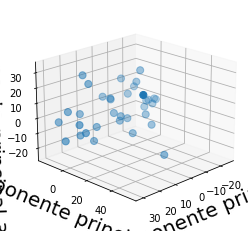

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#plt.figure()
#plt.figure(figsize=(10,10))
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=14)
#plt.zticks(fontsize=14)
#plt.xlabel('Componente principal-1',fontsize=20)
#plt.ylabel('Componente principal-2',fontsize=20)
#plt.zlabel('Componente principal-3',fontsize=20)
#plt.title("Análisis de componentes principales del conjunto de datos",fontsize=20)
#targets = ['Benigno', 'Maligno']
#colors = ['r', 'g']
#for target, color in zip(targets,colors):
 #   indicesToKeep = mama_dataset['Etiqueta'] == target
   # plt.scatter(principal_mama_Df.loc[indicesToKeep, 'Componente principal 1']
               # principal_mama_Df.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)
#plt.scatter(principal_dflog2_Final_DF[ 'Componente principal 1'],principal_dflog2_Final_DF['Componente principal 2'],principal_dflog2_Final_DF[ 'Componente principal 3'], s = 50)

ax.set_xlabel('Componente principal-1',fontsize=20)  
ax.set_ylabel('Componente principal-2',fontsize=20)  
ax.set_zlabel('Componente principal-3',fontsize=20)  
ax.view_init(elev=20, azim=45)
ax.scatter(principal_dflog2_Final_DF[ 'Componente principal 1'],principal_dflog2_Final_DF['Componente principal 2'],principal_dflog2_Final_DF[ 'Componente principal 3'], s = 50)



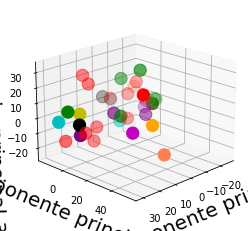

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#plt.figure()
#plt.figure(figsize=(10,10))
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=14)
#plt.zticks(fontsize=14)
#plt.xlabel('Componente principal-1',fontsize=20)
#plt.ylabel('Componente principal-2',fontsize=20)
#plt.zlabel('Componente principal-3',fontsize=20)
#plt.title("Análisis de componentes principales del conjunto de datos",fontsize=20)
#targets = ['Benigno', 'Maligno']
#colors = ['r', 'g']
#for target, color in zip(targets,colors):
 #   indicesToKeep = mama_dataset['Etiqueta'] == target
   # plt.scatter(principal_mama_Df.loc[indicesToKeep, 'Componente principal 1']
               # principal_mama_Df.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)
#plt.scatter(principal_dflog2_Final_DF[ 'Componente principal 1'],principal_dflog2_Final_DF['Componente principal 2'],principal_dflog2_Final_DF[ 'Componente principal 3'], s = 50)

ax.set_xlabel('Componente principal-1',fontsize=20)  
ax.set_ylabel('Componente principal-2',fontsize=20)  
ax.set_zlabel('Componente principal-3',fontsize=20)  
ax.view_init(elev=20, azim=45)
targets = ['no events', 'CRLF2--P2RY8','CRLF2_dup','CRLF2--P2RY8/+dup','CRLF2_dup/+mut','CRLF2--P2RY8/+mut',
           'other fusions','USP9X--DDX3X','CRLF2_mut','CRLF2--IGH/+mut']
colors = ['r', 'g', 'purple', 'c', 'm', 'y', 'k', 'coral', 'darkolivegreen', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = dflog2_Final['tipo'] == target
    ax.scatter(principal_dflog2_Final_DF.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DF.loc[indicesToKeep, 'Componente principal 2']
               , principal_dflog2_Final_DF.loc[indicesToKeep, 'Componente principal 3'], c = color, s = 150)
#ax.text(targets,prop={'size': 15})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

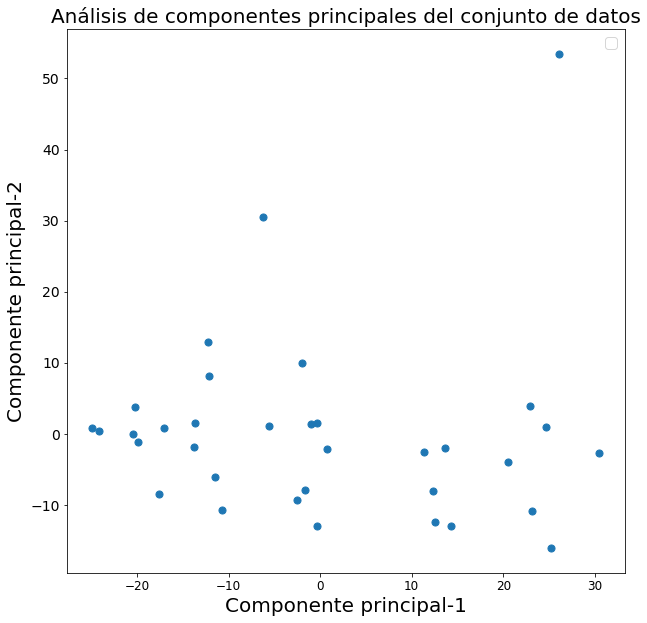

In [77]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal-1',fontsize=20)
plt.ylabel('Componente principal-2',fontsize=20)
plt.title("Análisis de componentes principales del conjunto de datos",fontsize=20)
#targets = ['Benigno', 'Maligno']
#colors = ['r', 'g']
#for target, color in zip(targets,colors):
 #   indicesToKeep = mama_dataset['Etiqueta'] == target
   # plt.scatter(principal_mama_Df.loc[indicesToKeep, 'Componente principal 1']
               # principal_mama_Df.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)
plt.scatter(principal_dflog2_Final_DF[ 'Componente principal 1'],principal_dflog2_Final_DF['Componente principal 2'], s = 50)

plt.legend(prop={'size': 15})

In [78]:
cont_tipos2= df_c03['tipo'].value_counts()#Contar los tipos
cont_tipos2# ver los nombres para poder plotear y asignar un color a los distintos puntos. 

tipo
no events            11
CRLF2--P2RY8          6
CRLF2_dup             4
CRLF2--P2RY8/+dup     3
CRLF2_dup/+mut        2
CRLF2--P2RY8/+mut     2
other fusions         2
USP9X--DDX3X          2
CRLF2_mut             1
CRLF2--IGH/+mut       1
Name: count, dtype: int64

<Figure size 432x288 with 0 Axes>

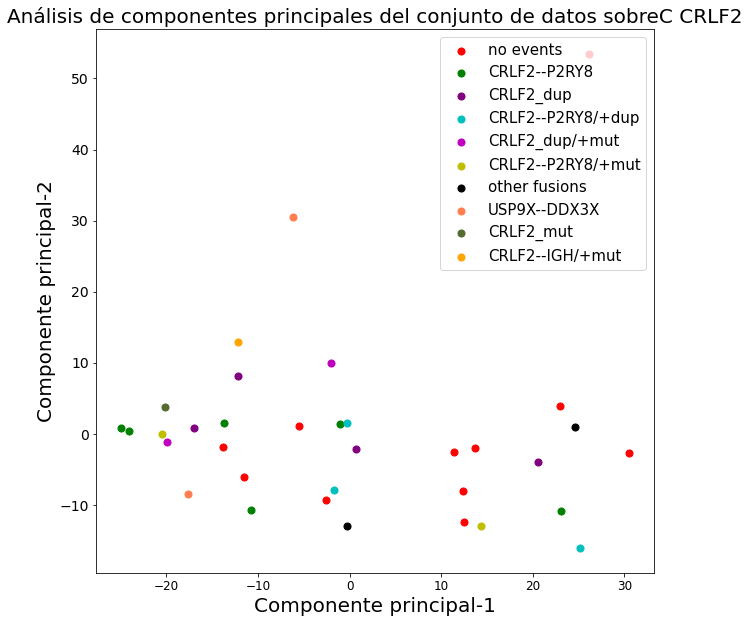

In [100]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal-1',fontsize=20)
plt.ylabel('Componente principal-2',fontsize=20)
plt.title("Análisis de componentes principales del conjunto de datos sobreC CRLF2",fontsize=20)
targets = ['no events', 'CRLF2--P2RY8','CRLF2_dup','CRLF2--P2RY8/+dup','CRLF2_dup/+mut','CRLF2--P2RY8/+mut',
           'other fusions','USP9X--DDX3X','CRLF2_mut','CRLF2--IGH/+mut']
colors = ['r', 'g', 'purple', 'c', 'm', 'y', 'k', 'coral', 'darkolivegreen', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = dflog2_Final['tipo'] == target
    plt.scatter(principal_dflog2_Final_DF.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DF.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

Nota: resolvi el error "Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match)". Al parecer solo era resetear los indices de las filas del dataframe "dflog2_Final" del 0 a n-1 para que coincidieran.

Usando TSNE

In [102]:
x_c= x.copy()
x_c

array([[-1.24249241, -2.28052992,  0.99713937, ...,  1.27153326,
         0.76654712,  0.53431088],
       [-1.1208342 , -1.24739115, -1.18817029, ...,  0.35672302,
        -0.71259702, -0.94036598],
       [ 0.74559821,  0.1955323 ,  1.49185249, ...,  1.20217567,
         0.57820315, -0.19239443],
       ...,
       [-0.37413675, -0.53489805,  0.07923532, ..., -0.49206087,
        -0.82003884, -0.94036598],
       [-0.83045516, -0.45746855, -1.18817029, ...,  0.53686019,
        -2.1009613 , -0.94036598],
       [ 1.28068876,  1.02906768, -0.19417463, ..., -1.15177757,
         1.55932655,  0.41124603]])

In [104]:
#usando  TSNE
from sklearn.manifold import TSNE

tsne= TSNE(n_components = 2, random_state = 42)
dflog2_Final_tsne= tsne.fit_transform(x_c)

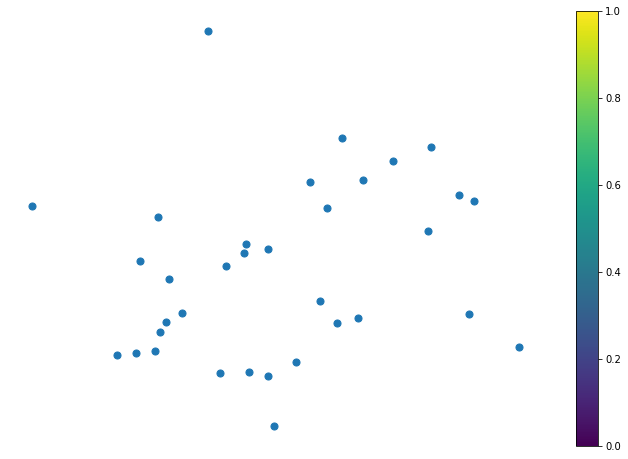

In [111]:
#veamos hasta donde llega tsne
plt.figure(figsize=(12,8))
plt.scatter(dflog2_Final_tsne[:,0], dflog2_Final_tsne[:,1], s = 50)
plt.axis('off')
plt.colorbar()
plt.show()

Trato de cambiar la palabras por numeros para poder graficar en tsne y ver el comportamiento ya que se ve un mejor patron que usando pca. 

In [ ]:
dflog2_Final_T=dflog2_Final.copy()
dflog2_Final_T

In [108]:
# Definir un diccionario de reemplazo
reemplazo = {'no events':0, 'CRLF2--P2RY8':0.1,'CRLF2_dup':0.2,'CRLF2--P2RY8/+dup':0.3,'CRLF2_dup/+mut':0.4,'CRLF2--P2RY8/+mut':0.5,
           'other fusions':1,'USP9X--DDX3X':0.6,'CRLF2_mut':0.7,'CRLF2--IGH/+mut':0.8}

# Aplicar el reemplazo utilizando la función replace()
dflog2_Final_T['tipo'] = dflog2_Final_T['tipo'].replace(reemplazo, regex=True)
dflog2_Final_T

Sample             tipo  Columna_1  Columna_2  Columna_3  Columna_4   
0   CA1396              0.2   0.865372   4.768020   2.856591   4.904675  \
1   CA1989              0.2   0.938796   5.590270   0.000000   4.775942   
2    CA920              0.2   2.065230   6.738658   3.503269   4.134901   
3    CA925              0.2   0.778751   6.412202   1.893689   4.730330   
4    CA871              0.2   0.731411   5.420694   0.000000   4.295459   
5    CA894              0.2   1.818770   7.189696   1.312171   5.620781   
6    CA918              0.7   1.492493   5.788084   3.684068   4.665352   
7   CA1366  CRLF2--IGH/+mut   1.103066   7.077751   1.524017   5.253043   
8   CA1658              0.1   2.113983   7.627496   1.727765   5.499988   
9   CA1889              0.1   2.168253   5.826955   4.121618   5.190047   
10  CA2054              0.1   1.124501   7.733219   3.589868   5.276895   
11  CA2246              0.1   2.627816   6.742049   0.811508   5.568177   
12  CA2255              0.1   1.808584   6.050434   1.722884   5.093885   
13   CA826              0.1   2.030859   6.934154   1.918543   4.503916   
14  CA1529              0.1   1.822028   6.480567   2.106591   5.392031   
15  CA1675              0.1   1.931050   7.146670   0.000000   5.756403   
16  CA2254              0.1   1.449556   5.221296   0.000000   4.844250   
17  CA1218              0.1   1.953154   6.694402   1.300845   5.050766   
18  CA2211              0.1   2.160328   7.033233   0.417716   5.783256   
19  CA1243                0   2.240548   7.627335   1.114594   4.841680   
20  CA1362                0   1.848907   5.803178   0.991966   4.887322   
21  CA1664                0   1.405800   6.743449   0.730929   5.028992   
22  CA1679                0   1.447629   6.962878   0.000000   4.573451   
23  CA1682                0   1.086040   6.453420   0.000000   5.369596   
24  CA1851                0   1.667599   5.698066   0.000000   5.741300   
25  CA2098                0   0.590675   6.225425   1.812418   4.979220   
26  CA2100                0   0.000000   6.546870   4.511998   3.954082   
27  CA2220                0   2.247520   7.471642   3.446897   5.247692   
28  CA2256                0   2.041327   6.264795   2.460110   5.059965   
29   CA867                0   2.081663   8.487229   1.698529   4.663486   
30  CA1082                1   2.384942   7.284855   0.592501   5.584924   
31  CA2106                1   1.389444   6.157326   1.656726   4.641994   
32  CA1371              0.6   1.114046   6.218951   0.000000   4.369098   
33  CA1614              0.6   2.388169   7.402049   1.299330   5.082838   

    Columna_5  Columna_6  Columna_7  Columna_8  ...  Columna_1403   
0    0.000000   6.593281   6.445244   4.359598  ...      0.000000  \
1    0.000000   5.869147   5.941914   3.807553  ...      1.298752   
2    0.000000   7.324846   6.132968   5.242604  ...      0.000000   
3    0.000000   6.885692   6.307100   5.262084  ...      2.039156   
4    0.000000   6.694859   6.035852   4.738450  ...      0.000000   
5    0.000000   7.388649   6.334604   6.376501  ...      1.167429   
6    0.000000   7.104465   6.618715   5.585067  ...      0.117883   
7    0.000000   7.090310   5.583681   5.257131  ...      1.574215   
8    0.000000   7.208719   6.477872   5.377383  ...      0.122293   
9    0.000000   7.042478   5.637700   5.419623  ...      0.110791   
10   0.000000   7.189175   6.147207   5.046678  ...      0.497295   
11   0.000000   7.525812   6.519955   5.143440  ...      0.130712   
12   0.521382   5.569420   6.888409   4.750344  ...      0.654032   
13   0.000000   7.050911   6.063581   5.137879  ...      0.356622   
14   0.000000   6.470573   5.951309   4.524913  ...      0.000000   
15   0.000000   7.553853   6.628208   4.969042  ...      1.167025   
16   0.000000   5.696976   6.598382   4.341591  ...      0.149461   
17   0.000000   7.183431   6.590062   5.948737  ...      0.334359   
18   0.463520   6.567048   6.417725   4.165013  ...      0.000000  

In [112]:
dflog2_Final_T['tipo'].value_counts()

tipo
0.1                11
0                  11
0.2                 6
1                   2
0.6                 2
0.7                 1
CRLF2--IGH/+mut     1
Name: count, dtype: int64

No hizo lo que queria asi que hasta aqui lo dejo, pero de haberlo hecho, se usa para poder asignar el color que va de 0 a 1 y poder graficar. 

Criterio 85% de la info. no sea 0

In [124]:
Caracteristicas1 = nuevo_dflog2_Final_PCA.columns
Caracteristicas1# asignando variable a las columnas 

Index(['Columna_1', 'Columna_2', 'Columna_4', 'Columna_6', 'Columna_7',
       'Columna_8', 'Columna_9', 'Columna_11', 'Columna_12', 'Columna_15',
       ...
       'Columna_1400', 'Columna_1401', 'Columna_1402', 'Columna_1404',
       'Columna_1405', 'Columna_1406', 'Columna_1408', 'Columna_1409',
       'Columna_1410', 'Columna_1411'],
      dtype='object', length=1103)

In [125]:
#Normalizando
x85 = nuevo_dflog2_Final.loc[:, Caracteristicas1].values
x85 = StandardScaler().fit_transform(x85) # Normalizando caract.
x85.shape

(34, 1103)

In [126]:
#Comprobando si los datos normalizados tienen una media de cero (.mean) y una desviación estándar de uno(.std).
np.mean(x85),np.std(x85)

(1.7490260864715016e-17, 1.0)

In [127]:
#Convierto las funciones normalizadas a un formato tabular
Caract_cols = ['Caracteristica'+str(i) for i in range(x85.shape[1])]
dflog2_Final_normalizado85 = pd.DataFrame(x85,columns=Caract_cols)
dflog2_Final_normalizado85

Caracteristica0  Caracteristica1  Caracteristica2  Caracteristica3   
0         -1.242492        -2.280530        -0.229013        -0.144525  \
1         -1.120834        -1.247391        -0.506923        -1.271216   
2          0.745598         0.195532        -1.890815         0.993726   
3         -1.386018        -0.214652        -0.605390         0.310440   
4         -1.464458        -1.460460        -1.544198         0.013521   
5          0.337229         0.762251         1.316932         1.092999   
6         -0.203392        -0.998843        -0.745666         0.650832   
7         -0.848649         0.621595         0.523051         0.628809   
8          0.826379         1.312336         1.056161         0.813042   
9          0.916302        -0.950002         0.387055         0.554387   
10        -0.813132         1.445176         0.574543         0.782634   
11         1.677769         0.199793         1.203368         1.306413   
12         0.320352        -0.669206         0.179459        -1.737565   
13         0.688648         0.441168        -1.094179         0.567508   
14         0.342628        -0.128753         0.823101        -0.335448   
15         0.523271         0.708190         1.609716         1.350041   
16        -0.274536        -1.710999        -0.359458        -1.539100   
17         0.559895         0.139926         0.086372         0.773696   
18         0.903170         0.565659         1.667685        -0.185343   
19         1.036090         1.312134        -0.365007         0.798709   
20         0.387164        -0.979877        -0.266474         0.696398   
21        -0.347036         0.201552         0.039367        -0.074656   
22        -0.277728         0.477259        -0.944064        -1.131761   
23        -0.876859        -0.162863         0.774668        -2.662549   
24         0.086749        -1.111948         1.577110        -0.124734   
25        -1.697649        -0.449333        -0.068082        -1.351309   
26        -2.676361        -0.045445        -2.281170        -0.013167   
27         1.047643         1.116510         0.511500         0.860816   
28         0.705992        -0.399866         0.106231        -0.626052   
29         0.772827         2.392571        -0.749695        -1.202480   
30         1.275341         0.881816         1.239522         0.415294   
31        -0.374137        -0.534898        -0.796093        -1.610339   
32        -0.830455        -0.457469        -1.385225         0.829878   
33         1.280689         1.029068         0.155610         0.571104   

    Caracteristica4  Caracteristica5  Caracteristica6  Caracteristica7   
0          0.372873        -0.869086         0.179605        -0.968847  \
1         -0.401851        -1.719217        -0.015602        -1.442864   
2         -0.107781         0.490713        -0.810735        -0.216800   
3          0.160242         0.520712        -1.117905        -0.271995   
4         -0.257262        -0.285666        -0.991711        -0.783241   
5          0.202576         2.236877         0.361446         1.689992   
6          0.639880         1.018095        -0.442051         0.837693   
7         -0.953245         0.513084        -0.761672         0.067046   
8          0.423094         0.698268        -0.409088         0.483294   
9         -0.870098         0.763317        -0.433323        -0.684442   
10        -0.085865         0.188994        -0.153936        -1.268122   
11         0.487869         0.338004        -0.416120        -0.254494   
12         1.054993        -0.267351         0.519196        -0.087133   
13        -0.214583         0.329440         0.748365        -0.367081   
14        -0.387391        -0.614507         0.517001        -0.749592   
15         0.654491         0.069437        -0.168359         0.601418   
16         0.608584        -0.896816         0.652474         1.054208   
17         0.595777         1.578135         0.047771         0.659460   
18     

In [128]:
pca_dflog2_Final85 = PCA(n_components=2)
principalComponents_dflog2_Final85 = pca_dflog2_Final85.fit_transform(x85)

In [129]:
#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
principal_dflog2_Final_DF85 = pd.DataFrame(data = principalComponents_dflog2_Final85
            , columns = ['Componente principal 1', 'Componente principal 2'])

In [130]:
principal_dflog2_Final_DF85

Componente principal 1  Componente principal 2
0                 0.611476               -1.044602
1                21.165910                1.537360
2               -16.042681                0.841168
3               -11.451447                9.149484
4                -0.957020               15.082222
5               -18.840820               -1.189456
6               -19.562529                3.365294
7               -11.612854               15.813568
8               -11.274766              -16.475412
9               -24.624624               -0.612054
10              -13.965555               -3.528360
11              -23.314265               -1.226059
12               20.414398              -10.824775
13                0.135559                4.311568
14               -0.214600               -7.632384
15                0.576852                4.318866
16               26.127362              -12.429451
17              -19.963866               -1.515321
18               13.372574              -10.237513
19              -13.626848               -5.480380
20              -11.594538               -8.499535
21               -4.845438                3.501804
22               12.906481              -11.809788
23               30.883780                3.646783
24               15.190771                5.224350
25               12.098736                0.231330
26               16.380791               29.546297
27               -2.021574              -11.261576
28               20.015633                6.974215
29               13.453004              -16.936144
30                0.821847              -12.590394
31               22.356571                3.800547
32               -5.488373               38.640697
33              -17.109949              -12.692347

In [131]:
print('Variación explicada por componente principal: {}'.format(pca_dflog2_Final85.explained_variance_ratio_))

Variación explicada por componente principal: [0.22340362 0.1278675 ]


22.3+12.7=35% de la informacion se mantiene por lo que 65% se pierde. 

<Figure size 432x288 with 0 Axes>

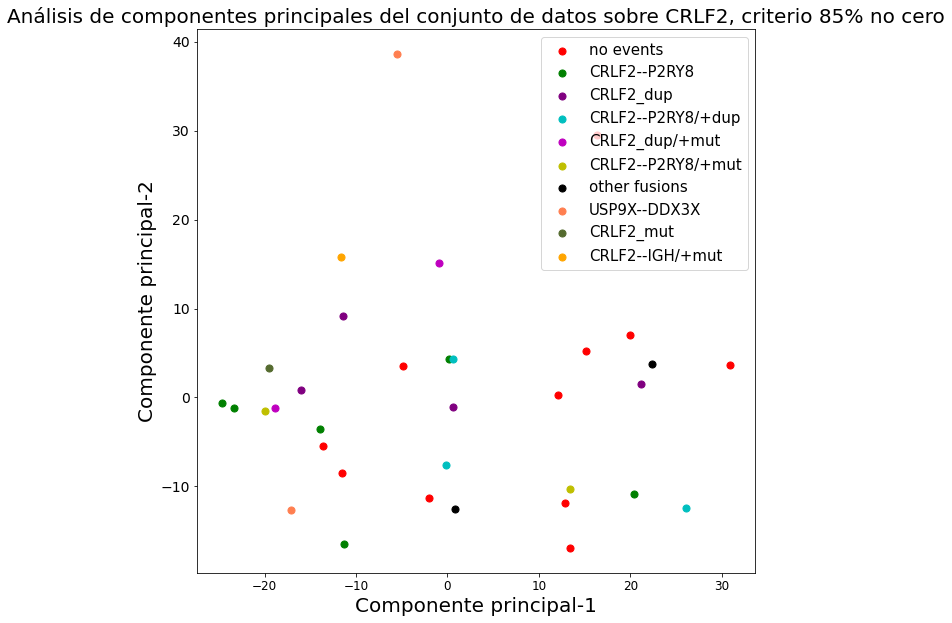

In [132]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal-1',fontsize=20)
plt.ylabel('Componente principal-2',fontsize=20)
plt.title("Análisis de componentes principales del conjunto de datos sobre CRLF2, criterio 85% no cero",fontsize=20)
targets = ['no events', 'CRLF2--P2RY8','CRLF2_dup','CRLF2--P2RY8/+dup','CRLF2_dup/+mut','CRLF2--P2RY8/+mut',
           'other fusions','USP9X--DDX3X','CRLF2_mut','CRLF2--IGH/+mut']
colors = ['r', 'g', 'purple', 'c', 'm', 'y', 'k', 'coral', 'darkolivegreen', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = nuevo_dflog2_Final['tipo'] == target
    plt.scatter(principal_dflog2_Final_DF85.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DF85.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

**Analisis con el filtro de la prueba SW**

In [73]:
dfSW

Columna_1  Columna_2  Columna_4  Columna_8  Columna_11  Columna_12   
197   0.865372   4.768020   4.904675   4.359598    5.989650    5.145306  \
198   0.938796   5.590270   4.775942   3.807553    5.800389    4.679962   
199   2.065230   6.738658   4.134901   5.242604    6.289921    5.951512   
200   0.778751   6.412202   4.730330   5.262084    6.267883    5.719682   
201   0.731411   5.420694   4.295459   4.738450    6.063757    5.649555   
202   1.818770   7.189696   5.620781   6.376501    7.051249    6.156487   
203   1.492493   5.788084   4.665352   5.585067    6.710951    6.915694   
204   1.103066   7.077751   5.253043   5.257131    6.403253    5.890046   
205   2.113983   7.627496   5.499988   5.377383    6.569449    5.909232   
206   2.168253   5.826955   5.190047   5.419623    6.103205    6.032597   
207   1.124501   7.733219   5.276895   5.046678    5.870158    6.267819   
208   2.627816   6.742049   5.568177   5.143440    6.274871    5.987913   
209   1.808584   6.050434   5.093885   4.750344    6.341694    5.853782   
210   2.030859   6.934154   4.503916   5.137879    6.229918    5.539933   
211   1.822028   6.480567   5.392031   4.524913    6.077193    5.799932   
212   1.931050   7.146670   5.756403   4.969042    6.616613    5.914111   
213   1.449556   5.221296   4.844250   4.341591    6.797399    5.072702   
214   1.953154   6.694402   5.050766   5.948737    6.639787    6.449549   
215   2.160328   7.033233   5.783256   4.165013    7.015479    6.221897   
216   2.240548   7.627335   4.841680   5.228276    6.459425    6.036858   
217   1.848907   5.803178   4.887322   5.360907    6.356557    5.853182   
218   1.405800   6.743449   5.028992   4.494206    6.064174    6.278653   
219   1.447629   6.962878   4.573451   5.037550    6.694951    5.206273   
220   1.086040   6.453420   5.369596   3.817728    6.344508    4.607988   
221   1.667599   5.698066   5.741300   4.491553    5.935888    5.138442   
222   0.590675   6.225425   4.979220   4.175983    6.173223    5.619549   
223   0.000000   6.546870   3.954082   5.724444    6.226602    5.745487   
224   2.247520   7.471642   5.247692   6.087125    7.386310    6.586649   
225   2.041327   6.264795   5.059965   3.708609    5.864191    5.238498   
226   2.081663   8.487229   4.663486   4.178313    6.690067    5.174408   
227   2.384942   7.284855   5.584924   5.109611    7.011250    6.038062   
228   1.389444   6.157326   4.641994   4.342997    5.959649    5.489256   
229   1.114046   6.218951   4.369098   4.759992    5.712214    5.898274   
230   2.388169   7.402049   5.082838   5.443443    6.808609    5.612734   

     Columna_16  Columna_17  Columna_18  Columna_19  ...  Columna_1395   
197    1.005535    5.144286    5.617200    5.166117  ...      4.275436  \
198    1.370901    4.844604    4.929006    5.082056  ...      5.085297   
199    1.671881    4.618905    6.096898    5.919345  ...      5.604636   
200    0.201427    3.961373    5.786026    5.610610  ...      4.938251   
201    0.559947    4.104290    5.286963    5.706063  ...      5.108222   
202    1.309492    5.466548    6.391314    6.354740  ...      5.256328   
203    0.866251    4.370437    6.072627    5.684161  ...      5.406324   
204    1.005016    3.972422    5.733742    5.516155  ...      5.110770   
205    0.251116    5.258875    5.907093    5.971752  ...      5.725423   
206    0.345469    4.504803    5.709725    5.834322  ...      5.378602   
207    0.847541    5.023124    6.024428    5.756195  ...      5.045062   
208    0.478837    4.924206    6.283819    5.900530  ...      5.093051   
209    1.188666    5.133867    5.330581    5.442214  ...      4.712939   
210    0.820326    4.979365    5.356298    5.904410  ...      5.972636   
211    1.022897    4.820943    5.482554    5.445348  ...      5.028482   
212    0.856464    5.186944    6.203634    5.825879  ...      4.904274   
213    1.080200    5.782168    5.615836    5.213418  ...      5.891503   
214    0.809244    4.863750    5.551676    5.77

In [74]:
nuevo_dflog2_Final

Sample               tipo  Columna_1  Columna_2  Columna_4  Columna_6   
0   CA1396          CRLF2_dup   0.865372   4.768020   4.904675   6.593281  \
1   CA1989          CRLF2_dup   0.938796   5.590270   4.775942   5.869147   
2    CA920          CRLF2_dup   2.065230   6.738658   4.134901   7.324846   
3    CA925          CRLF2_dup   0.778751   6.412202   4.730330   6.885692   
4    CA871     CRLF2_dup/+mut   0.731411   5.420694   4.295459   6.694859   
5    CA894     CRLF2_dup/+mut   1.818770   7.189696   5.620781   7.388649   
6    CA918          CRLF2_mut   1.492493   5.788084   4.665352   7.104465   
7   CA1366    CRLF2--IGH/+mut   1.103066   7.077751   5.253043   7.090310   
8   CA1658       CRLF2--P2RY8   2.113983   7.627496   5.499988   7.208719   
9   CA1889       CRLF2--P2RY8   2.168253   5.826955   5.190047   7.042478   
10  CA2054       CRLF2--P2RY8   1.124501   7.733219   5.276895   7.189175   
11  CA2246       CRLF2--P2RY8   2.627816   6.742049   5.568177   7.525812   
12  CA2255       CRLF2--P2RY8   1.808584   6.050434   5.093885   5.569420   
13   CA826       CRLF2--P2RY8   2.030859   6.934154   4.503916   7.050911   
14  CA1529  CRLF2--P2RY8/+dup   1.822028   6.480567   5.392031   6.470573   
15  CA1675  CRLF2--P2RY8/+dup   1.931050   7.146670   5.756403   7.553853   
16  CA2254  CRLF2--P2RY8/+dup   1.449556   5.221296   4.844250   5.696976   
17  CA1218  CRLF2--P2RY8/+mut   1.953154   6.694402   5.050766   7.183431   
18  CA2211  CRLF2--P2RY8/+mut   2.160328   7.033233   5.783256   6.567048   
19  CA1243          no events   2.240548   7.627335   4.841680   7.199507   
20  CA1362          no events   1.848907   5.803178   4.887322   7.133751   
21  CA1664          no events   1.405800   6.743449   5.028992   6.638187   
22  CA1679          no events   1.447629   6.962878   4.573451   5.958776   
23  CA1682          no events   1.086040   6.453420   5.369596   4.974925   
24  CA1851          no events   1.667599   5.698066   5.741300   6.606001   
25  CA2098          no events   0.590675   6.225425   4.979220   5.817671   
26  CA2100          no events   0.000000   6.546870   3.954082   6.677707   
27  CA2220          no events   2.247520   7.471642   5.247692   7.239423   
28  CA2256          no events   2.041327   6.264795   5.059965   6.283800   
29   CA867          no events   2.081663   8.487229   4.663486   5.913325   
30  CA1082      other fusions   2.384942   7.284855   5.584924   6.953082   
31  CA2106      other fusions   1.389444   6.157326   4.641994   5.651190   
32  CA1371       USP9X--DDX3X   1.114046   6.218951   4.369098   7.219540   
33  CA1614       USP9X--DDX3X   2.388169   7.402049   5.082838   7.053223   

    Columna_7  Columna_8  Columna_9  Columna_11  ...  Columna_1400   
0    6.445244   4.359598   4.539276    5.989650  ...      5.350269  \
1    5.941914   3.807553   4.356101    5.800389  ...      5.078886   
2    6.132968   5.242604   3.609980    6.289921  ...      5.661738   
3    6.307100   5.262084   3.321743    6.267883  ...      5.627038   
4    6.035852   4.738450   3.440158    6.063757  ...      5.562300   
5    6.334604   6.376501   4.709909    7.051249  ...      5.948299   
6    6.618715   5.585067   3.955938    6.710951  ...      5.857710   
7    5.583681   5.257131   3.656018    6.403253  ...      5.248949   
8    6.477872   5.377383   3.986869    6.569449  ...      5.857290   
9    5.637700   5.419623   3.964128    6.103205  ...      6.008258   
10   6.147207   5.046678   4.226293    5.870158  ...      5.533635   
11   6.519955   5.143440   3.980270    6.274871  ...      5.932020   
12   6.888409   4.750344   4.857935    6.341694  ...      5.846991   
13   6.063581   5.137879   5.072978    6.229918  ...      5.277972   
14   5.951309   4.524913   4.855874    6.077193  ...      5.842399   
15   6.628208   4.969042   4.212760    6.616613  ...      5.354272   
16   6.598382   4.341591   4.982997    6.797399  ...      5.026161   
17   6.590062   5.948737   4.415568    6.639787 

In [75]:
Caracteristicas = dfSW.columns
Caracteristicas# asignando variable a las columnas 

Index(['Columna_1', 'Columna_2', 'Columna_4', 'Columna_8', 'Columna_11',
       'Columna_12', 'Columna_16', 'Columna_17', 'Columna_18', 'Columna_19',
       ...
       'Columna_1395', 'Columna_1396', 'Columna_1397', 'Columna_1401',
       'Columna_1402', 'Columna_1404', 'Columna_1406', 'Columna_1408',
       'Columna_1410', 'Columna_1411'],
      dtype='object', length=793)

In [76]:
#Normalizando, N de normalidad en la distribucion
xND = nuevo_dflog2_Final.loc[:, Caracteristicas].values
xND = StandardScaler().fit_transform(xND) # Normalizando caract.
xND.shape

(34, 793)

In [77]:
#Comprobando si los datos normalizados tienen una media de cero (.mean) y una desviación estándar de uno(.std).
np.mean(xND),np.std(xND)

(2.1873394803088908e-17, 0.9999999999999999)

In [78]:
#Convierto las funciones normalizadas a un formato tabular
Caract_cols = ['Caracteristica'+str(i) for i in range(xND.shape[1])]
dflog2_Final_normalizadoND = pd.DataFrame(xND,columns=Caract_cols)
dflog2_Final_normalizadoND

Caracteristica0  Caracteristica1  Caracteristica2  Caracteristica3   
0         -1.242492        -2.280530        -0.229013        -0.869086  \
1         -1.120834        -1.247391        -0.506923        -1.719217   
2          0.745598         0.195532        -1.890815         0.490713   
3         -1.386018        -0.214652        -0.605390         0.520712   
4         -1.464458        -1.460460        -1.544198        -0.285666   
5          0.337229         0.762251         1.316932         2.236877   
6         -0.203392        -0.998843        -0.745666         1.018095   
7         -0.848649         0.621595         0.523051         0.513084   
8          0.826379         1.312336         1.056161         0.698268   
9          0.916302        -0.950002         0.387055         0.763317   
10        -0.813132         1.445176         0.574543         0.188994   
11         1.677769         0.199793         1.203368         0.338004   
12         0.320352        -0.669206         0.179459        -0.267351   
13         0.688648         0.441168        -1.094179         0.329440   
14         0.342628        -0.128753         0.823101        -0.614507   
15         0.523271         0.708190         1.609716         0.069437   
16        -0.274536        -1.710999        -0.359458        -0.896816   
17         0.559895         0.139926         0.086372         1.578135   
18         0.903170         0.565659         1.667685        -1.168741   
19         1.036090         1.312134        -0.365007         0.468649   
20         0.387164        -0.979877        -0.266474         0.672896   
21        -0.347036         0.201552         0.039367        -0.661794   
22        -0.277728         0.477259        -0.944064         0.174937   
23        -0.876859        -0.162863         0.774668        -1.703549   
24         0.086749        -1.111948         1.577110        -0.665879   
25        -1.697649        -0.449333        -0.068082        -1.151848   
26        -2.676361        -0.045445        -2.281170         1.232732   
27         1.047643         1.116510         0.511500         1.791247   
28         0.705992        -0.399866         0.106231        -1.871589   
29         0.772827         2.392571        -0.749695        -1.148259   
30         1.275341         0.881816         1.239522         0.285909   
31        -0.374137        -0.534898        -0.796093        -0.894651   
32        -0.830455        -0.457469        -1.385225        -0.252493   
33         1.280689         1.029068         0.155610         0.799999   

    Caracteristica4  Caracteristica5  Caracteristica6  Caracteristica7   
0         -0.968847        -1.210308         0.063409         0.367831  \
1         -1.442864        -2.133530         0.639576        -0.088379   
2         -0.216800         0.389170         1.114208        -0.431964   
3         -0.271995        -0.070771        -1.204636        -1.432937   
4         -0.783241        -0.209900        -0.639265        -1.215372   
5          1.689992         0.795832         0.542735         0.858417   
6          0.837693         2.302065        -0.156236        -0.810212   
7          0.067046         0.267224         0.062590        -1.416118   
8          0.483294         0.305287        -1.126278         0.542272   
9         -0.684442         0.550039        -0.977488        -0.605665   
10        -1.268122         1.016709        -0.185742         0.183384   
11        -0.254494         0.461388        -0.767172         0.032799   
12        -0.087133         0.195277         0.352199         0.351971   
13        -0.367081        -0.427385        -0.228658         0.116769   
14        -0.749592         0.088441         0.090788        -0.124400   
15         0.601418         0.314968        -0.171670         0.432771   
16         1.054208        -1.354351         0.181153         1.338891   
17         0.659460         1.377254        -0.246133        -0.059233   
18     

In [107]:
pca_dflog2_FinalND = PCA(n_components=2)
principalComponents_dflog2_FinalND = pca_dflog2_FinalND.fit_transform(xND)

In [108]:
#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
principal_dflog2_Final_DFND = pd.DataFrame(data = principalComponents_dflog2_FinalND
            , columns = ['Componente principal 1', 'Componente principal 2'])

In [109]:
principal_dflog2_Final_DFND

Componente principal 1  Componente principal 2
0                 0.785970                0.519024
1                20.085345                3.799431
2               -14.091387                0.801565
3               -10.325773                7.999744
4                 0.010840               14.473813
5               -16.263180               -0.920295
6               -17.252081                2.706602
7               -10.371854               14.987449
8                -9.441403              -16.856406
9               -21.438770               -0.746171
10              -13.967828               -5.012629
11              -20.883103               -1.842454
12               18.504375               -8.888018
13                0.693017                6.431706
14                0.710619               -5.396544
15                1.438426                4.360248
16               24.682160               -8.797808
17              -17.912049               -0.790216
18               13.536671               -8.516762
19              -12.828334               -6.804373
20              -10.022979               -8.518398
21               -3.839315                3.867514
22               10.622803               -8.296895
23               27.219279                4.696270
24               14.058836                7.393767
25               11.788421                0.253952
26                6.448681               10.572753
27               -0.803033              -11.527083
28               17.892809                6.407141
29                9.873749              -11.715511
30                2.073441              -11.815444
31               19.845476                4.460983
32               -6.557604               35.736380
33              -14.272224              -13.023333

In [110]:
print('Variación explicada por componente principal: {}'.format(pca_dflog2_FinalND.explained_variance_ratio_))

Variación explicada por componente principal: [0.24451019 0.12842204]


In [111]:
24.45+12.84

37.29

37.29% DE INFORMACION SE RESCATO UTILIZANDO PCA EN 2 DIMENSIONES. Procedemos a plotear

**Pruba de independencia lineal**

Primera prueba: En este ejemplo, la descomposición QR se utiliza para verificar la independencia lineal de las columnas. Si todas las diagonales de la matriz R (obtenida en la descomposición QR) son mayores que un umbral pequeño (en este caso, 1e-10), entonces las columnas son linealmente independientes.

In [85]:
from scipy.linalg import qr

# Convierte el DataFrame en una matriz NumPy
matrix = principal_dflog2_Final_DFND.to_numpy()

# Aplica la descomposición QR
q, r = qr(matrix, mode='economic')

# Comprueba si las columnas son linealmente independientes
if np.all(np.abs(np.diagonal(r)) > 1e-10):
    print("Las columnas son linealmente independientes.")
else:
    print("Las columnas son linealmente dependientes.")
    

Las columnas son linealmente independientes.


In [87]:
#segunda prueba
# Calcula el rango de la matriz
rango = np.linalg.matrix_rank(matrix)

# Comprueba si las columnas son linealmente independientes
if rango == min(matrix.shape):
    print("Las columnas son linealmente independientes.")
else:
    print("Las columnas son linealmente dependientes.")
# Luego, comparamos el rango con el número mínimo de filas y columnas en la matriz para determinar si las columnas son linealmente independientes. 
#Si el rango es igual al número mínimo de filas y columnas, entonces las columnas son linealmente independientes.

Las columnas son linealmente independientes.


<Figure size 432x288 with 0 Axes>

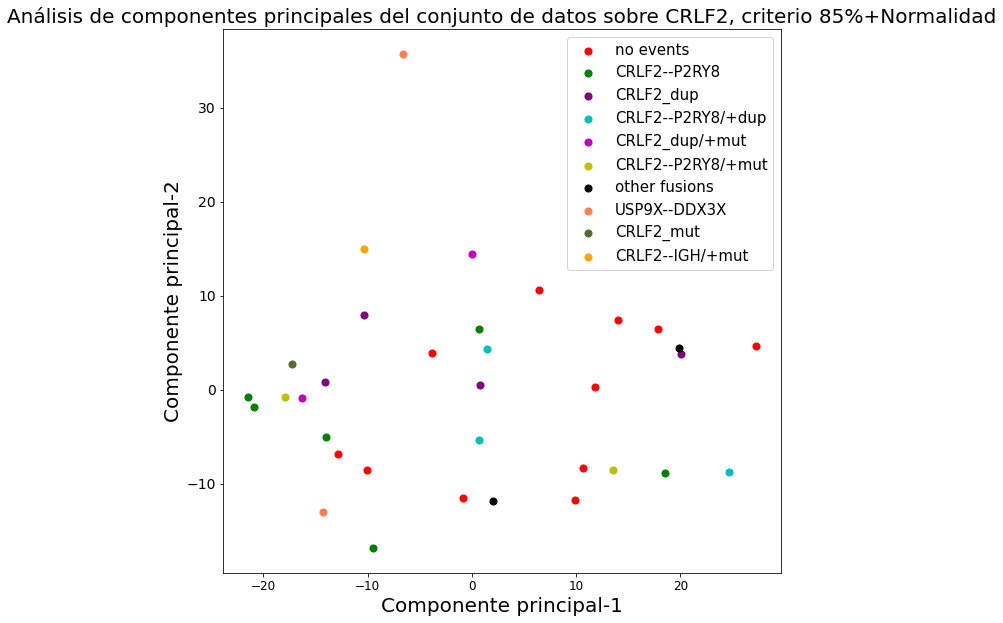

In [112]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal-1',fontsize=20)
plt.ylabel('Componente principal-2',fontsize=20)
plt.title("Análisis de componentes principales del conjunto de datos sobre CRLF2, criterio 85%+Normalidad",fontsize=20)
targets = ['no events', 'CRLF2--P2RY8','CRLF2_dup','CRLF2--P2RY8/+dup','CRLF2_dup/+mut','CRLF2--P2RY8/+mut',
           'other fusions','USP9X--DDX3X','CRLF2_mut','CRLF2--IGH/+mut']
colors = ['r', 'g', 'purple', 'c', 'm', 'y', 'k', 'coral', 'darkolivegreen', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = nuevo_dflog2_Final['tipo'] == target
    plt.scatter(principal_dflog2_Final_DFND.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DFND.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

Comparando con el criterio 85 sin quitar columnas que no tenian una distribucion normal hay ligeros cambios

<Figure size 432x288 with 0 Axes>

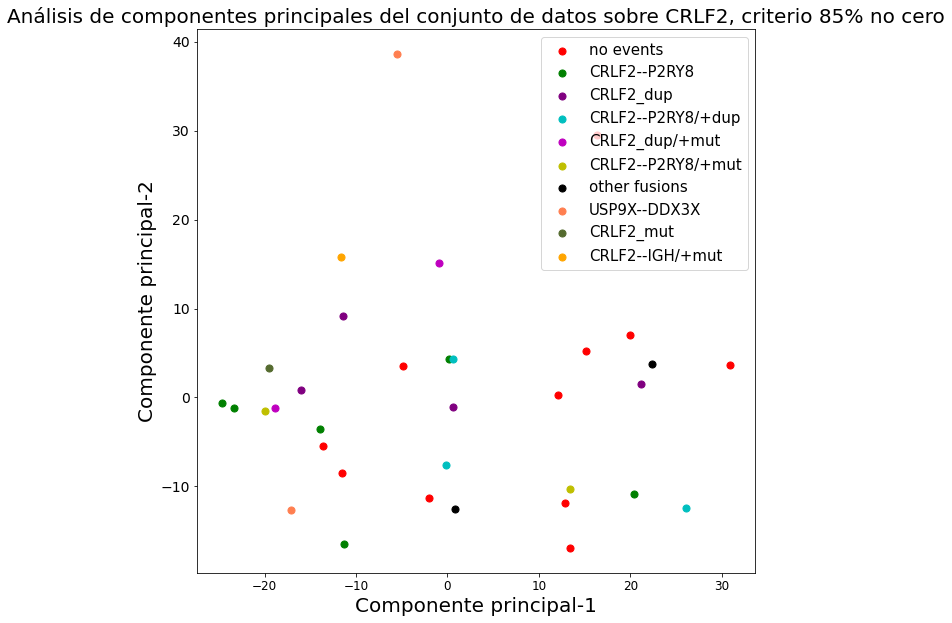

In [133]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal-1',fontsize=20)
plt.ylabel('Componente principal-2',fontsize=20)
plt.title("Análisis de componentes principales del conjunto de datos sobre CRLF2, criterio 85% no cero",fontsize=20)
targets = ['no events', 'CRLF2--P2RY8','CRLF2_dup','CRLF2--P2RY8/+dup','CRLF2_dup/+mut','CRLF2--P2RY8/+mut',
           'other fusions','USP9X--DDX3X','CRLF2_mut','CRLF2--IGH/+mut']
colors = ['r', 'g', 'purple', 'c', 'm', 'y', 'k', 'coral', 'darkolivegreen', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = nuevo_dflog2_Final['tipo'] == target
    plt.scatter(principal_dflog2_Final_DF85.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DF85.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

Para n=3 se tiene usando ND

In [138]:
pca_dflog2_FinalND3 = PCA(n_components=3)#3 DIMENSIONES
principalComponents_dflog2_FinalND3 = pca_dflog2_FinalND3.fit_transform(xND)

In [139]:
#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
principal_dflog2_Final_DFND3 = pd.DataFrame(data = principalComponents_dflog2_FinalND3
             , columns = ['Componente principal 1', 'Componente principal 2','Componente principal 3'])

In [140]:
principal_dflog2_Final_DFND3

Componente principal 1  Componente principal 2  Componente principal 3
0                 0.785970                0.519014               -5.460293
1                20.085345                3.799410               -4.765771
2               -14.091387                0.801576               -4.552786
3               -10.325773                7.999757                2.865443
4                 0.010840               14.473804               -5.921250
5               -16.263180               -0.920282               -5.892572
6               -17.252081                2.706585               -4.252246
7               -10.371854               14.987470                0.986681
8                -9.441403              -16.856383                4.635334
9               -21.438770               -0.746183               -4.237628
10              -13.967828               -5.012636               14.587350
11              -20.883103               -1.842448               -3.582764
12               18.504375               -8.888016               -4.588342
13                0.693017                6.431687               -1.525134
14                0.710619               -5.396555               -0.179107
15                1.438426                4.360273               -1.491329
16               24.682160               -8.797789              -10.461720
17              -17.912049               -0.790230               -3.347802
18               13.536671               -8.516754               -7.494548
19              -12.828334               -6.804383                6.099600
20              -10.022979               -8.518414               -1.762396
21               -3.839315                3.867498               -3.899751
22               10.622803               -8.296905               14.829649
23               27.219279                4.696289               -0.133785
24               14.058836                7.393737              -11.894004
25               11.788421                0.253956               -3.355161
26                6.448681               10.572751               26.294920
27               -0.803033              -11.527073               -3.621610
28               17.892809                6.407175                0.339705
29                9.873749              -11.715511               19.461303
30                2.073441              -11.815444               -4.765393
31               19.845476                4.460949                5.689387
32               -6.557604               35.736395                2.723728
33              -14.272224              -13.023316               -1.327707

In [141]:
print('Variación explicada por componente principal, 3 dimensiones: {}'.format(pca_dflog2_FinalND3.explained_variance_ratio_))

Variación explicada por componente principal: [0.24451019 0.12842204 0.08210335]


In [142]:
(.24451019+ 0.12842204+ 0.08210335)*100

45.503558

45.5% de la info se rescata. **Ahora para 4 dimensiones**

In [143]:
pca_dflog2_FinalND4 = PCA(n_components=4)#4 DIMENSIONES
principalComponents_dflog2_FinalND4 = pca_dflog2_FinalND4.fit_transform(xND)

In [145]:
#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
principal_dflog2_Final_DFND4 = pd.DataFrame(data = principalComponents_dflog2_FinalND4
             , columns = ['Componente principal 1', 'Componente principal 2','Componente principal 3', 'Componente principal 4'])

In [146]:
print('Variación explicada por componente principal, 4 dimensiones: {}'.format(pca_dflog2_FinalND4.explained_variance_ratio_))

Variación explicada por componente principal, 4 dimensiones: [0.24451019 0.12842203 0.08210329 0.05919766]


In [147]:
(0.24451019+ 0.12842203 +0.08210329 +0.05919766)*100

51.423317000000004

51.42% de info se rescata en 4 dimensiones

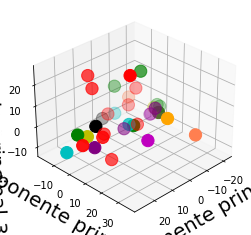

In [158]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#plt.figure()
#plt.figure(figsize=(10,10))
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=14)
#plt.zticks(fontsize=14)
#plt.xlabel('Componente principal-1',fontsize=20)
#plt.ylabel('Componente principal-2',fontsize=20)
#plt.zlabel('Componente principal-3',fontsize=20)
#plt.title("Análisis de componentes principales del conjunto de datos",fontsize=20)
#targets = ['Benigno', 'Maligno']
#colors = ['r', 'g']
#for target, color in zip(targets,colors):
 #   indicesToKeep = mama_dataset['Etiqueta'] == target
   # plt.scatter(principal_mama_Df.loc[indicesToKeep, 'Componente principal 1']
               # principal_mama_Df.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)
#plt.scatter(principal_dflog2_Final_DF[ 'Componente principal 1'],principal_dflog2_Final_DF['Componente principal 2'],principal_dflog2_Final_DF[ 'Componente principal 3'], s = 50)

ax.set_xlabel('Componente principal-1',fontsize=20)  
ax.set_ylabel('Componente principal-2',fontsize=20)  
ax.set_zlabel('Componente principal-3',fontsize=20)  
ax.view_init(elev=30, azim=45)
targets = ['no events', 'CRLF2--P2RY8','CRLF2_dup','CRLF2--P2RY8/+dup','CRLF2_dup/+mut','CRLF2--P2RY8/+mut',
           'other fusions','USP9X--DDX3X','CRLF2_mut','CRLF2--IGH/+mut']
colors = ['r', 'g', 'purple', 'c', 'm', 'y', 'k', 'coral', 'darkolivegreen', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = dflog2_Final['tipo'] == target
    ax.scatter(principal_dflog2_Final_DFND3.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DFND3.loc[indicesToKeep, 'Componente principal 2']
               , principal_dflog2_Final_DFND3.loc[indicesToKeep, 'Componente principal 3'], c = color, s = 150)
#ax.text(targets,prop={'size': 15})

**Usando isomap**

In [91]:
dfSW

Columna_1  Columna_2  Columna_4  Columna_8  Columna_11  Columna_12   
197   0.865372   4.768020   4.904675   4.359598    5.989650    5.145306  \
198   0.938796   5.590270   4.775942   3.807553    5.800389    4.679962   
199   2.065230   6.738658   4.134901   5.242604    6.289921    5.951512   
200   0.778751   6.412202   4.730330   5.262084    6.267883    5.719682   
201   0.731411   5.420694   4.295459   4.738450    6.063757    5.649555   
202   1.818770   7.189696   5.620781   6.376501    7.051249    6.156487   
203   1.492493   5.788084   4.665352   5.585067    6.710951    6.915694   
204   1.103066   7.077751   5.253043   5.257131    6.403253    5.890046   
205   2.113983   7.627496   5.499988   5.377383    6.569449    5.909232   
206   2.168253   5.826955   5.190047   5.419623    6.103205    6.032597   
207   1.124501   7.733219   5.276895   5.046678    5.870158    6.267819   
208   2.627816   6.742049   5.568177   5.143440    6.274871    5.987913   
209   1.808584   6.050434   5.093885   4.750344    6.341694    5.853782   
210   2.030859   6.934154   4.503916   5.137879    6.229918    5.539933   
211   1.822028   6.480567   5.392031   4.524913    6.077193    5.799932   
212   1.931050   7.146670   5.756403   4.969042    6.616613    5.914111   
213   1.449556   5.221296   4.844250   4.341591    6.797399    5.072702   
214   1.953154   6.694402   5.050766   5.948737    6.639787    6.449549   
215   2.160328   7.033233   5.783256   4.165013    7.015479    6.221897   
216   2.240548   7.627335   4.841680   5.228276    6.459425    6.036858   
217   1.848907   5.803178   4.887322   5.360907    6.356557    5.853182   
218   1.405800   6.743449   5.028992   4.494206    6.064174    6.278653   
219   1.447629   6.962878   4.573451   5.037550    6.694951    5.206273   
220   1.086040   6.453420   5.369596   3.817728    6.344508    4.607988   
221   1.667599   5.698066   5.741300   4.491553    5.935888    5.138442   
222   0.590675   6.225425   4.979220   4.175983    6.173223    5.619549   
223   0.000000   6.546870   3.954082   5.724444    6.226602    5.745487   
224   2.247520   7.471642   5.247692   6.087125    7.386310    6.586649   
225   2.041327   6.264795   5.059965   3.708609    5.864191    5.238498   
226   2.081663   8.487229   4.663486   4.178313    6.690067    5.174408   
227   2.384942   7.284855   5.584924   5.109611    7.011250    6.038062   
228   1.389444   6.157326   4.641994   4.342997    5.959649    5.489256   
229   1.114046   6.218951   4.369098   4.759992    5.712214    5.898274   
230   2.388169   7.402049   5.082838   5.443443    6.808609    5.612734   

     Columna_16  Columna_17  Columna_18  Columna_19  ...  Columna_1395   
197    1.005535    5.144286    5.617200    5.166117  ...      4.275436  \
198    1.370901    4.844604    4.929006    5.082056  ...      5.085297   
199    1.671881    4.618905    6.096898    5.919345  ...      5.604636   
200    0.201427    3.961373    5.786026    5.610610  ...      4.938251   
201    0.559947    4.104290    5.286963    5.706063  ...      5.108222   
202    1.309492    5.466548    6.391314    6.354740  ...      5.256328   
203    0.866251    4.370437    6.072627    5.684161  ...      5.406324   
204    1.005016    3.972422    5.733742    5.516155  ...      5.110770   
205    0.251116    5.258875    5.907093    5.971752  ...      5.725423   
206    0.345469    4.504803    5.709725    5.834322  ...      5.378602   
207    0.847541    5.023124    6.024428    5.756195  ...      5.045062   
208    0.478837    4.924206    6.283819    5.900530  ...      5.093051   
209    1.188666    5.133867    5.330581    5.442214  ...      4.712939   
210    0.820326    4.979365    5.356298    5.904410  ...      5.972636   
211    1.022897    4.820943    5.482554    5.445348  ...      5.028482   
212    0.856464    5.186944    6.203634    5.825879  ...      4.904274   
213    1.080200    5.782168    5.615836    5.213418  ...      5.891503   
214    0.809244    4.863750    5.551676    5.77

In [92]:
nuevo_dflog2_Final

Sample               tipo  Columna_1  Columna_2  Columna_4  Columna_6   
0   CA1396          CRLF2_dup   0.865372   4.768020   4.904675   6.593281  \
1   CA1989          CRLF2_dup   0.938796   5.590270   4.775942   5.869147   
2    CA920          CRLF2_dup   2.065230   6.738658   4.134901   7.324846   
3    CA925          CRLF2_dup   0.778751   6.412202   4.730330   6.885692   
4    CA871     CRLF2_dup/+mut   0.731411   5.420694   4.295459   6.694859   
5    CA894     CRLF2_dup/+mut   1.818770   7.189696   5.620781   7.388649   
6    CA918          CRLF2_mut   1.492493   5.788084   4.665352   7.104465   
7   CA1366    CRLF2--IGH/+mut   1.103066   7.077751   5.253043   7.090310   
8   CA1658       CRLF2--P2RY8   2.113983   7.627496   5.499988   7.208719   
9   CA1889       CRLF2--P2RY8   2.168253   5.826955   5.190047   7.042478   
10  CA2054       CRLF2--P2RY8   1.124501   7.733219   5.276895   7.189175   
11  CA2246       CRLF2--P2RY8   2.627816   6.742049   5.568177   7.525812   
12  CA2255       CRLF2--P2RY8   1.808584   6.050434   5.093885   5.569420   
13   CA826       CRLF2--P2RY8   2.030859   6.934154   4.503916   7.050911   
14  CA1529  CRLF2--P2RY8/+dup   1.822028   6.480567   5.392031   6.470573   
15  CA1675  CRLF2--P2RY8/+dup   1.931050   7.146670   5.756403   7.553853   
16  CA2254  CRLF2--P2RY8/+dup   1.449556   5.221296   4.844250   5.696976   
17  CA1218  CRLF2--P2RY8/+mut   1.953154   6.694402   5.050766   7.183431   
18  CA2211  CRLF2--P2RY8/+mut   2.160328   7.033233   5.783256   6.567048   
19  CA1243          no events   2.240548   7.627335   4.841680   7.199507   
20  CA1362          no events   1.848907   5.803178   4.887322   7.133751   
21  CA1664          no events   1.405800   6.743449   5.028992   6.638187   
22  CA1679          no events   1.447629   6.962878   4.573451   5.958776   
23  CA1682          no events   1.086040   6.453420   5.369596   4.974925   
24  CA1851          no events   1.667599   5.698066   5.741300   6.606001   
25  CA2098          no events   0.590675   6.225425   4.979220   5.817671   
26  CA2100          no events   0.000000   6.546870   3.954082   6.677707   
27  CA2220          no events   2.247520   7.471642   5.247692   7.239423   
28  CA2256          no events   2.041327   6.264795   5.059965   6.283800   
29   CA867          no events   2.081663   8.487229   4.663486   5.913325   
30  CA1082      other fusions   2.384942   7.284855   5.584924   6.953082   
31  CA2106      other fusions   1.389444   6.157326   4.641994   5.651190   
32  CA1371       USP9X--DDX3X   1.114046   6.218951   4.369098   7.219540   
33  CA1614       USP9X--DDX3X   2.388169   7.402049   5.082838   7.053223   

    Columna_7  Columna_8  Columna_9  Columna_11  ...  Columna_1400   
0    6.445244   4.359598   4.539276    5.989650  ...      5.350269  \
1    5.941914   3.807553   4.356101    5.800389  ...      5.078886   
2    6.132968   5.242604   3.609980    6.289921  ...      5.661738   
3    6.307100   5.262084   3.321743    6.267883  ...      5.627038   
4    6.035852   4.738450   3.440158    6.063757  ...      5.562300   
5    6.334604   6.376501   4.709909    7.051249  ...      5.948299   
6    6.618715   5.585067   3.955938    6.710951  ...      5.857710   
7    5.583681   5.257131   3.656018    6.403253  ...      5.248949   
8    6.477872   5.377383   3.986869    6.569449  ...      5.857290   
9    5.637700   5.419623   3.964128    6.103205  ...      6.008258   
10   6.147207   5.046678   4.226293    5.870158  ...      5.533635   
11   6.519955   5.143440   3.980270    6.274871  ...      5.932020   
12   6.888409   4.750344   4.857935    6.341694  ...      5.846991   
13   6.063581   5.137879   5.072978    6.229918  ...      5.277972   
14   5.951309   4.524913   4.855874    6.077193  ...      5.842399   
15   6.628208   4.969042   4.212760    6.616613  ...      5.354272   
16   6.598382   4.341591   4.982997    6.797399  ...      5.026161   
17   6.590062   5.948737   4.415568    6.639787 

In [125]:
Caracteristicas = dfSW.columns
Caracteristicas# asignando variable a las columnas 

Index(['Columna_1', 'Columna_2', 'Columna_4', 'Columna_8', 'Columna_11',
       'Columna_12', 'Columna_16', 'Columna_17', 'Columna_18', 'Columna_19',
       ...
       'Columna_1395', 'Columna_1396', 'Columna_1397', 'Columna_1401',
       'Columna_1402', 'Columna_1404', 'Columna_1406', 'Columna_1408',
       'Columna_1410', 'Columna_1411'],
      dtype='object', length=793)

In [126]:
#Normalizando, N de normalidad en la distribucion
xND = nuevo_dflog2_Final.loc[:, Caracteristicas].values
xND = StandardScaler().fit_transform(xND) # Normalizando caract.
xND.shape

(34, 793)

In [127]:
#Comprobando si los datos normalizados tienen una media de cero (.mean) y una desviación estándar de uno(.std).
np.mean(xND),np.std(xND)

(2.1873394803088908e-17, 0.9999999999999999)

In [97]:
#Convierto las funciones normalizadas a un formato tabular
Caract_cols = ['Caracteristica'+str(i) for i in range(xND.shape[1])]
dflog2_Final_normalizadoND = pd.DataFrame(xND,columns=Caract_cols)
dflog2_Final_normalizadoND

Caracteristica0  Caracteristica1  Caracteristica2  Caracteristica3   
0         -1.242492        -2.280530        -0.229013        -0.869086  \
1         -1.120834        -1.247391        -0.506923        -1.719217   
2          0.745598         0.195532        -1.890815         0.490713   
3         -1.386018        -0.214652        -0.605390         0.520712   
4         -1.464458        -1.460460        -1.544198        -0.285666   
5          0.337229         0.762251         1.316932         2.236877   
6         -0.203392        -0.998843        -0.745666         1.018095   
7         -0.848649         0.621595         0.523051         0.513084   
8          0.826379         1.312336         1.056161         0.698268   
9          0.916302        -0.950002         0.387055         0.763317   
10        -0.813132         1.445176         0.574543         0.188994   
11         1.677769         0.199793         1.203368         0.338004   
12         0.320352        -0.669206         0.179459        -0.267351   
13         0.688648         0.441168        -1.094179         0.329440   
14         0.342628        -0.128753         0.823101        -0.614507   
15         0.523271         0.708190         1.609716         0.069437   
16        -0.274536        -1.710999        -0.359458        -0.896816   
17         0.559895         0.139926         0.086372         1.578135   
18         0.903170         0.565659         1.667685        -1.168741   
19         1.036090         1.312134        -0.365007         0.468649   
20         0.387164        -0.979877        -0.266474         0.672896   
21        -0.347036         0.201552         0.039367        -0.661794   
22        -0.277728         0.477259        -0.944064         0.174937   
23        -0.876859        -0.162863         0.774668        -1.703549   
24         0.086749        -1.111948         1.577110        -0.665879   
25        -1.697649        -0.449333        -0.068082        -1.151848   
26        -2.676361        -0.045445        -2.281170         1.232732   
27         1.047643         1.116510         0.511500         1.791247   
28         0.705992        -0.399866         0.106231        -1.871589   
29         0.772827         2.392571        -0.749695        -1.148259   
30         1.275341         0.881816         1.239522         0.285909   
31        -0.374137        -0.534898        -0.796093        -0.894651   
32        -0.830455        -0.457469        -1.385225        -0.252493   
33         1.280689         1.029068         0.155610         0.799999   

    Caracteristica4  Caracteristica5  Caracteristica6  Caracteristica7   
0         -0.968847        -1.210308         0.063409         0.367831  \
1         -1.442864        -2.133530         0.639576        -0.088379   
2         -0.216800         0.389170         1.114208        -0.431964   
3         -0.271995        -0.070771        -1.204636        -1.432937   
4         -0.783241        -0.209900        -0.639265        -1.215372   
5          1.689992         0.795832         0.542735         0.858417   
6          0.837693         2.302065        -0.156236        -0.810212   
7          0.067046         0.267224         0.062590        -1.416118   
8          0.483294         0.305287        -1.126278         0.542272   
9         -0.684442         0.550039        -0.977488        -0.605665   
10        -1.268122         1.016709        -0.185742         0.183384   
11        -0.254494         0.461388        -0.767172         0.032799   
12        -0.087133         0.195277         0.352199         0.351971   
13        -0.367081        -0.427385        -0.228658         0.116769   
14        -0.749592         0.088441         0.090788        -0.124400   
15         0.601418         0.314968        -0.171670         0.432771   
16         1.054208        -1.354351         0.181153         1.338891   
17         0.659460         1.377254        -0.246133        -0.059233   
18     

Crea una instancia de Isomap y ajusta tus datos a ella. Puedes especificar el número de componentes (dimensiones) en la proyección y la cantidad de vecinos a considerar en el cálculo de la geodésica.

In [99]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

In [100]:
n_components = 2  # Número de componentes para la proyección
n_neighbors = 5   # Número de vecinos para el cálculo de geodésica

isomap = Isomap(n_components=n_components, n_neighbors=n_neighbors)
data_projected = isomap.fit_transform(dflog2_Final_normalizadoND)  # Ajusta y transforma los datos

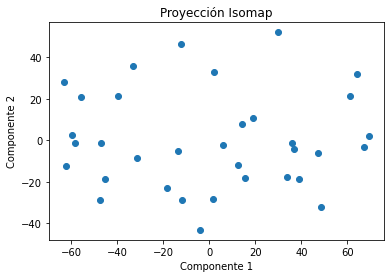

In [101]:
plt.scatter(data_projected[:, 0], data_projected[:, 1])
plt.title("Proyección Isomap")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

In [ ]:
data_projected

In [102]:
#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
principal_dflog2_Final_DFND_isomap = pd.DataFrame(data = data_projected
            , columns = ['Componente principal 1', 'Componente principal 2'])

In [103]:
principal_dflog2_Final_DFND_isomap

Componente principal 1  Componente principal 2
0                 6.032120               -2.080784
1                61.035873               21.153920
2               -31.259604               -8.494452
3               -18.550946              -22.836438
4                 1.505188              -28.376034
5               -62.094211              -12.366613
6               -45.381622              -18.700516
7               -11.844296              -28.684081
8               -33.032341               35.932201
9               -58.342958               -1.115604
10              -46.837714               -1.471404
11              -59.759787                2.710401
12               69.243997                2.093948
13               12.522738              -11.656294
14               18.797264               10.783031
15               15.677292              -18.246825
16               64.049057               31.896582
17              -47.423534              -28.732076
18               29.666127               52.020077
19              -39.760226               21.531841
20              -55.794535               20.976133
21              -13.578702               -4.965029
22               36.877771               -4.245379
23               67.065358               -3.279431
24               33.632996              -17.812629
25               36.081655               -1.277536
26               48.508558              -31.905250
27              -12.450812               46.514123
28               39.010505              -18.449723
29               14.100061                7.978673
30                1.891762               32.735770
31               47.358201               -6.325158
32               -4.015422              -43.141280
33              -62.929814               27.835838

In [104]:
print('Variación explicada por componente principal usando isomap: {}'.format(isomap.explained_variance_ratio_))

AttributeError: 'Isomap' object has no attribute 'explained_variance_ratio_'

In [105]:
#segunda prueba
# Calcula el rango de la matriz
rango = np.linalg.matrix_rank(principal_dflog2_Final_DFND_isomap)

# Comprueba si las columnas son linealmente independientes
if rango == min(principal_dflog2_Final_DFND_isomap.shape):
    print("Las columnas son linealmente independientes.")
else:
    print("Las columnas son linealmente dependientes.")
# Luego, comparamos el rango con el número mínimo de filas y columnas en la matriz para determinar si las columnas son linealmente independientes. 
#Si el rango es igual al número mínimo de filas y columnas, entonces las columnas son linealmente independientes.

Las columnas son linealmente independientes.


In [ ]:
targets = ['no events', 'CRLF2--P2RY8','CRLF2_dup','CRLF2--P2RY8/+dup','CRLF2_dup/+mut','CRLF2--P2RY8/+mut',
           'other fusions','USP9X--DDX3X','CRLF2_mut','CRLF2--IGH/+mut']
colors = ['r', 'g', 'purple', 'c', 'm', 'y', 'k', 'coral', 'darkolivegreen', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = nuevo_dflog2_Final['tipo'] == target
    plt.scatter(principal_dflog2_Final_DFND.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DFND.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

<Figure size 432x288 with 0 Axes>

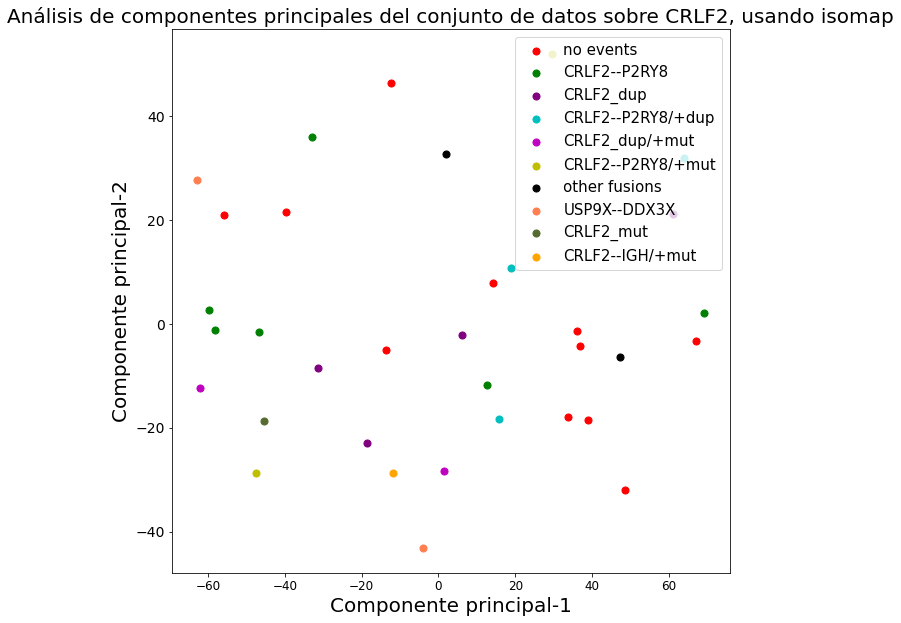

In [106]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal-1',fontsize=20)
plt.ylabel('Componente principal-2',fontsize=20)
plt.title("Análisis de componentes principales del conjunto de datos sobre CRLF2, usando isomap",fontsize=20)
targets = ['no events', 'CRLF2--P2RY8','CRLF2_dup','CRLF2--P2RY8/+dup','CRLF2_dup/+mut','CRLF2--P2RY8/+mut',
           'other fusions','USP9X--DDX3X','CRLF2_mut','CRLF2--IGH/+mut']
colors = ['r', 'g', 'purple', 'c', 'm', 'y', 'k', 'coral', 'darkolivegreen', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = nuevo_dflog2_Final['tipo'] == target
    plt.scatter(principal_dflog2_Final_DFND_isomap.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DFND_isomap.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

<Figure size 432x288 with 0 Axes>

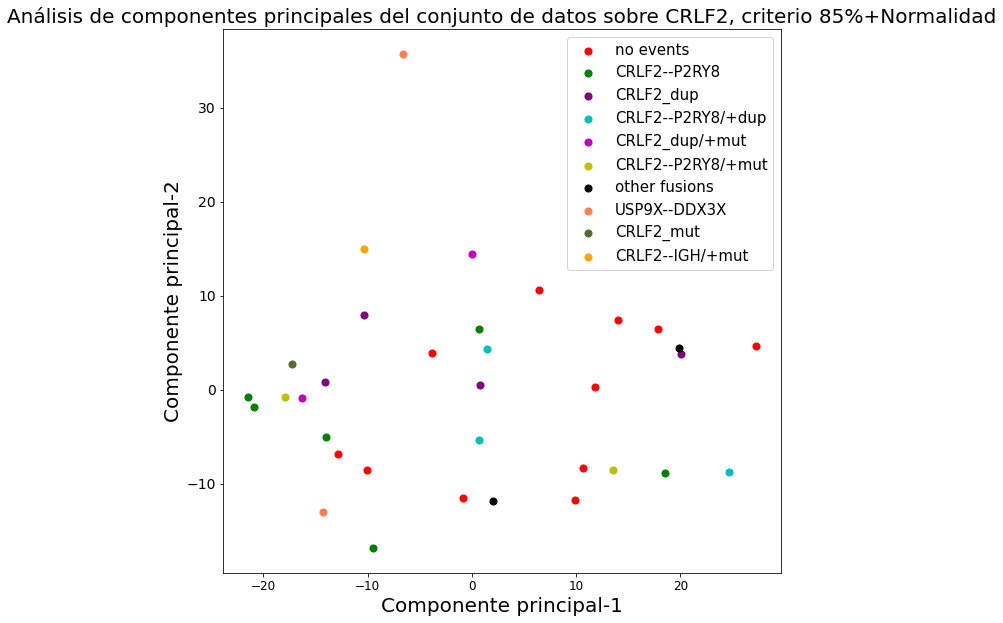

In [113]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal-1',fontsize=20)
plt.ylabel('Componente principal-2',fontsize=20)
plt.title("Análisis de componentes principales del conjunto de datos sobre CRLF2, criterio 85%+Normalidad",fontsize=20)
targets = ['no events', 'CRLF2--P2RY8','CRLF2_dup','CRLF2--P2RY8/+dup','CRLF2_dup/+mut','CRLF2--P2RY8/+mut',
           'other fusions','USP9X--DDX3X','CRLF2_mut','CRLF2--IGH/+mut']
colors = ['r', 'g', 'purple', 'c', 'm', 'y', 'k', 'coral', 'darkolivegreen', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = nuevo_dflog2_Final['tipo'] == target
    plt.scatter(principal_dflog2_Final_DFND.loc[indicesToKeep, 'Componente principal 1']
               , principal_dflog2_Final_DFND.loc[indicesToKeep, 'Componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [132]:
# Obtener la cantidad de datos resultantes
num_muestras, num_componentes = data_projected.shape

print(f"Número de Muestras: {num_muestras}")
print(f"Número de Componentes Principales: {num_componentes}")

Número de Muestras: 34
Número de Componentes Principales: 2


In [118]:
varianza_explicada = np.var(data_projected, axis=1) / np.var(xND, axis=1)

print("Varianza explicada por Componente 1:", varianza_explicada[0])
print("Varianza explicada por Componente 2:", varianza_explicada[1])

Varianza explicada por Componente 1: 21.313372878593928
Varianza explicada por Componente 2: 449.25640227640645


In [134]:
num_muestras_originales = dfSW.shape[0]

num_muestras_proyectadas = data_projected.shape[0]

print(f"Número de Muestras Originales: {num_muestras_originales}")
print(f"Número de Muestras Proyectadas: {num_muestras_proyectadas}")

Número de Muestras Originales: 34
Número de Muestras Proyectadas: 34


Para obtener una idea de cuánta información se conserva al usar Isomap, puedes comparar la distancia geodésica en el espacio original con la distancia geodésica en el espacio de menor dimensión. Sin embargo, esta comparación no proporciona una medida de "varianza explicada" en el sentido de PCA.

La elección de n_neighbors debe basarse en la naturaleza de tus datos. En general, si los datos tienen una estructura no lineal intrincada, es posible que necesites un valor mayor de n_neighbors. Sin embargo, si la estructura es más simple, un valor menor podría ser suficiente

Validación cruzada:

Para encontrar el valor óptimo de n_neighbors, puedes utilizar técnicas de validación cruzada para evaluar cómo diferentes valores afectan el rendimiento de Isomap en tareas específicas, como clasificación o agrupamiento.